## Credit card spend

In [389]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling 

In [390]:
pwd

'C:\\Users\\DELL-IN\\Downloads\\Video\\AL\\Data Science Final Projects\\Start\\3. CREDIT CARD SPEND PREDICTION PROBLEM- BANKING-REGRESSION1'

In [391]:
cd "C:/Users/DELL-IN/Downloads/Video/AL/Data Science Final Projects/Start/3. CREDIT CARD SPEND PREDICTION PROBLEM- BANKING-REGRESSION1/"

C:\Users\DELL-IN\Downloads\Video\AL\Data Science Final Projects\Start\3. CREDIT CARD SPEND PREDICTION PROBLEM- BANKING-REGRESSION1


In [392]:
credit=pd.read_csv('CREDIT CARD USERS DATA.csv')

C:\Users\DELL-IN\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (2,19,21,49,87,88,102) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [393]:
credit.head()

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1.0,2.00,1.0,20.0,2.0,September,15.0,3.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0648-AIPJSP-UVM,5.0,5.00,0.0,22.0,2.0,May,17.0,4.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2,5195-TLUDJE-HVO,3.0,4.00,1.0,67.0,6.0,June,14.0,2.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4459-VLPQUH-3OL,4.0,3.00,0.0,23.0,2.0,May,16.0,3.0,2.0,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
4,8158-SMTQFB-CNO,2.0,2.00,0.0,26.0,3.0,July,16.0,3.0,2.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [394]:
credit.columns

Index(['custid', 'region', 'townsize', 'gender', 'age', 'agecat', 'birthmonth',
       'ed', 'edcat', 'jobcat',
       ...
       'owncd', 'ownpda', 'ownpc', 'ownipod', 'owngame', 'ownfax', 'news',
       'response_01', 'response_02', 'response_03'],
      dtype='object', length=132)

In [395]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 132 entries, custid to response_03
dtypes: float64(115), object(17)
memory usage: 5.0+ MB


In [396]:
credit=credit.drop(['custid','age','birthmonth','ed','employ','income','lninc','lncreddebt','lnothdebt','spoused',
                   'pets_cats','pets_dogs','pets_birds','pets_reptiles','pets_small','pets_saltfish','pets_freshfish','address',
                'carvalue','commute','commutetime','commutecar','commutemotorcycle','commutecarpool','commutebus','commuterail',
                'commutepublic','commutebike','commutewalk','commutenonmotor','telecommute','polview','vote','cardtenure',
                 'card2tenure','bfast','lnlongmon','lnlongten','lntollmon','lntollten','lnequipmon','lnequipten',
                'lncardmon','lncardten','lnwiremon','lnwireten','hourstv','longten','cardten'],axis=1)

## for variable removing

In [397]:

#custid: customerid, birthmonth: month of birth,employ: Years with current employer, (pets_cats,pets_dogs,pets_birds,pets_reptiles
#pets_small,pets_saltfish,pets_freshfish): not required in spend calculation, (commutetime,commutecar,commutemotorcycle,commutecarpool
#commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute):not required in spend calculation,
#polview,vote,bfast,hourstv-not required in spend calculation


# age,ed,income,lninc,lncreddebt,lnothdebt,spoused,address,carvalue,commute,cardtenure,card2tenure,lnlongmon,lnlongten,lntollmon,
#lntollten,lnequipmon,lnequipten,lncardmon,lncardten,lnwiremon,lnwireten : continous variables should be removed, their categorical varibles are given


In [398]:
#credit=credit.replace("#NULL!",'',regex=True)

In [399]:
credit.head()

,region,townsize,gender,agecat,edcat,jobcat,union,empcat,retire,inccat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,1.0,2.00,1.0,2.0,3.0,1.0,1.0,1.0,0.0,2.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,5.0,5.00,0.0,2.0,4.0,2.0,0.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2,3.0,4.00,1.0,6.0,2.0,2.0,0.0,5.0,0.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4.0,3.00,0.0,2.0,3.0,2.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
4,2.0,2.00,0.0,3.0,3.0,2.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [400]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 83 columns):
region            5000 non-null float64
townsize          5000 non-null object
gender            5000 non-null float64
agecat            5000 non-null float64
edcat             5000 non-null float64
jobcat            5000 non-null float64
union             5000 non-null float64
empcat            5000 non-null float64
retire            5000 non-null float64
inccat            5000 non-null float64
debtinc           5000 non-null float64
creddebt          5000 non-null float64
othdebt           5000 non-null float64
default           5000 non-null float64
jobsat            5000 non-null float64
marital           5000 non-null float64
spousedcat        5000 non-null float64
reside            5000 non-null float64
pets              5000 non-null float64
homeown           5000 non-null float64
hometype          5000 non-null float64
addresscat        5000 non-null float64
cars          

In [401]:
credit.to_csv('credit.csv')

numerical and categorical 

In [402]:
num_var=['debtinc','creddebt','othdebt','pets','carditems','cardspent','card2items','card2spent','tenure','longmon','tollmon','tollten',
         'equipmon','equipten','cardmon','wiremon','wireten']

In [403]:
credit_num=credit[num_var]

In [404]:
credit_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
debtinc       5000 non-null float64
creddebt      5000 non-null float64
othdebt       5000 non-null float64
pets          5000 non-null float64
carditems     5000 non-null float64
cardspent     5000 non-null float64
card2items    5000 non-null float64
card2spent    5000 non-null float64
tenure        5000 non-null float64
longmon       5000 non-null float64
tollmon       5000 non-null float64
tollten       5000 non-null float64
equipmon      5000 non-null float64
equipten      5000 non-null float64
cardmon       5000 non-null float64
wiremon       5000 non-null float64
wireten       5000 non-null float64
dtypes: float64(17)
memory usage: 664.1 KB


In [405]:
credit_num.isnull().any()

debtinc       False
creddebt      False
othdebt       False
pets          False
carditems     False
cardspent     False
card2items    False
card2spent    False
tenure        False
longmon       False
tollmon       False
tollten       False
equipmon      False
equipten      False
cardmon       False
wiremon       False
wireten       False
dtype: bool

In [406]:
#credit_num=credit_num.replace("#NULL!",'',regex=True)

In [407]:
credit_num.head()

,debtinc,creddebt,othdebt,pets,carditems,cardspent,card2items,card2spent,tenure,longmon,tollmon,tollten,equipmon,equipten,cardmon,wiremon,wireten
0,11.1,1.20,2.24,0.0,5.0,81.66,4.0,67.80,5.0,6.50,29.0,161.05,29.50,126.1,14.25,0.00,0.00
1,18.6,1.22,1.57,6.0,5.0,42.60,2.0,34.94,39.0,8.90,0.0,0.00,54.85,1975.0,16.00,45.65,1683.55
2,9.9,0.93,2.54,3.0,9.0,184.22,7.0,175.75,65.0,28.40,0.0,0.00,0.00,0.0,23.00,0.00,0.00
3,5.7,0.02,1.12,0.0,17.0,340.99,1.0,18.42,36.0,6.00,0.0,0.00,0.00,0.0,21.00,0.00,0.00
4,1.7,0.21,0.18,0.0,8.0,255.10,7.0,252.73,21.0,3.05,16.5,387.70,0.00,0.0,17.25,19.05,410.80


In [408]:
cat_var=credit.columns.difference(num_var)

In [409]:
credit_cat=credit[cat_var]

In [410]:
#credit_cat=credit_cat.replace("#NULL!",'',regex=True)

In [411]:
credit_cat.head()

,active,addresscat,agecat,callcard,callid,callwait,carbought,carbuy,carcatvalue,card,...,response_01,response_02,response_03,retire,spousedcat,tollfree,townsize,union,voice,wireless
0,0.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,3.0,...,0.0,1.0,0.0,0.0,-1.0,1.0,2.00,1.0,1.0,0.0
1,1.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,1.0,2.0,...,0.0,0.0,0.0,0.0,-1.0,0.0,5.00,0.0,1.0,1.0
2,0.0,5.0,6.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0,...,0.0,0.0,0.0,0.0,2.0,0.0,4.00,0.0,0.0,0.0
3,1.0,2.0,2.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0,...,1.0,0.0,0.0,0.0,4.0,0.0,3.00,0.0,0.0,0.0
4,1.0,2.0,3.0,1.0,1.0,1.0,0.0,1.0,1.0,4.0,...,0.0,1.0,0.0,0.0,2.0,1.0,2.00,0.0,1.0,1.0


In [412]:
credit_cat.isnull().any()

active            False
addresscat        False
agecat            False
callcard          False
callid            False
callwait          False
carbought         False
carbuy            False
carcatvalue       False
card              False
card2             False
card2benefit      False
card2fee          False
card2tenurecat    False
card2type         False
cardbenefit       False
cardfee           False
cardtenurecat     False
cardtype          False
carown            False
cars              False
cartype           False
churn             False
commutecat        False
confer            False
default           False
ebill             False
edcat             False
empcat            False
equip             False
                  ...  
jobcat            False
jobsat            False
marital           False
multline          False
news              False
owncd             False
owndvd            False
ownfax            False
owngame           False
ownipod           False
ownpc           

In [413]:
credit_cat.townsize.value_counts()

1.00      1181
2.00       841
3.00       734
4.00       712
5.00       626
1.0        255
2.0        207
3.0        173
4.0        145
5.0        124
#NULL!       2
Name: townsize, dtype: int64

In [414]:
credit_cat['townsize']=credit_cat['townsize'].replace(to_replace='#NULL!', value=np.NaN)
credit_cat['townsize']=credit_cat['townsize'].astype('float')
credit_cat['townsize']=credit_cat['townsize'].fillna(credit_cat['townsize'].mode()[0])

C:\Users\DELL-IN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\DELL-IN\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\DELL-IN\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://p

In [415]:
credit_cat.townsize.value_counts()

1.0    1438
2.0    1048
3.0     907
4.0     857
5.0     750
Name: townsize, dtype: int64

In [416]:
# Mapping cars and commutetime variable to make them categorical

credit_cat['cars'] = pd.cut(credit_cat['cars'], bins=[-1, 2, 5, 8], labels=['0-2', '3-5', '6-8'])
credit_cat['reside'] = pd.cut(credit_cat['reside'], bins=[0, 3, 6, 10], labels=['1-3', '4-6', '7-9'])

C:\Users\DELL-IN\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\DELL-IN\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [417]:
for i in cat_var:
    credit_cat[i]=credit_cat[i].astype('object')

C:\Users\DELL-IN\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [418]:
credit_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 66 columns):
active            5000 non-null object
addresscat        5000 non-null object
agecat            5000 non-null object
callcard          5000 non-null object
callid            5000 non-null object
callwait          5000 non-null object
carbought         5000 non-null object
carbuy            5000 non-null object
carcatvalue       5000 non-null object
card              5000 non-null object
card2             5000 non-null object
card2benefit      5000 non-null object
card2fee          5000 non-null object
card2tenurecat    5000 non-null object
card2type         5000 non-null object
cardbenefit       5000 non-null object
cardfee           5000 non-null object
cardtenurecat     5000 non-null object
cardtype          5000 non-null object
carown            5000 non-null object
cars              5000 non-null object
cartype           5000 non-null object
churn             5000 non-null obj

In [419]:
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])


In [420]:
num_summary=credit_num.apply(lambda x: var_summary(x)).T

In [421]:
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
debtinc,5000.0,0.0,49770.80,9.954160,8.80,6.399783,4.095723e+01,0.0,0.7000,1.9000,2.800,5.1000,8.80,13.6000,18.600,22.2000,29.2000,43.10
creddebt,5000.0,0.0,9286.82,1.857364,0.93,3.415789,1.166762e+01,0.0,0.0300,0.1000,0.180,0.3900,0.93,2.0600,4.300,6.3715,14.2804,109.07
othdebt,5000.0,0.0,18272.28,3.654456,2.10,5.395214,2.910833e+01,0.0,0.1100,0.2900,0.460,0.9800,2.10,4.3100,8.060,11.8120,24.0618,141.46
pets,5000.0,0.0,15337.00,3.067400,2.00,3.414497,1.165879e+01,0.0,0.0000,0.0000,0.000,0.0000,2.00,5.0000,8.000,10.0000,13.0000,21.00
carditems,5000.0,0.0,50887.00,10.177400,10.00,3.391140,1.149983e+01,0.0,2.0000,5.0000,6.000,8.0000,10.00,12.0000,15.000,16.0000,19.0000,23.00
cardspent,5000.0,0.0,1686012.60,337.202520,276.36,245.145068,6.009610e+04,0.0,40.8195,91.3045,122.534,183.3775,276.36,418.5375,610.062,782.3155,1215.8072,3926.41
card2items,5000.0,0.0,23333.00,4.666600,5.00,2.497017,6.235091e+00,0.0,0.0000,1.0000,1.000,3.0000,5.00,6.0000,8.000,9.0000,11.0000,15.00
card2spent,5000.0,0.0,804380.55,160.876110,125.34,146.292771,2.140157e+04,0.0,0.0000,14.8195,28.639,66.9675,125.34,208.3100,324.718,419.4470,712.1298,2069.25
tenure,5000.0,0.0,191024.00,38.204800,38.00,22.661888,5.135612e+02,0.0,1.0000,4.0000,7.000,18.0000,38.00,59.0000,69.000,72.0000,72.0000,72.00
longmon,5000.0,0.0,67357.25,13.471450,9.55,12.773381,1.631593e+02,0.9,1.8500,2.9000,3.700,5.7000,9.55,16.5500,27.000,36.7575,65.2010,179.85


In [422]:
#Handling Outliers - Method2
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.95))
    x = x.clip_lower(x.quantile(0.05))
    return x

credit_num=credit_num.apply(lambda x: outlier_capping(x))

In [423]:
num_summary=credit_num.apply(lambda x: var_summary(x)).T
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
debtinc,5000.0,0.0,48824.800,9.764960,8.80,5.738747,32.933223,1.9000,1.9000,1.900000,2.800,5.1000,8.80,13.6000,18.600,22.200000,22.2000,22.2000
creddebt,5000.0,0.0,7879.285,1.575857,0.93,1.688157,2.849874,0.1000,0.1000,0.100000,0.180,0.3900,0.93,2.0600,4.300,6.370075,6.3715,6.3715
othdebt,5000.0,0.0,16077.270,3.215454,2.10,3.103508,9.631764,0.2900,0.2900,0.290000,0.460,0.9800,2.10,4.3100,8.060,11.810100,11.8120,11.8120
pets,5000.0,0.0,14888.000,2.977600,2.00,3.172178,10.062711,0.0000,0.0000,0.000000,0.000,0.0000,2.00,5.0000,8.000,10.000000,10.0000,10.0000
carditems,5000.0,0.0,50847.000,10.169400,10.00,3.061597,9.373378,5.0000,5.0000,5.000000,6.000,8.0000,10.00,12.0000,15.000,16.000000,16.0000,16.0000
cardspent,5000.0,0.0,1619411.090,323.882218,276.36,186.067101,34620.965999,91.3045,91.3045,91.309725,122.534,183.3775,276.36,418.5375,610.062,782.291275,782.3155,782.3155
card2items,5000.0,0.0,23221.000,4.644200,5.00,2.300318,5.291465,1.0000,1.0000,1.000000,1.000,3.0000,5.00,6.0000,8.000,9.000000,9.0000,9.0000
card2spent,5000.0,0.0,760281.805,152.056361,125.34,110.771827,12270.397572,14.8195,14.8195,14.819975,28.639,66.9675,125.34,208.3100,324.718,419.440350,419.4470,419.4470
tenure,5000.0,0.0,191489.000,38.297800,38.00,22.515997,506.970109,4.0000,4.0000,4.000000,7.000,18.0000,38.00,59.0000,69.000,72.000000,72.0000,72.0000
longmon,5000.0,0.0,63036.625,12.607325,9.55,9.222441,85.053425,2.9000,2.9000,2.900000,3.700,5.7000,9.55,16.5500,27.000,36.750375,36.7575,36.7575


In [424]:
def cat_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.value_counts()], 
                  index=['N', 'NMISS', 'ColumnsNames'])

cat_summary=credit_cat.apply(lambda x: cat_summary(x))

In [425]:
cat_summary.T

,N,NMISS,ColumnsNames
active,5000,0,"0.0 2670 1.0 2330 Name: active, dtype: i..."
addresscat,5000,0,3.0 1221 5.0 1157 4.0 1139 2.0 87...
agecat,5000,0,4.0 1222 5.0 1195 6.0 1068 3.0 89...
callcard,5000,0,"1.0 3581 0.0 1419 Name: callcard, dtype:..."
callid,5000,0,"0.0 2624 1.0 2376 Name: callid, dtype: i..."
callwait,5000,0,"0.0 2605 1.0 2395 Name: callwait, dtype:..."
carbought,5000,0,0.0 2901 1.0 1602 -1.0 497 Name: c...
carbuy,5000,0,"0.0 3195 1.0 1805 Name: carbuy, dtype: i..."
carcatvalue,5000,0,1.0 2399 2.0 1267 3.0 837 -1.0 ...
card,5000,0,4.0 1344 2.0 1247 3.0 1200 1.0 98...


In [426]:
# Make a new var Total_cardspent which is sum of primary card spend and secondary card spend
credit_num['Total_cardspent'] = credit_num['cardspent'] + credit_num['card2spent']

# Make a new var Total_carditems which is sum of primary card spend items and secondary card spend items
credit_num['Total_carditems'] = credit_num['carditems'] + credit_num['card2items']

In [427]:
credit_num.drop(['carditems', 'cardspent', 'card2items', 'card2spent'], inplace=True, axis=1)

In [428]:
credit_num.drop('Total_carditems', inplace=True, axis=1)

In [429]:
credit_cat.gender = credit_cat.gender.map({0:'Male', 1:'Female'})

C:\Users\DELL-IN\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [430]:
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [431]:
#for c_feature in categorical_features

for c_feature in cat_var:
    credit_cat[c_feature] = credit_cat[c_feature].astype('category')
    credit_cat = create_dummies(credit_cat , c_feature )

C:\Users\DELL-IN\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [432]:
credit_cat

,active_1.0,addresscat_2.0,addresscat_3.0,addresscat_4.0,addresscat_5.0,agecat_3.0,agecat_4.0,agecat_5.0,agecat_6.0,callcard_1.0,...,spousedcat_4.0,spousedcat_5.0,tollfree_1.0,townsize_2.0,townsize_3.0,townsize_4.0,townsize_5.0,union_1.0,voice_1.0,wireless_1.0
0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0,1,1,0
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,1
2,0,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
4,1,1,0,0,0,1,0,0,0,1,...,0,0,1,1,0,0,0,0,1,1
5,0,0,0,0,1,0,0,1,0,1,...,0,0,1,0,0,1,0,0,0,0
6,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
7,0,0,0,1,0,0,1,0,0,1,...,0,0,1,0,0,1,0,0,0,0
8,1,0,0,1,0,0,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0
9,1,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


Concat both num and cat

In [433]:
credit_both = pd.concat([credit_num, credit_cat], axis=1)

In [434]:
credit_both.head()

,debtinc,creddebt,othdebt,pets,tenure,longmon,tollmon,tollten,equipmon,equipten,...,spousedcat_4.0,spousedcat_5.0,tollfree_1.0,townsize_2.0,townsize_3.0,townsize_4.0,townsize_5.0,union_1.0,voice_1.0,wireless_1.0
0,11.1,1.20,2.24,0.0,5.0,6.50,29.0,161.05,29.5000,126.1,...,0,0,1,1,0,0,0,1,1,0
1,18.6,1.22,1.57,6.0,39.0,8.90,0.0,0.00,49.0525,1975.0,...,0,0,0,0,0,0,1,0,1,1
2,9.9,0.93,2.54,3.0,65.0,28.40,0.0,0.00,0.0000,0.0,...,0,0,0,0,0,1,0,0,0,0
3,5.7,0.10,1.12,0.0,36.0,6.00,0.0,0.00,0.0000,0.0,...,1,0,0,0,1,0,0,0,0,0
4,1.9,0.21,0.29,0.0,21.0,3.05,16.5,387.70,0.0000,0.0,...,0,0,1,1,0,0,0,0,1,1


In [435]:
credit_both.to_csv('full.csv')

C:\Users\DELL-IN\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


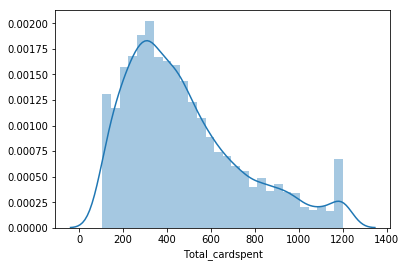

In [436]:
# exploring data
# Distribution of variables
import seaborn as sns
sns.distplot(credit_both.Total_cardspent)

In [437]:
credit_both["ln_Total_cardspent"]= np.log(credit_both["Total_cardspent"]+1)

C:\Users\DELL-IN\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


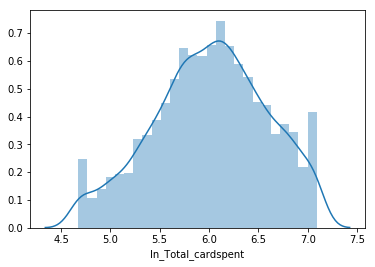

In [438]:
sns.distplot(credit_both.ln_Total_cardspent)

In [439]:
#Dropping the variables
credit_both=credit_both.drop(['Total_cardspent'],axis=1)

In [440]:
credit_both.corr()

,debtinc,creddebt,othdebt,pets,tenure,longmon,tollmon,tollten,equipmon,equipten,...,spousedcat_5.0,tollfree_1.0,townsize_2.0,townsize_3.0,townsize_4.0,townsize_5.0,union_1.0,voice_1.0,wireless_1.0,ln_Total_cardspent
debtinc,1.000000,0.504025,0.569820,-0.000696,0.019311,0.013825,-0.011847,0.002351,-0.002207,0.009810,...,0.003860,-0.020594,0.003110,-0.022795,-0.025588,0.011194,-0.002852,-0.000297,-0.001596,0.014549
creddebt,0.504025,1.000000,0.639778,-0.012198,0.155513,0.132401,0.113764,0.155096,0.062509,0.103446,...,0.052690,0.070267,0.015173,-0.014875,-0.017977,-0.022482,0.004941,0.077862,0.084061,0.246448
othdebt,0.569820,0.639778,1.000000,0.014685,0.181201,0.141812,0.150904,0.190203,0.072259,0.115700,...,0.055884,0.099745,0.007438,-0.011297,-0.014715,0.001524,-0.007503,0.087666,0.114941,0.276049
pets,-0.000696,-0.012198,0.014685,1.000000,0.036517,0.033777,0.004532,0.022215,0.026858,0.026595,...,0.000595,-0.014234,0.006270,-0.006984,-0.001808,0.001024,0.025158,0.011928,0.005135,-0.008517
tenure,0.019311,0.155513,0.181201,0.036517,1.000000,0.782961,0.175542,0.454566,-0.045805,0.268399,...,0.027925,0.012004,0.008881,-0.012612,-0.024473,-0.005706,0.003146,-0.041525,-0.050220,0.055590
longmon,0.013825,0.132401,0.141812,0.033777,0.782961,1.000000,0.147688,0.360703,-0.047083,0.179641,...,0.016893,0.001927,0.011437,-0.010225,-0.012498,-0.009587,0.017084,-0.050432,-0.043913,0.041575
tollmon,-0.011847,0.113764,0.150904,0.004532,0.175542,0.147688,1.000000,0.879351,0.099421,0.132924,...,0.034150,0.899393,0.017696,-0.002404,-0.001328,-0.016686,0.020943,0.390237,0.408302,0.070552
tollten,0.002351,0.155096,0.190203,0.022215,0.454566,0.360703,0.879351,1.000000,0.056741,0.193933,...,0.038434,0.694625,0.015523,-0.004048,-0.005370,-0.017611,0.014342,0.281612,0.284570,0.086204
equipmon,-0.002207,0.062509,0.072259,0.026858,-0.045805,-0.047083,0.099421,0.056741,1.000000,0.834499,...,0.111046,0.103066,0.023514,-0.007295,0.003401,-0.005496,0.015405,0.478172,0.511900,0.061967
equipten,0.009810,0.103446,0.115700,0.026595,0.268399,0.179641,0.132924,0.193933,0.834499,1.000000,...,0.107570,0.075466,0.013924,-0.007186,-0.007684,0.000781,0.009893,0.366557,0.392583,0.075542


In [441]:
#Splitting the data

feature_columns = credit_both.columns.difference( ['ln_Total_cardspent'] )
feature_columns

Index(['active_1.0', 'addresscat_2.0', 'addresscat_3.0', 'addresscat_4.0',
       'addresscat_5.0', 'agecat_3.0', 'agecat_4.0', 'agecat_5.0',
       'agecat_6.0', 'callcard_1.0',
       ...
       'tollten', 'townsize_2.0', 'townsize_3.0', 'townsize_4.0',
       'townsize_5.0', 'union_1.0', 'voice_1.0', 'wireless_1.0', 'wiremon',
       'wireten'],
      dtype='object', length=149)

In [442]:
from sklearn.cross_validation import train_test_split

train_X, test_X, train_y, test_y = train_test_split( credit_both[feature_columns],
                                                  credit_both['ln_Total_cardspent'],
                                                  test_size = 0.3,
                                                  random_state = 123 )

In [443]:
print(len( train_X ))
print(len( test_X))

3500
1500


In [444]:
import statsmodels.api as sm

In [445]:
train_X = sm.add_constant(train_X)
lm=sm.OLS(train_y,train_X).fit()

In [446]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     ln_Total_cardspent   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     12.86
Date:                Sat, 02 Feb 2019   Prob (F-statistic):          3.14e-226
Time:                        16:48:31   Log-Likelihood:                -2317.3
No. Observations:                3500   AIC:                             4927.
Df Residuals:                    3354   BIC:                             5826.
Df Model:                         145                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  6.4584      0.112     57.606      0.000       6.239       6.678
active_1.0             0.0064      0.017      0.379      0.705      -0.027       0.040
addresscat_2.0         0.0171      0.043      0.392      0.695      -0.068       0.102
addresscat_3.0         0.0206      0.050      0.412      0.680      -0.078       0.119
addresscat_4.0        -0.0093      0.055     -0.171      0.864      -0.116       0.098
addresscat_5.0         0.0193      0.058      0.331      0.741      -0.095       0.134
agecat_3.0             0.0475      0.048      0.994      0.320      -0.046       0.141
agecat_4.0             0.0375      0.058      0.644      0.520      -0.077       0.152
agecat_5.0             0.0313      0.065      0.484      0.628      -0.095       0.158
agecat_6.0             0.0229      0.070      0.325      0.745      -0.115       0.161
callcard_1.0           0.0052      0.030      0.174      0.862      -0.053       0.064
callid_1.0            -0.0101      0.025     -0.410      0.682      -0.058       0.038
callwait_1.0           0.0189      0.024      0.774      0.439      -0.029       0.067
carbought_0.0         -0.0038      0.012     -0.308      0.758      -0.028       0.020
carbought_1.0         -0.0017      0.013     -0.126      0.900      -0.028       0.025
carbuy_1.0             0.0243      0.018      1.360      0.174      -0.011       0.059
carcatvalue_1.0       -0.0212      0.021     -1.024      0.306      -0.062       0.019
carcatvalue_2.0       -0.0139      0.018     -0.785      0.433      -0.049       0.021
carcatvalue_3.0        0.0296      0.029      1.034      0.301      -0.027       0.086
card2_2.0             -0.3579      0.027    -13.242      0.000      -0.411      -0.305
card2_3.0             -0.3321      0.027    -12.375      0.000      -0.385      -0.279
card2_4.0             -0.3796      0.030    -12.865      0.000      -0.437      -0.322
card2_5.0             -0.2569      0.039     -6.627      0.000      -0.333      -0.181
card2benefit_2.0       0.0398      0.024      1.685      0.092      -0.007       0.086
card2benefit_3.0      -0.0297      0.023     -1.266      0.206      -0.076       0.016
card2benefit_4.0       0.0067      0.023      0.285      0.776      -0.039       0.053
card2fee_1.0          -0.0151      0.021     -0.715      0.475      -0.057       0.026
card2tenurecat_2.0    -0.0370      0.056     -0.658      0.511      -0.147       0.073
card2tenurecat_3.0     0.0286      0.068      0.419      0.675      -0.105       0.162
card2tenurecat_4.0    -0.0138      0.076     -0.180      0.857      -0.163       0.136
card2tenurecat_5.0    -0.0410      0.084     -0.489      0.625      -0.205       0.123
card2type_2.0         -0.0169      0.024     -0.703      0.482      -0.064       0.030
card2type_3.0         -0.0127      0.0

In [447]:
test_X = sm.add_constant(test_X)
y_pred = lm.predict(test_X)
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(test_y, y_pred))
print('MSE:', metrics.mean_squared_error(test_y, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

MAE: 0.3744087757453317
MSE: 0.21472194797457061
RMSE: 0.46338099656176085


In [448]:
# Check VIF

In [449]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [450]:
all_columns = "+".join(credit_num.columns.difference( ['Total_cardspent'] ))

my_formula = "ln_Total_cardspent~" + all_columns

print(my_formula)

ln_Total_cardspent~cardmon+creddebt+debtinc+equipmon+equipten+longmon+othdebt+pets+tenure+tollmon+tollten+wiremon+wireten


In [451]:
%%capture
#gather features
#features = "+".join(car_sales.columns - ["Sales_in_thousands"])

# get y and X dataframes based on this regression
y, X = dmatrices('ln_Total_cardspent~cardmon+creddebt+debtinc+equipmon+equipten+longmon+othdebt+pets+tenure+tollmon+tollten+wiremon+wireten', credit_both, return_type='dataframe')

In [452]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [453]:
vif[vif["VIF Factor"]>10]

,VIF Factor,features
0,12.487998,Intercept
12,10.191207,wiremon
13,10.056496,wireten


In [454]:
# Drop variables on basis of VIF

In [455]:
credit_both=credit_both.drop(['wiremon','wireten'],axis=1)

In [456]:
#Splitting the data

feature_columns = credit_both.columns.difference( ['ln_Total_cardspent'] )
feature_columns

Index(['active_1.0', 'addresscat_2.0', 'addresscat_3.0', 'addresscat_4.0',
       'addresscat_5.0', 'agecat_3.0', 'agecat_4.0', 'agecat_5.0',
       'agecat_6.0', 'callcard_1.0',
       ...
       'tollfree_1.0', 'tollmon', 'tollten', 'townsize_2.0', 'townsize_3.0',
       'townsize_4.0', 'townsize_5.0', 'union_1.0', 'voice_1.0',
       'wireless_1.0'],
      dtype='object', length=147)

In [457]:
from sklearn.cross_validation import train_test_split

train_X, test_X, train_y, test_y = train_test_split( credit_both[feature_columns],
                                                  credit_both['ln_Total_cardspent'],
                                                  test_size = 0.3,
                                                  random_state = 123 )

In [458]:
train_X = sm.add_constant(train_X)
lm=sm.OLS(train_y,train_X).fit()

In [459]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     ln_Total_cardspent   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     13.04
Date:                Sat, 02 Feb 2019   Prob (F-statistic):          3.45e-227
Time:                        16:48:33   Log-Likelihood:                -2317.7
No. Observations:                3500   AIC:                             4923.
Df Residuals:                    3356   BIC:                             5811.
Df Model:                         143                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  6.4573      0.112     57.683      0.000       6.238       6.677
active_1.0             0.0067      0.017      0.395      0.693      -0.027       0.040
addresscat_2.0         0.0179      0.043      0.411      0.681      -0.067       0.103
addresscat_3.0         0.0208      0.050      0.415      0.678      -0.077       0.119
addresscat_4.0        -0.0086      0.055     -0.158      0.874      -0.116       0.098
addresscat_5.0         0.0191      0.058      0.328      0.743      -0.095       0.133
agecat_3.0             0.0487      0.048      1.021      0.307      -0.045       0.142
agecat_4.0             0.0397      0.058      0.683      0.494      -0.074       0.154
agecat_5.0             0.0331      0.064      0.514      0.607      -0.093       0.160
agecat_6.0             0.0246      0.070      0.349      0.727      -0.113       0.163
callcard_1.0           0.0066      0.030      0.221      0.825      -0.052       0.065
callid_1.0            -0.0095      0.025     -0.386      0.700      -0.058       0.039
callwait_1.0           0.0185      0.024      0.758      0.448      -0.029       0.066
carbought_0.0         -0.0036      0.012     -0.293      0.770      -0.028       0.021
carbought_1.0         -0.0019      0.013     -0.142      0.887      -0.028       0.024
carbuy_1.0             0.0242      0.018      1.355      0.175      -0.011       0.059
carcatvalue_1.0       -0.0212      0.021     -1.024      0.306      -0.062       0.019
carcatvalue_2.0       -0.0140      0.018     -0.794      0.427      -0.049       0.021
carcatvalue_3.0        0.0297      0.029      1.038      0.299      -0.026       0.086
card2_2.0             -0.3586      0.027    -13.278      0.000      -0.412      -0.306
card2_3.0             -0.3325      0.027    -12.399      0.000      -0.385      -0.280
card2_4.0             -0.3797      0.029    -12.873      0.000      -0.438      -0.322
card2_5.0             -0.2574      0.039     -6.643      0.000      -0.333      -0.181
card2benefit_2.0       0.0402      0.024      1.705      0.088      -0.006       0.087
card2benefit_3.0      -0.0295      0.023     -1.259      0.208      -0.076       0.016
card2benefit_4.0       0.0070      0.023      0.299      0.765      -0.039       0.053
card2fee_1.0          -0.0149      0.021     -0.706      0.480      -0.056       0.027
card2tenurecat_2.0    -0.0372      0.056     -0.662      0.508      -0.147       0.073
card2tenurecat_3.0     0.0271      0.068      0.399      0.690      -0.106       0.161
card2tenurecat_4.0    -0.0147      0.076     -0.192      0.848      -0.164       0.135
card2tenurecat_5.0    -0.0424      0.084     -0.507      0.612      -0.207       0.122
card2type_2.0         -0.0164      0.024     -0.684      0.494      -0.064       0.031
card2type_3.0         -0.0126      0.0

In [460]:
train_X = sm.add_constant(train_X)
y_pred = lm.predict(train_X)
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(train_y, y_pred))
print('MSE:', metrics.mean_squared_error(train_y, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(train_y, y_pred)))

MAE: 0.3806262328464096
MSE: 0.22014721124704648
RMSE: 0.4691984774560191


In [461]:
test_X = sm.add_constant(test_X)
y_pred = lm.predict(test_X)
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(test_y, y_pred))
print('MSE:', metrics.mean_squared_error(test_y, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

MAE: 0.3741000551745371
MSE: 0.2146388537756475
RMSE: 0.46329132711032645


In [462]:
residuals = test_y - y_pred

C:\Users\DELL-IN\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\DELL-IN\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


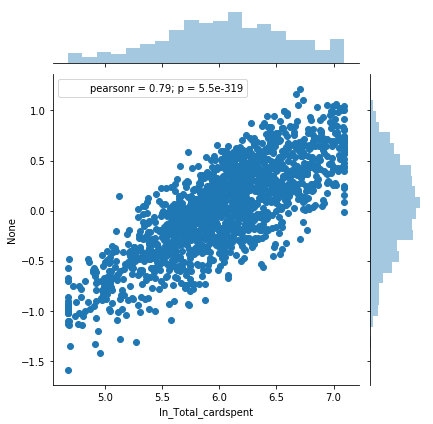

In [463]:
sns.jointplot(  test_y, residuals )

C:\Users\DELL-IN\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


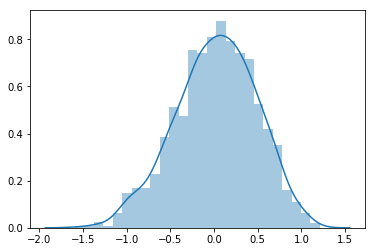

In [464]:
sns.distplot( residuals )

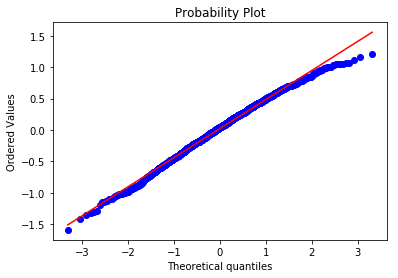

In [465]:
# To ensure residues are random i.e. normally distributed a Q-Q plot can be used
# Q-Q plot shows if the residuals are plotted along the line.
from scipy import stats
import pylab

stats.probplot( residuals, dist="norm", plot=pylab )
pylab.show()

In [466]:
# Feature Selection based on importance
from sklearn.feature_selection import f_regression

In [468]:
from sklearn.feature_selection import SelectKBest, f_classif
#Suppose, we select 5 features with top 5 Fisher scores
selector = SelectKBest(f_classif, k=30)
#New dataframe with the selected features for later use in the classifier. fit() method works too, if you want only the feature names and their corresponding scores
X_new = selector.fit_transform(train_X, train_y)
names = train_X.columns.values[selector.get_support()]
scores = selector.scores_[selector.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])
#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)

            Feat_names  F_Scores
20          reason_3.0  2.356025
27        townsize_3.0  1.596096
1      carcatvalue_1.0  1.565872
11      commutecat_5.0  1.564135
23     response_03_1.0  1.443971
10      commutecat_2.0  1.406410
2            card2_5.0  1.398107
6    cardtenurecat_2.0  1.352381
0           agecat_4.0  1.345035
9            churn_1.0  1.304648
17          ownfax_1.0  1.292194
21          region_2.0  1.288036
5             card_4.0  1.284432
14          inccat_2.0  1.273037
3   card2tenurecat_2.0  1.243451
24          retire_1.0  1.218601
8         cardtype_4.0  1.207270
18          ownpda_1.0  1.206581
19          reason_2.0  1.198971
29        wireless_1.0  1.198004
15        internet_4.0  1.189185
22     response_02_1.0  1.184010
4             card_3.0  1.179092
16          jobcat_2.0  1.167473
28           voice_1.0  1.165411
12           edcat_5.0  1.158342
13        hometype_4.0  1.155977
25      spousedcat_1.0  1.150455
26        townsize_2.0  1.143899
7    cardt

C:\Users\DELL-IN\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [0] are constant.
  UserWarning)
C:\Users\DELL-IN\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [469]:
num=[]

In [470]:
cat=['reason','townsize','carcatvalue','commutecat','response_03','card2','cardtenurecat','agecat','churn','ownfax','region',
    'card','inccat','card2tenurecat','retire','cardtype','ownpda','wireless','internet','response_02','jobcat','voice',
    'edcat','hometype','spousedcat']

In [472]:
credit_num1 = credit_both[num]
credit_cat1 = credit[cat]

In [474]:
credit_num1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Empty DataFrame

In [475]:
credit_cat1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
reason            5000 non-null float64
townsize          5000 non-null object
carcatvalue       5000 non-null float64
commutecat        5000 non-null float64
response_03       5000 non-null float64
card2             5000 non-null float64
cardtenurecat     5000 non-null float64
agecat            5000 non-null float64
churn             5000 non-null float64
ownfax            5000 non-null float64
region            5000 non-null float64
card              5000 non-null float64
inccat            5000 non-null float64
card2tenurecat    5000 non-null float64
retire            5000 non-null float64
cardtype          5000 non-null float64
ownpda            5000 non-null float64
wireless          5000 non-null float64
internet          5000 non-null float64
response_02       5000 non-null float64
jobcat            5000 non-null float64
voice             5000 non-null float64
edcat         

In [476]:
credit_cat1.townsize.value_counts()

1.00      1181
2.00       841
3.00       734
4.00       712
5.00       626
1.0        255
2.0        207
3.0        173
4.0        145
5.0        124
#NULL!       2
Name: townsize, dtype: int64

In [477]:
credit_cat1['townsize']=credit_cat1['townsize'].replace(to_replace='#NULL!', value=np.NaN)
credit_cat1['townsize']=credit_cat1['townsize'].astype('float')
credit_cat1['townsize']=credit_cat1['townsize'].fillna(credit_cat1['townsize'].mode()[0])

C:\Users\DELL-IN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\DELL-IN\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\DELL-IN\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://p

In [478]:
credit_cat1.townsize.value_counts()

1.0    1438
2.0    1048
3.0     907
4.0     857
5.0     750
Name: townsize, dtype: int64

In [480]:
credit_num1['ln_Total_cardspent'] = credit_both["ln_Total_cardspent"]


#credit_num1['Total_carditems'] = credit_num['Total_carditems']

C:\Users\DELL-IN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [481]:
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [482]:
#for c_feature in categorical_features

for c_feat in cat:
    credit_cat1[c_feat] = credit_cat1[c_feat].astype('category')
    credit_cat1 = create_dummies(credit_cat1 , c_feat )

C:\Users\DELL-IN\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [485]:
credit_final=pd.concat([credit_num1,credit_cat1],axis=1)

In [486]:
credit_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 76 columns):
ln_Total_cardspent    5000 non-null float64
reason_2.0            5000 non-null uint8
reason_3.0            5000 non-null uint8
reason_4.0            5000 non-null uint8
reason_9.0            5000 non-null uint8
townsize_2.0          5000 non-null uint8
townsize_3.0          5000 non-null uint8
townsize_4.0          5000 non-null uint8
townsize_5.0          5000 non-null uint8
carcatvalue_1.0       5000 non-null uint8
carcatvalue_2.0       5000 non-null uint8
carcatvalue_3.0       5000 non-null uint8
commutecat_2.0        5000 non-null uint8
commutecat_3.0        5000 non-null uint8
commutecat_4.0        5000 non-null uint8
commutecat_5.0        5000 non-null uint8
response_03_1.0       5000 non-null uint8
card2_2.0             5000 non-null uint8
card2_3.0             5000 non-null uint8
card2_4.0             5000 non-null uint8
card2_5.0             5000 non-null uint8
cardtenur

In [487]:
#Splitting the data

feature_columns1 = credit_final.columns.difference( ['ln_Total_cardspent'] )
feature_columns1

Index(['agecat_3.0', 'agecat_4.0', 'agecat_5.0', 'agecat_6.0',
       'carcatvalue_1.0', 'carcatvalue_2.0', 'carcatvalue_3.0', 'card2_2.0',
       'card2_3.0', 'card2_4.0', 'card2_5.0', 'card2tenurecat_2.0',
       'card2tenurecat_3.0', 'card2tenurecat_4.0', 'card2tenurecat_5.0',
       'card_2.0', 'card_3.0', 'card_4.0', 'card_5.0', 'cardtenurecat_2.0',
       'cardtenurecat_3.0', 'cardtenurecat_4.0', 'cardtenurecat_5.0',
       'cardtype_2.0', 'cardtype_3.0', 'cardtype_4.0', 'churn_1.0',
       'commutecat_2.0', 'commutecat_3.0', 'commutecat_4.0', 'commutecat_5.0',
       'edcat_2.0', 'edcat_3.0', 'edcat_4.0', 'edcat_5.0', 'hometype_2.0',
       'hometype_3.0', 'hometype_4.0', 'inccat_2.0', 'inccat_3.0',
       'inccat_4.0', 'inccat_5.0', 'internet_1.0', 'internet_2.0',
       'internet_3.0', 'internet_4.0', 'jobcat_2.0', 'jobcat_3.0',
       'jobcat_4.0', 'jobcat_5.0', 'jobcat_6.0', 'ownfax_1.0', 'ownpda_1.0',
       'reason_2.0', 'reason_3.0', 'reason_4.0', 'reason_9.0', 'region_2.

In [488]:
train_X1, test_X1, train_y1, test_y1 = train_test_split( credit_final[feature_columns1],
                                                  credit_final['ln_Total_cardspent'],
                                                  test_size = 0.3,
                                                  random_state = 123 )

In [489]:
train_X1 = sm.add_constant(train_X1)
lm1=sm.OLS(train_y1,train_X1).fit()

In [490]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     ln_Total_cardspent   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     23.43
Date:                Sat, 02 Feb 2019   Prob (F-statistic):          5.74e-250
Time:                        16:50:47   Log-Likelihood:                -2366.0
No. Observations:                3500   AIC:                             4884.
Df Residuals:                    3424   BIC:                             5352.
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  6.4894      0.074     87.264      0.000       6.344       6.635
agecat_3.0             0.0420      0.036      1.154      0.249      -0.029       0.113
agecat_4.0             0.0263      0.039      0.683      0.495      -0.049       0.102
agecat_5.0             0.0320      0.042      0.762      0.446      -0.050       0.115
agecat_6.0             0.0358      0.048      0.751      0.452      -0.058       0.129
carcatvalue_1.0       -0.0312      0.032     -0.972      0.331      -0.094       0.032
carcatvalue_2.0       -0.0075      0.034     -0.220      0.826      -0.074       0.059
carcatvalue_3.0        0.0484      0.045      1.072      0.284      -0.040       0.137
card2_2.0             -0.3606      0.027    -13.451      0.000      -0.413      -0.308
card2_3.0             -0.3365      0.027    -12.660      0.000      -0.389      -0.284
card2_4.0             -0.3910      0.029    -13.373      0.000      -0.448      -0.334
card2_5.0             -0.2720      0.038     -7.091      0.000      -0.347      -0.197
card2tenurecat_2.0    -0.0065      0.055     -0.116      0.907      -0.115       0.102
card2tenurecat_3.0     0.0756      0.066      1.148      0.251      -0.054       0.205
card2tenurecat_4.0     0.0496      0.073      0.684      0.494      -0.093       0.192
card2tenurecat_5.0     0.0605      0.075      0.802      0.422      -0.087       0.208
card_2.0              -0.5213      0.027    -19.397      0.000      -0.574      -0.469
card_3.0              -0.5409      0.027    -20.031      0.000      -0.594      -0.488
card_4.0              -0.6257      0.028    -22.682      0.000      -0.680      -0.572
card_5.0              -0.4610      0.045    -10.257      0.000      -0.549      -0.373
cardtenurecat_2.0      0.0284      0.059      0.482      0.630      -0.087       0.144
cardtenurecat_3.0     -0.0915      0.070     -1.310      0.190      -0.228       0.045
cardtenurecat_4.0     -0.0924      0.077     -1.208      0.227      -0.243       0.058
cardtenurecat_5.0     -0.0695      0.081     -0.862      0.389      -0.228       0.089
cardtype_2.0           0.0104      0.023      0.446      0.656      -0.035       0.056
cardtype_3.0           0.0039      0.023      0.168      0.866      -0.042       0.050
cardtype_4.0           0.0078      0.023      0.335      0.738      -0.038       0.053
churn_1.0              0.0107      0.021      0.500      0.617      -0.031       0.053
commutecat_2.0         0.0566      0.037      1.541      0.123      -0.015       0.129
commutecat_3.0        -0.0091      0.022     -0.408      0.684      -0.053       0.035
commutecat_4.0         0.0043      0.026      0.165      0.869      -0.047       0.056
commutecat_5.0        -0.0602      0.050     -1.211      0.226      -0.158       0.037
edcat_2.0             -0.0284      0.0

In [491]:
#Splitting the data

feature_columns2 = credit_final.columns.difference( ['ln_Total_cardspent','ownpda_1.0'] )
feature_columns2

Index(['agecat_3.0', 'agecat_4.0', 'agecat_5.0', 'agecat_6.0',
       'carcatvalue_1.0', 'carcatvalue_2.0', 'carcatvalue_3.0', 'card2_2.0',
       'card2_3.0', 'card2_4.0', 'card2_5.0', 'card2tenurecat_2.0',
       'card2tenurecat_3.0', 'card2tenurecat_4.0', 'card2tenurecat_5.0',
       'card_2.0', 'card_3.0', 'card_4.0', 'card_5.0', 'cardtenurecat_2.0',
       'cardtenurecat_3.0', 'cardtenurecat_4.0', 'cardtenurecat_5.0',
       'cardtype_2.0', 'cardtype_3.0', 'cardtype_4.0', 'churn_1.0',
       'commutecat_2.0', 'commutecat_3.0', 'commutecat_4.0', 'commutecat_5.0',
       'edcat_2.0', 'edcat_3.0', 'edcat_4.0', 'edcat_5.0', 'hometype_2.0',
       'hometype_3.0', 'hometype_4.0', 'inccat_2.0', 'inccat_3.0',
       'inccat_4.0', 'inccat_5.0', 'internet_1.0', 'internet_2.0',
       'internet_3.0', 'internet_4.0', 'jobcat_2.0', 'jobcat_3.0',
       'jobcat_4.0', 'jobcat_5.0', 'jobcat_6.0', 'ownfax_1.0', 'reason_2.0',
       'reason_3.0', 'reason_4.0', 'reason_9.0', 'region_2.0', 'region_3.

In [492]:
train_X2, test_X2, train_y2, test_y2 = train_test_split( credit_final[feature_columns2],
                                                  credit_final['ln_Total_cardspent'],
                                                  test_size = 0.3,
                                                  random_state = 123 )

In [493]:
train_X2 = sm.add_constant(train_X2)
lm2=sm.OLS(train_y2,train_X2).fit()

In [494]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     ln_Total_cardspent   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     23.75
Date:                Sat, 02 Feb 2019   Prob (F-statistic):          1.18e-250
Time:                        16:54:47   Log-Likelihood:                -2366.0
No. Observations:                3500   AIC:                             4882.
Df Residuals:                    3425   BIC:                             5344.
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  6.4895      0.074     87.285      0.000       6.344       6.635
agecat_3.0             0.0420      0.036      1.153      0.249      -0.029       0.113
agecat_4.0             0.0263      0.039      0.681      0.496      -0.049       0.102
agecat_5.0             0.0321      0.042      0.763      0.445      -0.050       0.115
agecat_6.0             0.0357      0.048      0.751      0.453      -0.058       0.129
carcatvalue_1.0       -0.0311      0.032     -0.970      0.332      -0.094       0.032
carcatvalue_2.0       -0.0075      0.034     -0.219      0.827      -0.074       0.059
carcatvalue_3.0        0.0484      0.045      1.074      0.283      -0.040       0.137
card2_2.0             -0.3607      0.027    -13.462      0.000      -0.413      -0.308
card2_3.0             -0.3366      0.027    -12.672      0.000      -0.389      -0.285
card2_4.0             -0.3911      0.029    -13.381      0.000      -0.448      -0.334
card2_5.0             -0.2719      0.038     -7.091      0.000      -0.347      -0.197
card2tenurecat_2.0    -0.0065      0.055     -0.116      0.907      -0.115       0.102
card2tenurecat_3.0     0.0755      0.066      1.146      0.252      -0.054       0.205
card2tenurecat_4.0     0.0494      0.072      0.681      0.496      -0.093       0.192
card2tenurecat_5.0     0.0604      0.075      0.801      0.423      -0.087       0.208
card_2.0              -0.5212      0.027    -19.400      0.000      -0.574      -0.469
card_3.0              -0.5410      0.027    -20.038      0.000      -0.594      -0.488
card_4.0              -0.6257      0.028    -22.685      0.000      -0.680      -0.572
card_5.0              -0.4609      0.045    -10.258      0.000      -0.549      -0.373
cardtenurecat_2.0      0.0282      0.059      0.479      0.632      -0.087       0.144
cardtenurecat_3.0     -0.0915      0.070     -1.310      0.190      -0.229       0.045
cardtenurecat_4.0     -0.0923      0.077     -1.207      0.228      -0.242       0.058
cardtenurecat_5.0     -0.0695      0.081     -0.862      0.389      -0.228       0.089
cardtype_2.0           0.0104      0.023      0.444      0.657      -0.035       0.056
cardtype_3.0           0.0038      0.023      0.165      0.869      -0.042       0.049
cardtype_4.0           0.0077      0.023      0.330      0.741      -0.038       0.053
churn_1.0              0.0107      0.021      0.497      0.619      -0.031       0.053
commutecat_2.0         0.0566      0.037      1.542      0.123      -0.015       0.129
commutecat_3.0        -0.0091      0.022     -0.407      0.684      -0.053       0.035
commutecat_4.0         0.0043      0.026      0.164      0.870      -0.047       0.056
commutecat_5.0        -0.0603      0.050     -1.212      0.225      -0.158       0.037
edcat_2.0             -0.0284      0.0

In [495]:
#Splitting the data

feature_columns3 = credit_final.columns.difference( ['ln_Total_cardspent','ownpda_1.0','townsize_2.0','townsize_3.0',
                                                     'townsize_4.0','townsize_5.0'] )
feature_columns3

Index(['agecat_3.0', 'agecat_4.0', 'agecat_5.0', 'agecat_6.0',
       'carcatvalue_1.0', 'carcatvalue_2.0', 'carcatvalue_3.0', 'card2_2.0',
       'card2_3.0', 'card2_4.0', 'card2_5.0', 'card2tenurecat_2.0',
       'card2tenurecat_3.0', 'card2tenurecat_4.0', 'card2tenurecat_5.0',
       'card_2.0', 'card_3.0', 'card_4.0', 'card_5.0', 'cardtenurecat_2.0',
       'cardtenurecat_3.0', 'cardtenurecat_4.0', 'cardtenurecat_5.0',
       'cardtype_2.0', 'cardtype_3.0', 'cardtype_4.0', 'churn_1.0',
       'commutecat_2.0', 'commutecat_3.0', 'commutecat_4.0', 'commutecat_5.0',
       'edcat_2.0', 'edcat_3.0', 'edcat_4.0', 'edcat_5.0', 'hometype_2.0',
       'hometype_3.0', 'hometype_4.0', 'inccat_2.0', 'inccat_3.0',
       'inccat_4.0', 'inccat_5.0', 'internet_1.0', 'internet_2.0',
       'internet_3.0', 'internet_4.0', 'jobcat_2.0', 'jobcat_3.0',
       'jobcat_4.0', 'jobcat_5.0', 'jobcat_6.0', 'ownfax_1.0', 'reason_2.0',
       'reason_3.0', 'reason_4.0', 'reason_9.0', 'region_2.0', 'region_3.

In [496]:
train_X3, test_X3, train_y3, test_y3 = train_test_split( credit_final[feature_columns3],
                                                  credit_final['ln_Total_cardspent'],
                                                  test_size = 0.3,
                                                  random_state = 123 )

In [497]:
train_X3 = sm.add_constant(train_X3)
lm3=sm.OLS(train_y3,train_X3).fit()

In [498]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     ln_Total_cardspent   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     25.11
Date:                Sat, 02 Feb 2019   Prob (F-statistic):          3.84e-253
Time:                        17:00:22   Log-Likelihood:                -2366.8
No. Observations:                3500   AIC:                             4876.
Df Residuals:                    3429   BIC:                             5313.
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  6.4909      0.074     87.783      0.000       6.346       6.636
agecat_3.0             0.0428      0.036      1.175      0.240      -0.029       0.114
agecat_4.0             0.0271      0.039      0.703      0.482      -0.048       0.103
agecat_5.0             0.0328      0.042      0.780      0.435      -0.050       0.115
agecat_6.0             0.0366      0.047      0.772      0.440      -0.056       0.130
carcatvalue_1.0       -0.0320      0.032     -0.999      0.318      -0.095       0.031
carcatvalue_2.0       -0.0081      0.034     -0.238      0.812      -0.075       0.059
carcatvalue_3.0        0.0459      0.045      1.020      0.308      -0.042       0.134
card2_2.0             -0.3607      0.027    -13.465      0.000      -0.413      -0.308
card2_3.0             -0.3360      0.027    -12.658      0.000      -0.388      -0.284
card2_4.0             -0.3907      0.029    -13.374      0.000      -0.448      -0.333
card2_5.0             -0.2715      0.038     -7.086      0.000      -0.347      -0.196
card2tenurecat_2.0    -0.0074      0.055     -0.133      0.894      -0.116       0.101
card2tenurecat_3.0     0.0736      0.066      1.119      0.263      -0.055       0.203
card2tenurecat_4.0     0.0481      0.072      0.664      0.507      -0.094       0.190
card2tenurecat_5.0     0.0594      0.075      0.788      0.431      -0.088       0.207
card_2.0              -0.5214      0.027    -19.417      0.000      -0.574      -0.469
card_3.0              -0.5417      0.027    -20.082      0.000      -0.595      -0.489
card_4.0              -0.6259      0.028    -22.705      0.000      -0.680      -0.572
card_5.0              -0.4609      0.045    -10.276      0.000      -0.549      -0.373
cardtenurecat_2.0      0.0284      0.059      0.482      0.630      -0.087       0.144
cardtenurecat_3.0     -0.0906      0.070     -1.298      0.194      -0.228       0.046
cardtenurecat_4.0     -0.0912      0.076     -1.193      0.233      -0.241       0.059
cardtenurecat_5.0     -0.0691      0.081     -0.857      0.391      -0.227       0.089
cardtype_2.0           0.0104      0.023      0.448      0.654      -0.035       0.056
cardtype_3.0           0.0038      0.023      0.163      0.871      -0.042       0.049
cardtype_4.0           0.0078      0.023      0.337      0.736      -0.038       0.053
churn_1.0              0.0103      0.021      0.480      0.631      -0.032       0.052
commutecat_2.0         0.0581      0.037      1.583      0.114      -0.014       0.130
commutecat_3.0        -0.0102      0.022     -0.462      0.644      -0.054       0.033
commutecat_4.0         0.0020      0.026      0.076      0.940      -0.049       0.053
commutecat_5.0        -0.0577      0.050     -1.163      0.245      -0.155       0.040
edcat_2.0             -0.0285      0.0

In [499]:
#Splitting the data

feature_columns4 = credit_final.columns.difference( ['ln_Total_cardspent','ownpda_1.0','townsize_2.0','townsize_3.0',
                                                     'townsize_4.0','townsize_5.0','cardtype_2.0','cardtype_3.0','cardtype_4.0'] )
feature_columns4

Index(['agecat_3.0', 'agecat_4.0', 'agecat_5.0', 'agecat_6.0',
       'carcatvalue_1.0', 'carcatvalue_2.0', 'carcatvalue_3.0', 'card2_2.0',
       'card2_3.0', 'card2_4.0', 'card2_5.0', 'card2tenurecat_2.0',
       'card2tenurecat_3.0', 'card2tenurecat_4.0', 'card2tenurecat_5.0',
       'card_2.0', 'card_3.0', 'card_4.0', 'card_5.0', 'cardtenurecat_2.0',
       'cardtenurecat_3.0', 'cardtenurecat_4.0', 'cardtenurecat_5.0',
       'churn_1.0', 'commutecat_2.0', 'commutecat_3.0', 'commutecat_4.0',
       'commutecat_5.0', 'edcat_2.0', 'edcat_3.0', 'edcat_4.0', 'edcat_5.0',
       'hometype_2.0', 'hometype_3.0', 'hometype_4.0', 'inccat_2.0',
       'inccat_3.0', 'inccat_4.0', 'inccat_5.0', 'internet_1.0',
       'internet_2.0', 'internet_3.0', 'internet_4.0', 'jobcat_2.0',
       'jobcat_3.0', 'jobcat_4.0', 'jobcat_5.0', 'jobcat_6.0', 'ownfax_1.0',
       'reason_2.0', 'reason_3.0', 'reason_4.0', 'reason_9.0', 'region_2.0',
       'region_3.0', 'region_4.0', 'region_5.0', 'response_02_1.0

In [500]:
train_X4, test_X4, train_y4, test_y4 = train_test_split( credit_final[feature_columns4],
                                                  credit_final['ln_Total_cardspent'],
                                                  test_size = 0.3,
                                                  random_state = 123 )

In [501]:
train_X4 = sm.add_constant(train_X4)
lm4=sm.OLS(train_y4,train_X4).fit()

In [502]:
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     ln_Total_cardspent   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     26.25
Date:                Sat, 02 Feb 2019   Prob (F-statistic):          3.22e-255
Time:                        17:01:52   Log-Likelihood:                -2366.9
No. Observations:                3500   AIC:                             4870.
Df Residuals:                    3432   BIC:                             5289.
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  6.4968      0.072     89.958      0.000       6.355       6.638
agecat_3.0             0.0431      0.036      1.186      0.236      -0.028       0.114
agecat_4.0             0.0276      0.038      0.719      0.472      -0.048       0.103
agecat_5.0             0.0332      0.042      0.790      0.430      -0.049       0.115
agecat_6.0             0.0371      0.047      0.782      0.434      -0.056       0.130
carcatvalue_1.0       -0.0320      0.032     -0.999      0.318      -0.095       0.031
carcatvalue_2.0       -0.0082      0.034     -0.241      0.810      -0.075       0.059
carcatvalue_3.0        0.0450      0.045      1.002      0.317      -0.043       0.133
card2_2.0             -0.3604      0.027    -13.483      0.000      -0.413      -0.308
card2_3.0             -0.3359      0.027    -12.665      0.000      -0.388      -0.284
card2_4.0             -0.3906      0.029    -13.381      0.000      -0.448      -0.333
card2_5.0             -0.2715      0.038     -7.089      0.000      -0.347      -0.196
card2tenurecat_2.0    -0.0072      0.055     -0.129      0.897      -0.116       0.101
card2tenurecat_3.0     0.0740      0.066      1.126      0.260      -0.055       0.203
card2tenurecat_4.0     0.0485      0.072      0.670      0.503      -0.093       0.190
card2tenurecat_5.0     0.0600      0.075      0.797      0.425      -0.088       0.208
card_2.0              -0.5215      0.027    -19.430      0.000      -0.574      -0.469
card_3.0              -0.5416      0.027    -20.087      0.000      -0.594      -0.489
card_4.0              -0.6259      0.028    -22.715      0.000      -0.680      -0.572
card_5.0              -0.4610      0.045    -10.299      0.000      -0.549      -0.373
cardtenurecat_2.0      0.0281      0.059      0.477      0.633      -0.087       0.144
cardtenurecat_3.0     -0.0912      0.070     -1.307      0.191      -0.228       0.046
cardtenurecat_4.0     -0.0919      0.076     -1.203      0.229      -0.242       0.058
cardtenurecat_5.0     -0.0697      0.081     -0.865      0.387      -0.228       0.088
churn_1.0              0.0104      0.021      0.483      0.629      -0.032       0.052
commutecat_2.0         0.0580      0.037      1.583      0.114      -0.014       0.130
commutecat_3.0        -0.0104      0.022     -0.470      0.638      -0.054       0.033
commutecat_4.0         0.0018      0.026      0.071      0.944      -0.049       0.052
commutecat_5.0        -0.0577      0.050     -1.164      0.245      -0.155       0.040
edcat_2.0             -0.0285      0.025     -1.139      0.255      -0.078       0.021
edcat_3.0             -0.0206      0.029     -0.715      0.475      -0.077       0.036
edcat_4.0             -0.0756      0.031     -2.449      0.014      -0.136      -0.015
edcat_5.0             -0.0925      0.0

In [503]:
#Splitting the data

feature_columns5 = credit_final.columns.difference( ['ln_Total_cardspent','ownpda_1.0','townsize_2.0','townsize_3.0',
                                                     'townsize_4.0','townsize_5.0','cardtype_2.0','cardtype_3.0','cardtype_4.0',
                                                    'ownfax_1.0'] )
feature_columns5

Index(['agecat_3.0', 'agecat_4.0', 'agecat_5.0', 'agecat_6.0',
       'carcatvalue_1.0', 'carcatvalue_2.0', 'carcatvalue_3.0', 'card2_2.0',
       'card2_3.0', 'card2_4.0', 'card2_5.0', 'card2tenurecat_2.0',
       'card2tenurecat_3.0', 'card2tenurecat_4.0', 'card2tenurecat_5.0',
       'card_2.0', 'card_3.0', 'card_4.0', 'card_5.0', 'cardtenurecat_2.0',
       'cardtenurecat_3.0', 'cardtenurecat_4.0', 'cardtenurecat_5.0',
       'churn_1.0', 'commutecat_2.0', 'commutecat_3.0', 'commutecat_4.0',
       'commutecat_5.0', 'edcat_2.0', 'edcat_3.0', 'edcat_4.0', 'edcat_5.0',
       'hometype_2.0', 'hometype_3.0', 'hometype_4.0', 'inccat_2.0',
       'inccat_3.0', 'inccat_4.0', 'inccat_5.0', 'internet_1.0',
       'internet_2.0', 'internet_3.0', 'internet_4.0', 'jobcat_2.0',
       'jobcat_3.0', 'jobcat_4.0', 'jobcat_5.0', 'jobcat_6.0', 'reason_2.0',
       'reason_3.0', 'reason_4.0', 'reason_9.0', 'region_2.0', 'region_3.0',
       'region_4.0', 'region_5.0', 'response_02_1.0', 'response_0

In [504]:
train_X5, test_X5, train_y5, test_y5 = train_test_split( credit_final[feature_columns5],
                                                  credit_final['ln_Total_cardspent'],
                                                  test_size = 0.3,
                                                  random_state = 123 )

In [506]:
train_X5 = sm.add_constant(train_X5)
lm5=sm.OLS(train_y5,train_X5).fit()

In [507]:
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     ln_Total_cardspent   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     26.65
Date:                Sat, 02 Feb 2019   Prob (F-statistic):          6.42e-256
Time:                        17:53:22   Log-Likelihood:                -2366.9
No. Observations:                3500   AIC:                             4868.
Df Residuals:                    3433   BIC:                             5281.
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  6.4970      0.072     89.977      0.000       6.355       6.639
agecat_3.0             0.0431      0.036      1.184      0.236      -0.028       0.114
agecat_4.0             0.0278      0.038      0.722      0.470      -0.048       0.103
agecat_5.0             0.0332      0.042      0.790      0.430      -0.049       0.115
agecat_6.0             0.0371      0.047      0.783      0.434      -0.056       0.130
carcatvalue_1.0       -0.0320      0.032     -0.999      0.318      -0.095       0.031
carcatvalue_2.0       -0.0081      0.034     -0.239      0.811      -0.075       0.059
carcatvalue_3.0        0.0446      0.045      0.993      0.321      -0.043       0.132
card2_2.0             -0.3604      0.027    -13.484      0.000      -0.413      -0.308
card2_3.0             -0.3357      0.027    -12.665      0.000      -0.388      -0.284
card2_4.0             -0.3904      0.029    -13.381      0.000      -0.448      -0.333
card2_5.0             -0.2713      0.038     -7.086      0.000      -0.346      -0.196
card2tenurecat_2.0    -0.0069      0.055     -0.126      0.900      -0.115       0.102
card2tenurecat_3.0     0.0741      0.066      1.127      0.260      -0.055       0.203
card2tenurecat_4.0     0.0487      0.072      0.673      0.501      -0.093       0.190
card2tenurecat_5.0     0.0601      0.075      0.798      0.425      -0.087       0.208
card_2.0              -0.5216      0.027    -19.442      0.000      -0.574      -0.469
card_3.0              -0.5416      0.027    -20.091      0.000      -0.594      -0.489
card_4.0              -0.6259      0.028    -22.718      0.000      -0.680      -0.572
card_5.0              -0.4609      0.045    -10.299      0.000      -0.549      -0.373
cardtenurecat_2.0      0.0278      0.059      0.473      0.636      -0.088       0.143
cardtenurecat_3.0     -0.0911      0.070     -1.306      0.192      -0.228       0.046
cardtenurecat_4.0     -0.0921      0.076     -1.205      0.228      -0.242       0.058
cardtenurecat_5.0     -0.0697      0.081     -0.865      0.387      -0.228       0.088
churn_1.0              0.0105      0.021      0.491      0.623      -0.031       0.053
commutecat_2.0         0.0582      0.037      1.587      0.113      -0.014       0.130
commutecat_3.0        -0.0106      0.022     -0.479      0.632      -0.054       0.033
commutecat_4.0         0.0018      0.026      0.071      0.943      -0.049       0.052
commutecat_5.0        -0.0579      0.050     -1.167      0.243      -0.155       0.039
edcat_2.0             -0.0286      0.025     -1.144      0.253      -0.078       0.020
edcat_3.0             -0.0205      0.029     -0.711      0.477      -0.077       0.036
edcat_4.0             -0.0755      0.031     -2.448      0.014      -0.136      -0.015
edcat_5.0             -0.0920      0.0

In [515]:
#Splitting the data

feature_columns6 = credit_final.columns.difference( ['ln_Total_cardspent','ownpda_1.0','townsize_2.0','townsize_3.0',
                                                     'townsize_4.0','townsize_5.0','cardtype_2.0','cardtype_3.0','cardtype_4.0',
                                                    'ownfax_1.0','churn_1.0'] )
feature_columns6

Index(['agecat_3.0', 'agecat_4.0', 'agecat_5.0', 'agecat_6.0',
       'carcatvalue_1.0', 'carcatvalue_2.0', 'carcatvalue_3.0', 'card2_2.0',
       'card2_3.0', 'card2_4.0', 'card2_5.0', 'card2tenurecat_2.0',
       'card2tenurecat_3.0', 'card2tenurecat_4.0', 'card2tenurecat_5.0',
       'card_2.0', 'card_3.0', 'card_4.0', 'card_5.0', 'cardtenurecat_2.0',
       'cardtenurecat_3.0', 'cardtenurecat_4.0', 'cardtenurecat_5.0',
       'commutecat_2.0', 'commutecat_3.0', 'commutecat_4.0', 'commutecat_5.0',
       'edcat_2.0', 'edcat_3.0', 'edcat_4.0', 'edcat_5.0', 'hometype_2.0',
       'hometype_3.0', 'hometype_4.0', 'inccat_2.0', 'inccat_3.0',
       'inccat_4.0', 'inccat_5.0', 'internet_1.0', 'internet_2.0',
       'internet_3.0', 'internet_4.0', 'jobcat_2.0', 'jobcat_3.0',
       'jobcat_4.0', 'jobcat_5.0', 'jobcat_6.0', 'reason_2.0', 'reason_3.0',
       'reason_4.0', 'reason_9.0', 'region_2.0', 'region_3.0', 'region_4.0',
       'region_5.0', 'response_02_1.0', 'response_03_1.0', 'reti

In [516]:
train_X6, test_X6, train_y6, test_y6 = train_test_split( credit_final[feature_columns6],
                                                  credit_final['ln_Total_cardspent'],
                                                  test_size = 0.3,
                                                  random_state = 123 )

In [517]:
train_X6 = sm.add_constant(train_X6)
lm6=sm.OLS(train_y6,train_X6).fit()

In [518]:
lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     ln_Total_cardspent   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     27.06
Date:                Sat, 02 Feb 2019   Prob (F-statistic):          1.38e-256
Time:                        18:03:07   Log-Likelihood:                -2367.1
No. Observations:                3500   AIC:                             4866.
Df Residuals:                    3434   BIC:                             5273.
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  6.5016      0.072     90.829      0.000       6.361       6.642
agecat_3.0             0.0440      0.036      1.210      0.226      -0.027       0.115
agecat_4.0             0.0288      0.038      0.750      0.453      -0.047       0.104
agecat_5.0             0.0340      0.042      0.810      0.418      -0.048       0.116
agecat_6.0             0.0380      0.047      0.802      0.423      -0.055       0.131
carcatvalue_1.0       -0.0320      0.032     -1.000      0.317      -0.095       0.031
carcatvalue_2.0       -0.0078      0.034     -0.229      0.819      -0.075       0.059
carcatvalue_3.0        0.0448      0.045      1.000      0.318      -0.043       0.133
card2_2.0             -0.3602      0.027    -13.481      0.000      -0.413      -0.308
card2_3.0             -0.3355      0.027    -12.658      0.000      -0.387      -0.283
card2_4.0             -0.3900      0.029    -13.374      0.000      -0.447      -0.333
card2_5.0             -0.2712      0.038     -7.086      0.000      -0.346      -0.196
card2tenurecat_2.0    -0.0071      0.055     -0.128      0.898      -0.116       0.101
card2tenurecat_3.0     0.0725      0.066      1.104      0.270      -0.056       0.201
card2tenurecat_4.0     0.0464      0.072      0.643      0.520      -0.095       0.188
card2tenurecat_5.0     0.0573      0.075      0.764      0.445      -0.090       0.204
card_2.0              -0.5219      0.027    -19.461      0.000      -0.575      -0.469
card_3.0              -0.5420      0.027    -20.114      0.000      -0.595      -0.489
card_4.0              -0.6260      0.028    -22.723      0.000      -0.680      -0.572
card_5.0              -0.4615      0.045    -10.315      0.000      -0.549      -0.374
cardtenurecat_2.0      0.0262      0.059      0.445      0.656      -0.089       0.141
cardtenurecat_3.0     -0.0929      0.070     -1.334      0.182      -0.230       0.044
cardtenurecat_4.0     -0.0944      0.076     -1.237      0.216      -0.244       0.055
cardtenurecat_5.0     -0.0723      0.080     -0.900      0.368      -0.230       0.085
commutecat_2.0         0.0579      0.037      1.581      0.114      -0.014       0.130
commutecat_3.0        -0.0110      0.022     -0.499      0.618      -0.054       0.032
commutecat_4.0         0.0014      0.026      0.054      0.957      -0.049       0.052
commutecat_5.0        -0.0582      0.050     -1.173      0.241      -0.155       0.039
edcat_2.0             -0.0282      0.025     -1.130      0.259      -0.077       0.021
edcat_3.0             -0.0197      0.029     -0.686      0.493      -0.076       0.037
edcat_4.0             -0.0745      0.031     -2.421      0.016      -0.135      -0.014
edcat_5.0             -0.0909      0.043     -2.134      0.033      -0.174      -0.007
hometype_2.0          -0.0047      0.0

In [519]:
#Splitting the data

feature_columns7 = credit_final.columns.difference( ['ln_Total_cardspent','ownpda_1.0','townsize_2.0','townsize_3.0',
                                                     'townsize_4.0','townsize_5.0','cardtype_2.0','cardtype_3.0','cardtype_4.0',
                                                    'ownfax_1.0','churn_1.0','commutecat_4.0']  )
feature_columns7

Index(['agecat_3.0', 'agecat_4.0', 'agecat_5.0', 'agecat_6.0',
       'carcatvalue_1.0', 'carcatvalue_2.0', 'carcatvalue_3.0', 'card2_2.0',
       'card2_3.0', 'card2_4.0', 'card2_5.0', 'card2tenurecat_2.0',
       'card2tenurecat_3.0', 'card2tenurecat_4.0', 'card2tenurecat_5.0',
       'card_2.0', 'card_3.0', 'card_4.0', 'card_5.0', 'cardtenurecat_2.0',
       'cardtenurecat_3.0', 'cardtenurecat_4.0', 'cardtenurecat_5.0',
       'commutecat_2.0', 'commutecat_3.0', 'commutecat_5.0', 'edcat_2.0',
       'edcat_3.0', 'edcat_4.0', 'edcat_5.0', 'hometype_2.0', 'hometype_3.0',
       'hometype_4.0', 'inccat_2.0', 'inccat_3.0', 'inccat_4.0', 'inccat_5.0',
       'internet_1.0', 'internet_2.0', 'internet_3.0', 'internet_4.0',
       'jobcat_2.0', 'jobcat_3.0', 'jobcat_4.0', 'jobcat_5.0', 'jobcat_6.0',
       'reason_2.0', 'reason_3.0', 'reason_4.0', 'reason_9.0', 'region_2.0',
       'region_3.0', 'region_4.0', 'region_5.0', 'response_02_1.0',
       'response_03_1.0', 'retire_1.0', 'spousedc

In [520]:
train_X7, test_X7, train_y7, test_y7 = train_test_split( credit_final[feature_columns7],
                                                  credit_final['ln_Total_cardspent'],
                                                  test_size = 0.3,
                                                  random_state = 123 )

In [521]:
train_X7 = sm.add_constant(train_X7)
lm7=sm.OLS(train_y7,train_X7).fit()train_X7 = sm.add_constant(train_X7)
lm7=sm.OLS(train_y7,train_X7).fit()

In [522]:
lm7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     ln_Total_cardspent   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     27.49
Date:                Sat, 02 Feb 2019   Prob (F-statistic):          2.62e-257
Time:                        18:08:16   Log-Likelihood:                -2367.1
No. Observations:                3500   AIC:                             4864.
Df Residuals:                    3435   BIC:                             5265.
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  6.5023      0.071     92.152      0.000       6.364       6.641
agecat_3.0             0.0440      0.036      1.211      0.226      -0.027       0.115
agecat_4.0             0.0288      0.038      0.750      0.453      -0.046       0.104
agecat_5.0             0.0340      0.042      0.811      0.417      -0.048       0.116
agecat_6.0             0.0380      0.047      0.802      0.423      -0.055       0.131
carcatvalue_1.0       -0.0325      0.031     -1.049      0.294      -0.093       0.028
carcatvalue_2.0       -0.0082      0.033     -0.248      0.804      -0.073       0.057
carcatvalue_3.0        0.0444      0.044      1.004      0.316      -0.042       0.131
card2_2.0             -0.3602      0.027    -13.483      0.000      -0.413      -0.308
card2_3.0             -0.3355      0.026    -12.660      0.000      -0.387      -0.284
card2_4.0             -0.3900      0.029    -13.376      0.000      -0.447      -0.333
card2_5.0             -0.2712      0.038     -7.087      0.000      -0.346      -0.196
card2tenurecat_2.0    -0.0071      0.055     -0.129      0.897      -0.116       0.101
card2tenurecat_3.0     0.0724      0.066      1.103      0.270      -0.056       0.201
card2tenurecat_4.0     0.0463      0.072      0.642      0.521      -0.095       0.188
card2tenurecat_5.0     0.0572      0.075      0.763      0.446      -0.090       0.204
card_2.0              -0.5219      0.027    -19.464      0.000      -0.574      -0.469
card_3.0              -0.5420      0.027    -20.117      0.000      -0.595      -0.489
card_4.0              -0.6259      0.028    -22.727      0.000      -0.680      -0.572
card_5.0              -0.4615      0.045    -10.317      0.000      -0.549      -0.374
cardtenurecat_2.0      0.0262      0.059      0.446      0.656      -0.089       0.141
cardtenurecat_3.0     -0.0928      0.070     -1.333      0.183      -0.229       0.044
cardtenurecat_4.0     -0.0942      0.076     -1.236      0.216      -0.244       0.055
cardtenurecat_5.0     -0.0723      0.080     -0.900      0.368      -0.230       0.085
commutecat_2.0         0.0576      0.036      1.595      0.111      -0.013       0.128
commutecat_3.0        -0.0114      0.021     -0.534      0.593      -0.053       0.030
commutecat_5.0        -0.0585      0.049     -1.190      0.234      -0.155       0.038
edcat_2.0             -0.0282      0.025     -1.129      0.259      -0.077       0.021
edcat_3.0             -0.0197      0.029     -0.685      0.493      -0.076       0.037
edcat_4.0             -0.0745      0.031     -2.421      0.016      -0.135      -0.014
edcat_5.0             -0.0909      0.043     -2.133      0.033      -0.174      -0.007
hometype_2.0          -0.0047      0.019     -0.242      0.809      -0.043       0.033
hometype_3.0           0.0238      0.0

In [527]:
#Splitting the data

feature_columns8 = credit_final.columns.difference( ['ln_Total_cardspent','ownpda_1.0','townsize_2.0','townsize_3.0',
                                                     'townsize_4.0','townsize_5.0','cardtype_2.0','cardtype_3.0','cardtype_4.0',
                                                    'ownfax_1.0','churn_1.0','commutecat_4.0','card2tenurecat_2.0']  )
feature_columns8

Index(['agecat_3.0', 'agecat_4.0', 'agecat_5.0', 'agecat_6.0',
       'carcatvalue_1.0', 'carcatvalue_2.0', 'carcatvalue_3.0', 'card2_2.0',
       'card2_3.0', 'card2_4.0', 'card2_5.0', 'card2tenurecat_3.0',
       'card2tenurecat_4.0', 'card2tenurecat_5.0', 'card_2.0', 'card_3.0',
       'card_4.0', 'card_5.0', 'cardtenurecat_2.0', 'cardtenurecat_3.0',
       'cardtenurecat_4.0', 'cardtenurecat_5.0', 'commutecat_2.0',
       'commutecat_3.0', 'commutecat_5.0', 'edcat_2.0', 'edcat_3.0',
       'edcat_4.0', 'edcat_5.0', 'hometype_2.0', 'hometype_3.0',
       'hometype_4.0', 'inccat_2.0', 'inccat_3.0', 'inccat_4.0', 'inccat_5.0',
       'internet_1.0', 'internet_2.0', 'internet_3.0', 'internet_4.0',
       'jobcat_2.0', 'jobcat_3.0', 'jobcat_4.0', 'jobcat_5.0', 'jobcat_6.0',
       'reason_2.0', 'reason_3.0', 'reason_4.0', 'reason_9.0', 'region_2.0',
       'region_3.0', 'region_4.0', 'region_5.0', 'response_02_1.0',
       'response_03_1.0', 'retire_1.0', 'spousedcat_1.0', 'spousedcat_2

In [528]:
train_X8, test_X8, train_y8, test_y8 = train_test_split( credit_final[feature_columns8],
                                                  credit_final['ln_Total_cardspent'],
                                                  test_size = 0.3,
                                                  random_state = 123 )

In [529]:
train_X8 = sm.add_constant(train_X8)
lm8=sm.OLS(train_y8,train_X8).fit()

In [530]:
lm8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     ln_Total_cardspent   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     27.94
Date:                Sat, 02 Feb 2019   Prob (F-statistic):          4.98e-258
Time:                        18:13:00   Log-Likelihood:                -2367.1
No. Observations:                3500   AIC:                             4862.
Df Residuals:                    3436   BIC:                             5256.
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  6.5016      0.070     92.394      0.000       6.364       6.640
agecat_3.0             0.0440      0.036      1.212      0.226      -0.027       0.115
agecat_4.0             0.0288      0.038      0.749      0.454      -0.047       0.104
agecat_5.0             0.0340      0.042      0.810      0.418      -0.048       0.116
agecat_6.0             0.0380      0.047      0.801      0.423      -0.055       0.131
carcatvalue_1.0       -0.0324      0.031     -1.048      0.295      -0.093       0.028
carcatvalue_2.0       -0.0083      0.033     -0.249      0.803      -0.073       0.057
carcatvalue_3.0        0.0444      0.044      1.002      0.316      -0.042       0.131
card2_2.0             -0.3603      0.027    -13.486      0.000      -0.413      -0.308
card2_3.0             -0.3356      0.026    -12.673      0.000      -0.387      -0.284
card2_4.0             -0.3901      0.029    -13.387      0.000      -0.447      -0.333
card2_5.0             -0.2714      0.038     -7.102      0.000      -0.346      -0.197
card2tenurecat_3.0     0.0793      0.037      2.119      0.034       0.006       0.153
card2tenurecat_4.0     0.0533      0.048      1.115      0.265      -0.040       0.147
card2tenurecat_5.0     0.0642      0.052      1.237      0.216      -0.038       0.166
card_2.0              -0.5220      0.027    -19.481      0.000      -0.575      -0.469
card_3.0              -0.5421      0.027    -20.135      0.000      -0.595      -0.489
card_4.0              -0.6260      0.028    -22.741      0.000      -0.680      -0.572
card_5.0              -0.4615      0.045    -10.318      0.000      -0.549      -0.374
cardtenurecat_2.0      0.0207      0.040      0.513      0.608      -0.058       0.100
cardtenurecat_3.0     -0.0990      0.051     -1.948      0.051      -0.199       0.001
cardtenurecat_4.0     -0.1003      0.060     -1.676      0.094      -0.218       0.017
cardtenurecat_5.0     -0.0783      0.065     -1.201      0.230      -0.206       0.050
commutecat_2.0         0.0576      0.036      1.596      0.110      -0.013       0.128
commutecat_3.0        -0.0114      0.021     -0.534      0.593      -0.053       0.030
commutecat_5.0        -0.0585      0.049     -1.190      0.234      -0.155       0.038
edcat_2.0             -0.0282      0.025     -1.128      0.259      -0.077       0.021
edcat_3.0             -0.0198      0.029     -0.687      0.492      -0.076       0.037
edcat_4.0             -0.0745      0.031     -2.424      0.015      -0.135      -0.014
edcat_5.0             -0.0910      0.043     -2.137      0.033      -0.175      -0.008
hometype_2.0          -0.0047      0.019     -0.241      0.810      -0.043       0.033
hometype_3.0           0.0238      0.023      1.030      0.303      -0.021       0.069
hometype_4.0           0.0093      0.0

In [531]:
#Splitting the data

feature_columns9 = credit_final.columns.difference( ['ln_Total_cardspent','ownpda_1.0','townsize_2.0','townsize_3.0',
                                                     'townsize_4.0','townsize_5.0','cardtype_2.0','cardtype_3.0','cardtype_4.0',
                                                    'ownfax_1.0','churn_1.0','commutecat_4.0','card2tenurecat_2.0','spousedcat_3.0']  )
feature_columns9

Index(['agecat_3.0', 'agecat_4.0', 'agecat_5.0', 'agecat_6.0',
       'carcatvalue_1.0', 'carcatvalue_2.0', 'carcatvalue_3.0', 'card2_2.0',
       'card2_3.0', 'card2_4.0', 'card2_5.0', 'card2tenurecat_3.0',
       'card2tenurecat_4.0', 'card2tenurecat_5.0', 'card_2.0', 'card_3.0',
       'card_4.0', 'card_5.0', 'cardtenurecat_2.0', 'cardtenurecat_3.0',
       'cardtenurecat_4.0', 'cardtenurecat_5.0', 'commutecat_2.0',
       'commutecat_3.0', 'commutecat_5.0', 'edcat_2.0', 'edcat_3.0',
       'edcat_4.0', 'edcat_5.0', 'hometype_2.0', 'hometype_3.0',
       'hometype_4.0', 'inccat_2.0', 'inccat_3.0', 'inccat_4.0', 'inccat_5.0',
       'internet_1.0', 'internet_2.0', 'internet_3.0', 'internet_4.0',
       'jobcat_2.0', 'jobcat_3.0', 'jobcat_4.0', 'jobcat_5.0', 'jobcat_6.0',
       'reason_2.0', 'reason_3.0', 'reason_4.0', 'reason_9.0', 'region_2.0',
       'region_3.0', 'region_4.0', 'region_5.0', 'response_02_1.0',
       'response_03_1.0', 'retire_1.0', 'spousedcat_1.0', 'spousedcat_2

In [532]:
train_X9, test_X9, train_y9, test_y9 = train_test_split( credit_final[feature_columns9],
                                                  credit_final['ln_Total_cardspent'],
                                                  test_size = 0.3,
                                                  random_state = 123 )

In [533]:
train_X9 = sm.add_constant(train_X9)
lm9=sm.OLS(train_y9,train_X9).fit()

In [534]:
lm9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     ln_Total_cardspent   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     28.40
Date:                Sat, 02 Feb 2019   Prob (F-statistic):          9.38e-259
Time:                        18:15:52   Log-Likelihood:                -2367.1
No. Observations:                3500   AIC:                             4860.
Df Residuals:                    3437   BIC:                             5248.
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  6.5020      0.070     92.478      0.000       6.364       6.640
agecat_3.0             0.0439      0.036      1.211      0.226      -0.027       0.115
agecat_4.0             0.0285      0.038      0.743      0.457      -0.047       0.104
agecat_5.0             0.0337      0.042      0.805      0.421      -0.048       0.116
agecat_6.0             0.0376      0.047      0.794      0.427      -0.055       0.130
carcatvalue_1.0       -0.0324      0.031     -1.048      0.295      -0.093       0.028
carcatvalue_2.0       -0.0083      0.033     -0.250      0.803      -0.073       0.057
carcatvalue_3.0        0.0444      0.044      1.004      0.315      -0.042       0.131
card2_2.0             -0.3603      0.027    -13.489      0.000      -0.413      -0.308
card2_3.0             -0.3356      0.026    -12.681      0.000      -0.388      -0.284
card2_4.0             -0.3900      0.029    -13.393      0.000      -0.447      -0.333
card2_5.0             -0.2714      0.038     -7.102      0.000      -0.346      -0.196
card2tenurecat_3.0     0.0794      0.037      2.120      0.034       0.006       0.153
card2tenurecat_4.0     0.0534      0.048      1.117      0.264      -0.040       0.147
card2tenurecat_5.0     0.0644      0.052      1.241      0.215      -0.037       0.166
card_2.0              -0.5221      0.027    -19.485      0.000      -0.575      -0.470
card_3.0              -0.5422      0.027    -20.150      0.000      -0.595      -0.489
card_4.0              -0.6260      0.028    -22.744      0.000      -0.680      -0.572
card_5.0              -0.4616      0.045    -10.324      0.000      -0.549      -0.374
cardtenurecat_2.0      0.0207      0.040      0.513      0.608      -0.058       0.100
cardtenurecat_3.0     -0.0987      0.051     -1.945      0.052      -0.198       0.001
cardtenurecat_4.0     -0.1001      0.060     -1.673      0.094      -0.217       0.017
cardtenurecat_5.0     -0.0780      0.065     -1.198      0.231      -0.206       0.050
commutecat_2.0         0.0576      0.036      1.596      0.111      -0.013       0.128
commutecat_3.0        -0.0114      0.021     -0.535      0.592      -0.053       0.030
commutecat_5.0        -0.0585      0.049     -1.190      0.234      -0.155       0.038
edcat_2.0             -0.0280      0.025     -1.124      0.261      -0.077       0.021
edcat_3.0             -0.0194      0.029     -0.678      0.498      -0.076       0.037
edcat_4.0             -0.0742      0.031     -2.421      0.016      -0.134      -0.014
edcat_5.0             -0.0909      0.043     -2.135      0.033      -0.174      -0.007
hometype_2.0          -0.0047      0.019     -0.244      0.807      -0.043       0.033
hometype_3.0           0.0239      0.023      1.040      0.299      -0.021       0.069
hometype_4.0           0.0094      0.0

In [535]:
#Splitting the data

feature_columns10= credit_final.columns.difference( ['ln_Total_cardspent','ownpda_1.0','townsize_2.0','townsize_3.0',
                                                     'townsize_4.0','townsize_5.0','cardtype_2.0','cardtype_3.0','cardtype_4.0',
                                                    'ownfax_1.0','churn_1.0','commutecat_4.0','card2tenurecat_2.0',
                                                     'spousedcat_3.0','reason_3.0']  )
feature_columns10

Index(['agecat_3.0', 'agecat_4.0', 'agecat_5.0', 'agecat_6.0',
       'carcatvalue_1.0', 'carcatvalue_2.0', 'carcatvalue_3.0', 'card2_2.0',
       'card2_3.0', 'card2_4.0', 'card2_5.0', 'card2tenurecat_3.0',
       'card2tenurecat_4.0', 'card2tenurecat_5.0', 'card_2.0', 'card_3.0',
       'card_4.0', 'card_5.0', 'cardtenurecat_2.0', 'cardtenurecat_3.0',
       'cardtenurecat_4.0', 'cardtenurecat_5.0', 'commutecat_2.0',
       'commutecat_3.0', 'commutecat_5.0', 'edcat_2.0', 'edcat_3.0',
       'edcat_4.0', 'edcat_5.0', 'hometype_2.0', 'hometype_3.0',
       'hometype_4.0', 'inccat_2.0', 'inccat_3.0', 'inccat_4.0', 'inccat_5.0',
       'internet_1.0', 'internet_2.0', 'internet_3.0', 'internet_4.0',
       'jobcat_2.0', 'jobcat_3.0', 'jobcat_4.0', 'jobcat_5.0', 'jobcat_6.0',
       'reason_2.0', 'reason_4.0', 'reason_9.0', 'region_2.0', 'region_3.0',
       'region_4.0', 'region_5.0', 'response_02_1.0', 'response_03_1.0',
       'retire_1.0', 'spousedcat_1.0', 'spousedcat_2.0', 'spousedc

In [536]:
train_X10, test_X10, train_y10, test_y10 = train_test_split( credit_final[feature_columns10],
                                                  credit_final['ln_Total_cardspent'],
                                                  test_size = 0.3,
                                                  random_state = 123 )

In [537]:
train_X10 = sm.add_constant(train_X10)
lm10=sm.OLS(train_y10,train_X10).fit()

In [538]:
lm10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     ln_Total_cardspent   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     28.87
Date:                Sat, 02 Feb 2019   Prob (F-statistic):          1.78e-259
Time:                        18:20:32   Log-Likelihood:                -2367.1
No. Observations:                3500   AIC:                             4858.
Df Residuals:                    3438   BIC:                             5240.
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  6.5037      0.070     93.085      0.000       6.367       6.641
agecat_3.0             0.0438      0.036      1.207      0.227      -0.027       0.115
agecat_4.0             0.0286      0.038      0.745      0.456      -0.047       0.104
agecat_5.0             0.0337      0.042      0.804      0.421      -0.048       0.116
agecat_6.0             0.0375      0.047      0.793      0.428      -0.055       0.130
carcatvalue_1.0       -0.0323      0.031     -1.043      0.297      -0.093       0.028
carcatvalue_2.0       -0.0081      0.033     -0.245      0.806      -0.073       0.057
carcatvalue_3.0        0.0444      0.044      1.004      0.315      -0.042       0.131
card2_2.0             -0.3602      0.027    -13.489      0.000      -0.413      -0.308
card2_3.0             -0.3355      0.026    -12.681      0.000      -0.387      -0.284
card2_4.0             -0.3900      0.029    -13.397      0.000      -0.447      -0.333
card2_5.0             -0.2715      0.038     -7.107      0.000      -0.346      -0.197
card2tenurecat_3.0     0.0791      0.037      2.115      0.034       0.006       0.152
card2tenurecat_4.0     0.0531      0.048      1.111      0.266      -0.041       0.147
card2tenurecat_5.0     0.0643      0.052      1.239      0.215      -0.037       0.166
card_2.0              -0.5220      0.027    -19.487      0.000      -0.575      -0.470
card_3.0              -0.5421      0.027    -20.151      0.000      -0.595      -0.489
card_4.0              -0.6260      0.028    -22.746      0.000      -0.680      -0.572
card_5.0              -0.4615      0.045    -10.323      0.000      -0.549      -0.374
cardtenurecat_2.0      0.0207      0.040      0.514      0.607      -0.058       0.100
cardtenurecat_3.0     -0.0987      0.051     -1.944      0.052      -0.198       0.001
cardtenurecat_4.0     -0.0999      0.060     -1.670      0.095      -0.217       0.017
cardtenurecat_5.0     -0.0779      0.065     -1.196      0.232      -0.206       0.050
commutecat_2.0         0.0580      0.036      1.609      0.108      -0.013       0.129
commutecat_3.0        -0.0113      0.021     -0.530      0.596      -0.053       0.030
commutecat_5.0        -0.0585      0.049     -1.190      0.234      -0.155       0.038
edcat_2.0             -0.0280      0.025     -1.122      0.262      -0.077       0.021
edcat_3.0             -0.0192      0.029     -0.672      0.502      -0.075       0.037
edcat_4.0             -0.0741      0.031     -2.418      0.016      -0.134      -0.014
edcat_5.0             -0.0910      0.043     -2.137      0.033      -0.174      -0.007
hometype_2.0          -0.0048      0.019     -0.246      0.806      -0.043       0.033
hometype_3.0           0.0239      0.023      1.038      0.299      -0.021       0.069
hometype_4.0           0.0096      0.0

In [543]:
#Splitting the data

feature_columns11= credit_final.columns.difference( ['ln_Total_cardspent','ownpda_1.0','townsize_2.0','townsize_3.0',
                                                     'townsize_4.0','townsize_5.0','cardtype_2.0','cardtype_3.0','cardtype_4.0',
                                                    'ownfax_1.0','churn_1.0','commutecat_4.0','card2tenurecat_2.0',
                                                     'spousedcat_3.0','reason_3.0','hometype_2.0']  )
feature_columns11

Index(['agecat_3.0', 'agecat_4.0', 'agecat_5.0', 'agecat_6.0',
       'carcatvalue_1.0', 'carcatvalue_2.0', 'carcatvalue_3.0', 'card2_2.0',
       'card2_3.0', 'card2_4.0', 'card2_5.0', 'card2tenurecat_3.0',
       'card2tenurecat_4.0', 'card2tenurecat_5.0', 'card_2.0', 'card_3.0',
       'card_4.0', 'card_5.0', 'cardtenurecat_2.0', 'cardtenurecat_3.0',
       'cardtenurecat_4.0', 'cardtenurecat_5.0', 'commutecat_2.0',
       'commutecat_3.0', 'commutecat_5.0', 'edcat_2.0', 'edcat_3.0',
       'edcat_4.0', 'edcat_5.0', 'hometype_3.0', 'hometype_4.0', 'inccat_2.0',
       'inccat_3.0', 'inccat_4.0', 'inccat_5.0', 'internet_1.0',
       'internet_2.0', 'internet_3.0', 'internet_4.0', 'jobcat_2.0',
       'jobcat_3.0', 'jobcat_4.0', 'jobcat_5.0', 'jobcat_6.0', 'reason_2.0',
       'reason_4.0', 'reason_9.0', 'region_2.0', 'region_3.0', 'region_4.0',
       'region_5.0', 'response_02_1.0', 'response_03_1.0', 'retire_1.0',
       'spousedcat_1.0', 'spousedcat_2.0', 'spousedcat_4.0', 'spouse

In [544]:
train_X11, test_X11, train_y11, test_y11 = train_test_split( credit_final[feature_columns11],
                                                  credit_final['ln_Total_cardspent'],
                                                  test_size = 0.3,
                                                  random_state = 123 )

In [545]:
train_X11 = sm.add_constant(train_X11)
lm11=sm.OLS(train_y11,train_X11).fit()

In [546]:
lm11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     ln_Total_cardspent   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     29.36
Date:                Sat, 02 Feb 2019   Prob (F-statistic):          3.37e-260
Time:                        18:23:37   Log-Likelihood:                -2367.1
No. Observations:                3500   AIC:                             4856.
Df Residuals:                    3439   BIC:                             5232.
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  6.5013      0.069     93.996      0.000       6.366       6.637
agecat_3.0             0.0439      0.036      1.210      0.226      -0.027       0.115
agecat_4.0             0.0284      0.038      0.741      0.459      -0.047       0.104
agecat_5.0             0.0335      0.042      0.801      0.423      -0.049       0.116
agecat_6.0             0.0374      0.047      0.791      0.429      -0.055       0.130
carcatvalue_1.0       -0.0322      0.031     -1.042      0.298      -0.093       0.028
carcatvalue_2.0       -0.0082      0.033     -0.247      0.805      -0.073       0.057
carcatvalue_3.0        0.0444      0.044      1.005      0.315      -0.042       0.131
card2_2.0             -0.3601      0.027    -13.488      0.000      -0.412      -0.308
card2_3.0             -0.3357      0.026    -12.689      0.000      -0.388      -0.284
card2_4.0             -0.3899      0.029    -13.397      0.000      -0.447      -0.333
card2_5.0             -0.2714      0.038     -7.105      0.000      -0.346      -0.197
card2tenurecat_3.0     0.0792      0.037      2.117      0.034       0.006       0.153
card2tenurecat_4.0     0.0531      0.048      1.111      0.266      -0.041       0.147
card2tenurecat_5.0     0.0644      0.052      1.243      0.214      -0.037       0.166
card_2.0              -0.5220      0.027    -19.489      0.000      -0.575      -0.469
card_3.0              -0.5421      0.027    -20.152      0.000      -0.595      -0.489
card_4.0              -0.6259      0.028    -22.748      0.000      -0.680      -0.572
card_5.0              -0.4616      0.045    -10.328      0.000      -0.549      -0.374
cardtenurecat_2.0      0.0206      0.040      0.511      0.610      -0.058       0.099
cardtenurecat_3.0     -0.0987      0.051     -1.944      0.052      -0.198       0.001
cardtenurecat_4.0     -0.0999      0.060     -1.669      0.095      -0.217       0.017
cardtenurecat_5.0     -0.0778      0.065     -1.195      0.232      -0.205       0.050
commutecat_2.0         0.0577      0.036      1.601      0.109      -0.013       0.128
commutecat_3.0        -0.0112      0.021     -0.526      0.599      -0.053       0.030
commutecat_5.0        -0.0583      0.049     -1.187      0.235      -0.155       0.038
edcat_2.0             -0.0279      0.025     -1.120      0.263      -0.077       0.021
edcat_3.0             -0.0191      0.029     -0.667      0.505      -0.075       0.037
edcat_4.0             -0.0739      0.031     -2.413      0.016      -0.134      -0.014
edcat_5.0             -0.0912      0.043     -2.142      0.032      -0.175      -0.008
hometype_3.0           0.0258      0.022      1.194      0.233      -0.017       0.068
hometype_4.0           0.0115      0.036      0.322      0.747      -0.059       0.082
inccat_2.0             0.1795      0.0

In [547]:
#Splitting the data

feature_columns12= credit_final.columns.difference( ['ln_Total_cardspent','ownpda_1.0','townsize_2.0','townsize_3.0',
                                                     'townsize_4.0','townsize_5.0','cardtype_2.0','cardtype_3.0','cardtype_4.0',
                                                    'ownfax_1.0','churn_1.0','commutecat_4.0','card2tenurecat_2.0',
                                                     'spousedcat_3.0','reason_3.0','hometype_2.0','region_2.0']  )
feature_columns12

Index(['agecat_3.0', 'agecat_4.0', 'agecat_5.0', 'agecat_6.0',
       'carcatvalue_1.0', 'carcatvalue_2.0', 'carcatvalue_3.0', 'card2_2.0',
       'card2_3.0', 'card2_4.0', 'card2_5.0', 'card2tenurecat_3.0',
       'card2tenurecat_4.0', 'card2tenurecat_5.0', 'card_2.0', 'card_3.0',
       'card_4.0', 'card_5.0', 'cardtenurecat_2.0', 'cardtenurecat_3.0',
       'cardtenurecat_4.0', 'cardtenurecat_5.0', 'commutecat_2.0',
       'commutecat_3.0', 'commutecat_5.0', 'edcat_2.0', 'edcat_3.0',
       'edcat_4.0', 'edcat_5.0', 'hometype_3.0', 'hometype_4.0', 'inccat_2.0',
       'inccat_3.0', 'inccat_4.0', 'inccat_5.0', 'internet_1.0',
       'internet_2.0', 'internet_3.0', 'internet_4.0', 'jobcat_2.0',
       'jobcat_3.0', 'jobcat_4.0', 'jobcat_5.0', 'jobcat_6.0', 'reason_2.0',
       'reason_4.0', 'reason_9.0', 'region_3.0', 'region_4.0', 'region_5.0',
       'response_02_1.0', 'response_03_1.0', 'retire_1.0', 'spousedcat_1.0',
       'spousedcat_2.0', 'spousedcat_4.0', 'spousedcat_5.0', 'vo

In [548]:
train_X12, test_X12, train_y12, test_y12 = train_test_split( credit_final[feature_columns12],
                                                  credit_final['ln_Total_cardspent'],
                                                  test_size = 0.3,
                                                  random_state = 123 )

In [550]:
train_X12 = sm.add_constant(train_X12)
lm12=sm.OLS(train_y12,train_X12).fit()

In [551]:
lm12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     ln_Total_cardspent   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     29.86
Date:                Sat, 02 Feb 2019   Prob (F-statistic):          6.30e-261
Time:                        18:27:54   Log-Likelihood:                -2367.2
No. Observations:                3500   AIC:                             4854.
Df Residuals:                    3440   BIC:                             5224.
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  6.5045      0.068     95.964      0.000       6.372       6.637
agecat_3.0             0.0438      0.036      1.207      0.228      -0.027       0.115
agecat_4.0             0.0284      0.038      0.740      0.459      -0.047       0.103
agecat_5.0             0.0333      0.042      0.797      0.426      -0.049       0.115
agecat_6.0             0.0373      0.047      0.789      0.430      -0.055       0.130
carcatvalue_1.0       -0.0321      0.031     -1.039      0.299      -0.093       0.028
carcatvalue_2.0       -0.0082      0.033     -0.249      0.803      -0.073       0.057
carcatvalue_3.0        0.0443      0.044      1.002      0.316      -0.042       0.131
card2_2.0             -0.3600      0.027    -13.489      0.000      -0.412      -0.308
card2_3.0             -0.3356      0.026    -12.690      0.000      -0.387      -0.284
card2_4.0             -0.3897      0.029    -13.399      0.000      -0.447      -0.333
card2_5.0             -0.2711      0.038     -7.103      0.000      -0.346      -0.196
card2tenurecat_3.0     0.0791      0.037      2.116      0.034       0.006       0.152
card2tenurecat_4.0     0.0531      0.048      1.112      0.266      -0.041       0.147
card2tenurecat_5.0     0.0646      0.052      1.246      0.213      -0.037       0.166
card_2.0              -0.5221      0.027    -19.499      0.000      -0.575      -0.470
card_3.0              -0.5421      0.027    -20.158      0.000      -0.595      -0.489
card_4.0              -0.6259      0.028    -22.751      0.000      -0.680      -0.572
card_5.0              -0.4615      0.045    -10.327      0.000      -0.549      -0.374
cardtenurecat_2.0      0.0207      0.040      0.515      0.606      -0.058       0.100
cardtenurecat_3.0     -0.0985      0.051     -1.942      0.052      -0.198       0.001
cardtenurecat_4.0     -0.0996      0.060     -1.665      0.096      -0.217       0.018
cardtenurecat_5.0     -0.0777      0.065     -1.193      0.233      -0.205       0.050
commutecat_2.0         0.0575      0.036      1.597      0.110      -0.013       0.128
commutecat_3.0        -0.0112      0.021     -0.528      0.597      -0.053       0.030
commutecat_5.0        -0.0585      0.049     -1.192      0.233      -0.155       0.038
edcat_2.0             -0.0280      0.025     -1.121      0.262      -0.077       0.021
edcat_3.0             -0.0191      0.029     -0.666      0.505      -0.075       0.037
edcat_4.0             -0.0739      0.031     -2.412      0.016      -0.134      -0.014
edcat_5.0             -0.0910      0.043     -2.138      0.033      -0.174      -0.008
hometype_3.0           0.0258      0.022      1.194      0.232      -0.017       0.068
hometype_4.0           0.0117      0.036      0.326      0.744      -0.058       0.082
inccat_2.0             0.1794      0.0

In [552]:
#Splitting the data

feature_columns13= credit_final.columns.difference( ['ln_Total_cardspent','ownpda_1.0','townsize_2.0','townsize_3.0',
                                                     'townsize_4.0','townsize_5.0','cardtype_2.0','cardtype_3.0','cardtype_4.0',
                                                    'ownfax_1.0','churn_1.0','commutecat_4.0','card2tenurecat_2.0',
                                                     'spousedcat_3.0','reason_3.0','hometype_2.0','region_2.0','carcatvalue_2.0']  )
feature_columns13

Index(['agecat_3.0', 'agecat_4.0', 'agecat_5.0', 'agecat_6.0',
       'carcatvalue_1.0', 'carcatvalue_3.0', 'card2_2.0', 'card2_3.0',
       'card2_4.0', 'card2_5.0', 'card2tenurecat_3.0', 'card2tenurecat_4.0',
       'card2tenurecat_5.0', 'card_2.0', 'card_3.0', 'card_4.0', 'card_5.0',
       'cardtenurecat_2.0', 'cardtenurecat_3.0', 'cardtenurecat_4.0',
       'cardtenurecat_5.0', 'commutecat_2.0', 'commutecat_3.0',
       'commutecat_5.0', 'edcat_2.0', 'edcat_3.0', 'edcat_4.0', 'edcat_5.0',
       'hometype_3.0', 'hometype_4.0', 'inccat_2.0', 'inccat_3.0',
       'inccat_4.0', 'inccat_5.0', 'internet_1.0', 'internet_2.0',
       'internet_3.0', 'internet_4.0', 'jobcat_2.0', 'jobcat_3.0',
       'jobcat_4.0', 'jobcat_5.0', 'jobcat_6.0', 'reason_2.0', 'reason_4.0',
       'reason_9.0', 'region_3.0', 'region_4.0', 'region_5.0',
       'response_02_1.0', 'response_03_1.0', 'retire_1.0', 'spousedcat_1.0',
       'spousedcat_2.0', 'spousedcat_4.0', 'spousedcat_5.0', 'voice_1.0',
       'w

In [553]:
train_X13, test_X13, train_y13, test_y13 = train_test_split( credit_final[feature_columns13],
                                                  credit_final['ln_Total_cardspent'],
                                                  test_size = 0.3,
                                                  random_state = 123 )

In [554]:
train_X13 = sm.add_constant(train_X13)
lm13=sm.OLS(train_y13,train_X13).fit()

In [555]:
lm13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     ln_Total_cardspent   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     30.38
Date:                Sat, 02 Feb 2019   Prob (F-statistic):          1.17e-261
Time:                        18:32:57   Log-Likelihood:                -2367.2
No. Observations:                3500   AIC:                             4852.
Df Residuals:                    3441   BIC:                             5216.
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  6.5003      0.066     99.037      0.000       6.372       6.629
agecat_3.0             0.0435      0.036      1.201      0.230      -0.028       0.115
agecat_4.0             0.0280      0.038      0.732      0.464      -0.047       0.103
agecat_5.0             0.0329      0.042      0.786      0.432      -0.049       0.115
agecat_6.0             0.0370      0.047      0.783      0.434      -0.056       0.130
carcatvalue_1.0       -0.0273      0.024     -1.133      0.257      -0.075       0.020
carcatvalue_3.0        0.0502      0.037      1.347      0.178      -0.023       0.123
card2_2.0             -0.3600      0.027    -13.490      0.000      -0.412      -0.308
card2_3.0             -0.3355      0.026    -12.690      0.000      -0.387      -0.284
card2_4.0             -0.3899      0.029    -13.409      0.000      -0.447      -0.333
card2_5.0             -0.2712      0.038     -7.106      0.000      -0.346      -0.196
card2tenurecat_3.0     0.0791      0.037      2.116      0.034       0.006       0.152
card2tenurecat_4.0     0.0530      0.048      1.109      0.267      -0.041       0.147
card2tenurecat_5.0     0.0644      0.052      1.243      0.214      -0.037       0.166
card_2.0              -0.5223      0.027    -19.513      0.000      -0.575      -0.470
card_3.0              -0.5422      0.027    -20.170      0.000      -0.595      -0.490
card_4.0              -0.6261      0.027    -22.779      0.000      -0.680      -0.572
card_5.0              -0.4618      0.045    -10.338      0.000      -0.549      -0.374
cardtenurecat_2.0      0.0206      0.040      0.513      0.608      -0.058       0.100
cardtenurecat_3.0     -0.0983      0.051     -1.939      0.053      -0.198       0.001
cardtenurecat_4.0     -0.0995      0.060     -1.664      0.096      -0.217       0.018
cardtenurecat_5.0     -0.0774      0.065     -1.189      0.235      -0.205       0.050
commutecat_2.0         0.0584      0.036      1.632      0.103      -0.012       0.129
commutecat_3.0        -0.0102      0.021     -0.490      0.624      -0.051       0.031
commutecat_5.0        -0.0571      0.049     -1.171      0.242      -0.153       0.038
edcat_2.0             -0.0281      0.025     -1.126      0.260      -0.077       0.021
edcat_3.0             -0.0192      0.029     -0.672      0.502      -0.075       0.037
edcat_4.0             -0.0740      0.031     -2.416      0.016      -0.134      -0.014
edcat_5.0             -0.0909      0.043     -2.137      0.033      -0.174      -0.008
hometype_3.0           0.0257      0.022      1.190      0.234      -0.017       0.068
hometype_4.0           0.0117      0.036      0.327      0.744      -0.058       0.082
inccat_2.0             0.1787      0.026      7.000      0.000       0.129       0.229
inccat_3.0             0.3214      0.0

In [556]:
#Splitting the data

feature_columns14= credit_final.columns.difference( ['ln_Total_cardspent','ownpda_1.0','townsize_2.0','townsize_3.0',
                                                     'townsize_4.0','townsize_5.0','cardtype_2.0','cardtype_3.0','cardtype_4.0',
                                                    'ownfax_1.0','churn_1.0','commutecat_4.0','card2tenurecat_2.0',
                                                     'spousedcat_3.0','reason_3.0','hometype_2.0','region_2.0','carcatvalue_2.0',
                                                    'hometype_4.0']  )
feature_columns14

Index(['agecat_3.0', 'agecat_4.0', 'agecat_5.0', 'agecat_6.0',
       'carcatvalue_1.0', 'carcatvalue_3.0', 'card2_2.0', 'card2_3.0',
       'card2_4.0', 'card2_5.0', 'card2tenurecat_3.0', 'card2tenurecat_4.0',
       'card2tenurecat_5.0', 'card_2.0', 'card_3.0', 'card_4.0', 'card_5.0',
       'cardtenurecat_2.0', 'cardtenurecat_3.0', 'cardtenurecat_4.0',
       'cardtenurecat_5.0', 'commutecat_2.0', 'commutecat_3.0',
       'commutecat_5.0', 'edcat_2.0', 'edcat_3.0', 'edcat_4.0', 'edcat_5.0',
       'hometype_3.0', 'inccat_2.0', 'inccat_3.0', 'inccat_4.0', 'inccat_5.0',
       'internet_1.0', 'internet_2.0', 'internet_3.0', 'internet_4.0',
       'jobcat_2.0', 'jobcat_3.0', 'jobcat_4.0', 'jobcat_5.0', 'jobcat_6.0',
       'reason_2.0', 'reason_4.0', 'reason_9.0', 'region_3.0', 'region_4.0',
       'region_5.0', 'response_02_1.0', 'response_03_1.0', 'retire_1.0',
       'spousedcat_1.0', 'spousedcat_2.0', 'spousedcat_4.0', 'spousedcat_5.0',
       'voice_1.0', 'wireless_1.0'],
      dt

In [557]:
train_X14, test_X14, train_y14, test_y14 = train_test_split( credit_final[feature_columns14],
                                                  credit_final['ln_Total_cardspent'],
                                                  test_size = 0.3,
                                                  random_state = 123 )

In [558]:
train_X14 = sm.add_constant(train_X14)
lm14=sm.OLS(train_y14,train_X14).fit()

In [559]:
lm14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     ln_Total_cardspent   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     30.92
Date:                Sat, 02 Feb 2019   Prob (F-statistic):          2.21e-262
Time:                        18:36:42   Log-Likelihood:                -2367.2
No. Observations:                3500   AIC:                             4850.
Df Residuals:                    3442   BIC:                             5208.
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  6.5013      0.066     99.159      0.000       6.373       6.630
agecat_3.0             0.0438      0.036      1.208      0.227      -0.027       0.115
agecat_4.0             0.0280      0.038      0.732      0.464      -0.047       0.103
agecat_5.0             0.0330      0.042      0.789      0.430      -0.049       0.115
agecat_6.0             0.0368      0.047      0.779      0.436      -0.056       0.129
carcatvalue_1.0       -0.0274      0.024     -1.137      0.256      -0.075       0.020
carcatvalue_3.0        0.0506      0.037      1.357      0.175      -0.022       0.124
card2_2.0             -0.3603      0.027    -13.512      0.000      -0.413      -0.308
card2_3.0             -0.3357      0.026    -12.698      0.000      -0.387      -0.284
card2_4.0             -0.3902      0.029    -13.430      0.000      -0.447      -0.333
card2_5.0             -0.2716      0.038     -7.118      0.000      -0.346      -0.197
card2tenurecat_3.0     0.0791      0.037      2.114      0.035       0.006       0.152
card2tenurecat_4.0     0.0527      0.048      1.103      0.270      -0.041       0.146
card2tenurecat_5.0     0.0641      0.052      1.237      0.216      -0.037       0.166
card_2.0              -0.5225      0.027    -19.532      0.000      -0.575      -0.470
card_3.0              -0.5424      0.027    -20.178      0.000      -0.595      -0.490
card_4.0              -0.6263      0.027    -22.790      0.000      -0.680      -0.572
card_5.0              -0.4618      0.045    -10.341      0.000      -0.549      -0.374
cardtenurecat_2.0      0.0210      0.040      0.523      0.601      -0.058       0.100
cardtenurecat_3.0     -0.0980      0.051     -1.933      0.053      -0.197       0.001
cardtenurecat_4.0     -0.0990      0.060     -1.656      0.098      -0.216       0.018
cardtenurecat_5.0     -0.0765      0.065     -1.177      0.239      -0.204       0.051
commutecat_2.0         0.0584      0.036      1.632      0.103      -0.012       0.129
commutecat_3.0        -0.0103      0.021     -0.492      0.623      -0.051       0.031
commutecat_5.0        -0.0573      0.049     -1.176      0.240      -0.153       0.038
edcat_2.0             -0.0278      0.025     -1.116      0.264      -0.077       0.021
edcat_3.0             -0.0189      0.029     -0.661      0.508      -0.075       0.037
edcat_4.0             -0.0738      0.031     -2.411      0.016      -0.134      -0.014
edcat_5.0             -0.0904      0.043     -2.128      0.033      -0.174      -0.007
hometype_3.0           0.0249      0.021      1.159      0.246      -0.017       0.067
inccat_2.0             0.1783      0.025      6.994      0.000       0.128       0.228
inccat_3.0             0.3210      0.037      8.689      0.000       0.249       0.393
inccat_4.0             0.4102      0.0

In [560]:
#Splitting the data

feature_columns15= credit_final.columns.difference( ['ln_Total_cardspent','ownpda_1.0','townsize_2.0','townsize_3.0',
                                                     'townsize_4.0','townsize_5.0','cardtype_2.0','cardtype_3.0','cardtype_4.0',
                                                    'ownfax_1.0','churn_1.0','commutecat_4.0','card2tenurecat_2.0',
                                                     'spousedcat_3.0','reason_3.0','hometype_2.0','region_2.0','carcatvalue_2.0',
                                                    'hometype_4.0','jobcat_3.0']  )
feature_columns15

Index(['agecat_3.0', 'agecat_4.0', 'agecat_5.0', 'agecat_6.0',
       'carcatvalue_1.0', 'carcatvalue_3.0', 'card2_2.0', 'card2_3.0',
       'card2_4.0', 'card2_5.0', 'card2tenurecat_3.0', 'card2tenurecat_4.0',
       'card2tenurecat_5.0', 'card_2.0', 'card_3.0', 'card_4.0', 'card_5.0',
       'cardtenurecat_2.0', 'cardtenurecat_3.0', 'cardtenurecat_4.0',
       'cardtenurecat_5.0', 'commutecat_2.0', 'commutecat_3.0',
       'commutecat_5.0', 'edcat_2.0', 'edcat_3.0', 'edcat_4.0', 'edcat_5.0',
       'hometype_3.0', 'inccat_2.0', 'inccat_3.0', 'inccat_4.0', 'inccat_5.0',
       'internet_1.0', 'internet_2.0', 'internet_3.0', 'internet_4.0',
       'jobcat_2.0', 'jobcat_4.0', 'jobcat_5.0', 'jobcat_6.0', 'reason_2.0',
       'reason_4.0', 'reason_9.0', 'region_3.0', 'region_4.0', 'region_5.0',
       'response_02_1.0', 'response_03_1.0', 'retire_1.0', 'spousedcat_1.0',
       'spousedcat_2.0', 'spousedcat_4.0', 'spousedcat_5.0', 'voice_1.0',
       'wireless_1.0'],
      dtype='object')

In [561]:
train_X15, test_X15, train_y15, test_y15 = train_test_split( credit_final[feature_columns15],
                                                  credit_final['ln_Total_cardspent'],
                                                  test_size = 0.3,
                                                  random_state = 123 )

In [562]:
train_X15 = sm.add_constant(train_X15)
lm15=sm.OLS(train_y15,train_X15).fit()

In [563]:
lm15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     ln_Total_cardspent   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     31.48
Date:                Sat, 02 Feb 2019   Prob (F-statistic):          4.23e-263
Time:                        18:40:18   Log-Likelihood:                -2367.3
No. Observations:                3500   AIC:                             4849.
Df Residuals:                    3443   BIC:                             5200.
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  6.4979      0.065     99.926      0.000       6.370       6.625
agecat_3.0             0.0437      0.036      1.205      0.228      -0.027       0.115
agecat_4.0             0.0284      0.038      0.743      0.458      -0.047       0.103
agecat_5.0             0.0336      0.042      0.805      0.421      -0.048       0.116
agecat_6.0             0.0381      0.047      0.808      0.419      -0.054       0.131
carcatvalue_1.0       -0.0275      0.024     -1.140      0.255      -0.075       0.020
carcatvalue_3.0        0.0500      0.037      1.342      0.180      -0.023       0.123
card2_2.0             -0.3602      0.027    -13.510      0.000      -0.412      -0.308
card2_3.0             -0.3355      0.026    -12.695      0.000      -0.387      -0.284
card2_4.0             -0.3902      0.029    -13.430      0.000      -0.447      -0.333
card2_5.0             -0.2716      0.038     -7.120      0.000      -0.346      -0.197
card2tenurecat_3.0     0.0792      0.037      2.118      0.034       0.006       0.152
card2tenurecat_4.0     0.0530      0.048      1.109      0.267      -0.041       0.147
card2tenurecat_5.0     0.0643      0.052      1.242      0.214      -0.037       0.166
card_2.0              -0.5225      0.027    -19.534      0.000      -0.575      -0.470
card_3.0              -0.5422      0.027    -20.176      0.000      -0.595      -0.489
card_4.0              -0.6263      0.027    -22.794      0.000      -0.680      -0.572
card_5.0              -0.4617      0.045    -10.341      0.000      -0.549      -0.374
cardtenurecat_2.0      0.0210      0.040      0.522      0.602      -0.058       0.100
cardtenurecat_3.0     -0.0981      0.051     -1.934      0.053      -0.197       0.001
cardtenurecat_4.0     -0.0994      0.060     -1.664      0.096      -0.217       0.018
cardtenurecat_5.0     -0.0772      0.065     -1.188      0.235      -0.205       0.050
commutecat_2.0         0.0581      0.036      1.625      0.104      -0.012       0.128
commutecat_3.0        -0.0104      0.021     -0.502      0.616      -0.051       0.030
commutecat_5.0        -0.0573      0.049     -1.176      0.240      -0.153       0.038
edcat_2.0             -0.0277      0.025     -1.113      0.266      -0.077       0.021
edcat_3.0             -0.0185      0.029     -0.647      0.517      -0.074       0.038
edcat_4.0             -0.0731      0.031     -2.392      0.017      -0.133      -0.013
edcat_5.0             -0.0898      0.042     -2.115      0.034      -0.173      -0.007
hometype_3.0           0.0249      0.021      1.159      0.246      -0.017       0.067
inccat_2.0             0.1780      0.025      6.986      0.000       0.128       0.228
inccat_3.0             0.3204      0.037      8.681      0.000       0.248       0.393
inccat_4.0             0.4103      0.0

In [564]:
#Splitting the data

feature_columns16= credit_final.columns.difference( ['ln_Total_cardspent','ownpda_1.0','townsize_2.0','townsize_3.0',
                                                     'townsize_4.0','townsize_5.0','cardtype_2.0','cardtype_3.0','cardtype_4.0',
                                                    'ownfax_1.0','churn_1.0','commutecat_4.0','card2tenurecat_2.0',
                                                     'spousedcat_3.0','reason_3.0','hometype_2.0','region_2.0','carcatvalue_2.0',
                                                    'hometype_4.0','jobcat_3.0','commutecat_3.0']  )
feature_columns16

Index(['agecat_3.0', 'agecat_4.0', 'agecat_5.0', 'agecat_6.0',
       'carcatvalue_1.0', 'carcatvalue_3.0', 'card2_2.0', 'card2_3.0',
       'card2_4.0', 'card2_5.0', 'card2tenurecat_3.0', 'card2tenurecat_4.0',
       'card2tenurecat_5.0', 'card_2.0', 'card_3.0', 'card_4.0', 'card_5.0',
       'cardtenurecat_2.0', 'cardtenurecat_3.0', 'cardtenurecat_4.0',
       'cardtenurecat_5.0', 'commutecat_2.0', 'commutecat_5.0', 'edcat_2.0',
       'edcat_3.0', 'edcat_4.0', 'edcat_5.0', 'hometype_3.0', 'inccat_2.0',
       'inccat_3.0', 'inccat_4.0', 'inccat_5.0', 'internet_1.0',
       'internet_2.0', 'internet_3.0', 'internet_4.0', 'jobcat_2.0',
       'jobcat_4.0', 'jobcat_5.0', 'jobcat_6.0', 'reason_2.0', 'reason_4.0',
       'reason_9.0', 'region_3.0', 'region_4.0', 'region_5.0',
       'response_02_1.0', 'response_03_1.0', 'retire_1.0', 'spousedcat_1.0',
       'spousedcat_2.0', 'spousedcat_4.0', 'spousedcat_5.0', 'voice_1.0',
       'wireless_1.0'],
      dtype='object')

In [565]:
train_X16, test_X16, train_y16, test_y16 = train_test_split( credit_final[feature_columns16],
                                                  credit_final['ln_Total_cardspent'],
                                                  test_size = 0.3,
                                                  random_state = 123 )

In [566]:
train_X16 = sm.add_constant(train_X16)
lm16=sm.OLS(train_y16,train_X16).fit()

In [567]:
lm16.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     ln_Total_cardspent   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     32.06
Date:                Sat, 02 Feb 2019   Prob (F-statistic):          8.40e-264
Time:                        18:45:50   Log-Likelihood:                -2367.5
No. Observations:                3500   AIC:                             4847.
Df Residuals:                    3444   BIC:                             5192.
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  6.4948      0.065    100.352      0.000       6.368       6.622
agecat_3.0             0.0438      0.036      1.209      0.227      -0.027       0.115
agecat_4.0             0.0285      0.038      0.745      0.457      -0.047       0.104
agecat_5.0             0.0338      0.042      0.810      0.418      -0.048       0.116
agecat_6.0             0.0377      0.047      0.800      0.424      -0.055       0.130
carcatvalue_1.0       -0.0265      0.024     -1.102      0.271      -0.074       0.021
carcatvalue_3.0        0.0506      0.037      1.359      0.174      -0.022       0.124
card2_2.0             -0.3602      0.027    -13.511      0.000      -0.412      -0.308
card2_3.0             -0.3354      0.026    -12.694      0.000      -0.387      -0.284
card2_4.0             -0.3900      0.029    -13.427      0.000      -0.447      -0.333
card2_5.0             -0.2715      0.038     -7.118      0.000      -0.346      -0.197
card2tenurecat_3.0     0.0787      0.037      2.107      0.035       0.005       0.152
card2tenurecat_4.0     0.0521      0.048      1.092      0.275      -0.041       0.146
card2tenurecat_5.0     0.0640      0.052      1.235      0.217      -0.038       0.166
card_2.0              -0.5225      0.027    -19.536      0.000      -0.575      -0.470
card_3.0              -0.5420      0.027    -20.173      0.000      -0.595      -0.489
card_4.0              -0.6260      0.027    -22.791      0.000      -0.680      -0.572
card_5.0              -0.4620      0.045    -10.348      0.000      -0.550      -0.374
cardtenurecat_2.0      0.0204      0.040      0.508      0.612      -0.058       0.099
cardtenurecat_3.0     -0.0983      0.051     -1.939      0.053      -0.198       0.001
cardtenurecat_4.0     -0.0992      0.060     -1.660      0.097      -0.216       0.018
cardtenurecat_5.0     -0.0773      0.065     -1.190      0.234      -0.205       0.050
commutecat_2.0         0.0605      0.035      1.708      0.088      -0.009       0.130
commutecat_5.0        -0.0549      0.048     -1.133      0.257      -0.150       0.040
edcat_2.0             -0.0277      0.025     -1.110      0.267      -0.077       0.021
edcat_3.0             -0.0184      0.029     -0.645      0.519      -0.074       0.038
edcat_4.0             -0.0731      0.031     -2.392      0.017      -0.133      -0.013
edcat_5.0             -0.0901      0.042     -2.122      0.034      -0.173      -0.007
hometype_3.0           0.0250      0.021      1.164      0.244      -0.017       0.067
inccat_2.0             0.1784      0.025      7.004      0.000       0.128       0.228
inccat_3.0             0.3215      0.037      8.725      0.000       0.249       0.394
inccat_4.0             0.4110      0.047      8.786      0.000       0.319       0.503
inccat_5.0             0.5918      0.0

In [568]:
#Splitting the data

feature_columns17= credit_final.columns.difference( ['ln_Total_cardspent','ownpda_1.0','townsize_2.0','townsize_3.0',
                                                     'townsize_4.0','townsize_5.0','cardtype_2.0','cardtype_3.0','cardtype_4.0',
                                                    'ownfax_1.0','churn_1.0','commutecat_4.0','card2tenurecat_2.0',
                                                     'spousedcat_3.0','reason_3.0','hometype_2.0','region_2.0','carcatvalue_2.0',
                                                    'hometype_4.0','jobcat_3.0','commutecat_3.0','cardtenurecat_2.0']  )
feature_columns17

Index(['agecat_3.0', 'agecat_4.0', 'agecat_5.0', 'agecat_6.0',
       'carcatvalue_1.0', 'carcatvalue_3.0', 'card2_2.0', 'card2_3.0',
       'card2_4.0', 'card2_5.0', 'card2tenurecat_3.0', 'card2tenurecat_4.0',
       'card2tenurecat_5.0', 'card_2.0', 'card_3.0', 'card_4.0', 'card_5.0',
       'cardtenurecat_3.0', 'cardtenurecat_4.0', 'cardtenurecat_5.0',
       'commutecat_2.0', 'commutecat_5.0', 'edcat_2.0', 'edcat_3.0',
       'edcat_4.0', 'edcat_5.0', 'hometype_3.0', 'inccat_2.0', 'inccat_3.0',
       'inccat_4.0', 'inccat_5.0', 'internet_1.0', 'internet_2.0',
       'internet_3.0', 'internet_4.0', 'jobcat_2.0', 'jobcat_4.0',
       'jobcat_5.0', 'jobcat_6.0', 'reason_2.0', 'reason_4.0', 'reason_9.0',
       'region_3.0', 'region_4.0', 'region_5.0', 'response_02_1.0',
       'response_03_1.0', 'retire_1.0', 'spousedcat_1.0', 'spousedcat_2.0',
       'spousedcat_4.0', 'spousedcat_5.0', 'voice_1.0', 'wireless_1.0'],
      dtype='object')

In [569]:
train_X17, test_X17, train_y17, test_y17 = train_test_split( credit_final[feature_columns17],
                                                  credit_final['ln_Total_cardspent'],
                                                  test_size = 0.3,
                                                  random_state = 123 )

In [570]:
train_X17 = sm.add_constant(train_X17)
lm17=sm.OLS(train_y17,train_X17).fit()

In [571]:
lm17.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     ln_Total_cardspent   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     32.65
Date:                Sat, 02 Feb 2019   Prob (F-statistic):          1.66e-264
Time:                        18:48:25   Log-Likelihood:                -2367.6
No. Observations:                3500   AIC:                             4845.
Df Residuals:                    3445   BIC:                             5184.
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  6.5078      0.059    109.534      0.000       6.391       6.624
agecat_3.0             0.0464      0.036      1.294      0.196      -0.024       0.117
agecat_4.0             0.0311      0.038      0.821      0.411      -0.043       0.105
agecat_5.0             0.0368      0.041      0.889      0.374      -0.044       0.118
agecat_6.0             0.0407      0.047      0.870      0.384      -0.051       0.132
carcatvalue_1.0       -0.0261      0.024     -1.088      0.277      -0.073       0.021
carcatvalue_3.0        0.0503      0.037      1.351      0.177      -0.023       0.123
card2_2.0             -0.3604      0.027    -13.520      0.000      -0.413      -0.308
card2_3.0             -0.3356      0.026    -12.703      0.000      -0.387      -0.284
card2_4.0             -0.3899      0.029    -13.425      0.000      -0.447      -0.333
card2_5.0             -0.2720      0.038     -7.134      0.000      -0.347      -0.197
card2tenurecat_3.0     0.0799      0.037      2.142      0.032       0.007       0.153
card2tenurecat_4.0     0.0531      0.048      1.114      0.265      -0.040       0.147
card2tenurecat_5.0     0.0649      0.052      1.253      0.210      -0.037       0.166
card_2.0              -0.5222      0.027    -19.531      0.000      -0.575      -0.470
card_3.0              -0.5416      0.027    -20.169      0.000      -0.594      -0.489
card_4.0              -0.6257      0.027    -22.788      0.000      -0.680      -0.572
card_5.0              -0.4619      0.045    -10.347      0.000      -0.549      -0.374
cardtenurecat_3.0     -0.1156      0.038     -3.077      0.002      -0.189      -0.042
cardtenurecat_4.0     -0.1170      0.048     -2.423      0.015      -0.212      -0.022
cardtenurecat_5.0     -0.0952      0.055     -1.743      0.081      -0.202       0.012
commutecat_2.0         0.0602      0.035      1.699      0.089      -0.009       0.130
commutecat_5.0        -0.0548      0.048     -1.130      0.259      -0.150       0.040
edcat_2.0             -0.0284      0.025     -1.142      0.254      -0.077       0.020
edcat_3.0             -0.0178      0.029     -0.625      0.532      -0.074       0.038
edcat_4.0             -0.0727      0.031     -2.379      0.017      -0.133      -0.013
edcat_5.0             -0.0903      0.042     -2.127      0.034      -0.174      -0.007
hometype_3.0           0.0250      0.021      1.166      0.244      -0.017       0.067
inccat_2.0             0.1797      0.025      7.099      0.000       0.130       0.229
inccat_3.0             0.3229      0.037      8.792      0.000       0.251       0.395
inccat_4.0             0.4123      0.047      8.828      0.000       0.321       0.504
inccat_5.0             0.5932      0.058     10.277      0.000       0.480       0.706
internet_1.0          -0.0149      0.0

In [584]:
#Splitting the data

feature_columns18= credit_final.columns.difference( ['ln_Total_cardspent','ownpda_1.0','townsize_2.0','townsize_3.0',
                                                     'townsize_4.0','townsize_5.0','cardtype_2.0','cardtype_3.0','cardtype_4.0',
                                                    'ownfax_1.0','churn_1.0','commutecat_4.0','card2tenurecat_2.0',
                                                     'spousedcat_3.0','reason_3.0','hometype_2.0','region_2.0','carcatvalue_2.0',
                                                    'hometype_4.0','jobcat_3.0','commutecat_3.0','cardtenurecat_2.0','reason_4.0']  )
feature_columns18

Index(['agecat_3.0', 'agecat_4.0', 'agecat_5.0', 'agecat_6.0',
       'carcatvalue_1.0', 'carcatvalue_3.0', 'card2_2.0', 'card2_3.0',
       'card2_4.0', 'card2_5.0', 'card2tenurecat_3.0', 'card2tenurecat_4.0',
       'card2tenurecat_5.0', 'card_2.0', 'card_3.0', 'card_4.0', 'card_5.0',
       'cardtenurecat_3.0', 'cardtenurecat_4.0', 'cardtenurecat_5.0',
       'commutecat_2.0', 'commutecat_5.0', 'edcat_2.0', 'edcat_3.0',
       'edcat_4.0', 'edcat_5.0', 'hometype_3.0', 'inccat_2.0', 'inccat_3.0',
       'inccat_4.0', 'inccat_5.0', 'internet_1.0', 'internet_2.0',
       'internet_3.0', 'internet_4.0', 'jobcat_2.0', 'jobcat_4.0',
       'jobcat_5.0', 'jobcat_6.0', 'reason_2.0', 'reason_9.0', 'region_3.0',
       'region_4.0', 'region_5.0', 'response_02_1.0', 'response_03_1.0',
       'retire_1.0', 'spousedcat_1.0', 'spousedcat_2.0', 'spousedcat_4.0',
       'spousedcat_5.0', 'voice_1.0', 'wireless_1.0'],
      dtype='object')

In [585]:
train_X18, test_X18, train_y18, test_y18 = train_test_split( credit_final[feature_columns18],
                                                  credit_final['ln_Total_cardspent'],
                                                  test_size = 0.3,
                                                  random_state = 123 )

In [586]:
train_X18 = sm.add_constant(train_X18)
lm18=sm.OLS(train_y18,train_X18).fit()

In [587]:
lm18.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     ln_Total_cardspent   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     33.27
Date:                Sat, 02 Feb 2019   Prob (F-statistic):          3.34e-265
Time:                        18:55:30   Log-Likelihood:                -2367.7
No. Observations:                3500   AIC:                             4843.
Df Residuals:                    3446   BIC:                             5176.
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  6.5022      0.059    111.004      0.000       6.387       6.617
agecat_3.0             0.0463      0.036      1.292      0.196      -0.024       0.117
agecat_4.0             0.0310      0.038      0.817      0.414      -0.043       0.105
agecat_5.0             0.0363      0.041      0.879      0.380      -0.045       0.117
agecat_6.0             0.0406      0.047      0.868      0.385      -0.051       0.132
carcatvalue_1.0       -0.0261      0.024     -1.086      0.277      -0.073       0.021
carcatvalue_3.0        0.0500      0.037      1.344      0.179      -0.023       0.123
card2_2.0             -0.3602      0.027    -13.515      0.000      -0.412      -0.308
card2_3.0             -0.3356      0.026    -12.705      0.000      -0.387      -0.284
card2_4.0             -0.3898      0.029    -13.423      0.000      -0.447      -0.333
card2_5.0             -0.2719      0.038     -7.134      0.000      -0.347      -0.197
card2tenurecat_3.0     0.0796      0.037      2.135      0.033       0.006       0.153
card2tenurecat_4.0     0.0526      0.048      1.103      0.270      -0.041       0.146
card2tenurecat_5.0     0.0648      0.052      1.252      0.211      -0.037       0.166
card_2.0              -0.5224      0.027    -19.542      0.000      -0.575      -0.470
card_3.0              -0.5421      0.027    -20.201      0.000      -0.595      -0.489
card_4.0              -0.6260      0.027    -22.802      0.000      -0.680      -0.572
card_5.0              -0.4621      0.045    -10.352      0.000      -0.550      -0.375
cardtenurecat_3.0     -0.1155      0.038     -3.075      0.002      -0.189      -0.042
cardtenurecat_4.0     -0.1165      0.048     -2.414      0.016      -0.211      -0.022
cardtenurecat_5.0     -0.0948      0.055     -1.737      0.083      -0.202       0.012
commutecat_2.0         0.0606      0.035      1.709      0.088      -0.009       0.130
commutecat_5.0        -0.0540      0.048     -1.115      0.265      -0.149       0.041
edcat_2.0             -0.0280      0.025     -1.126      0.260      -0.077       0.021
edcat_3.0             -0.0177      0.029     -0.619      0.536      -0.074       0.038
edcat_4.0             -0.0725      0.031     -2.374      0.018      -0.132      -0.013
edcat_5.0             -0.0899      0.042     -2.119      0.034      -0.173      -0.007
hometype_3.0           0.0250      0.021      1.164      0.245      -0.017       0.067
inccat_2.0             0.1798      0.025      7.104      0.000       0.130       0.229
inccat_3.0             0.3227      0.037      8.787      0.000       0.251       0.395
inccat_4.0             0.4124      0.047      8.830      0.000       0.321       0.504
inccat_5.0             0.5934      0.058     10.282      0.000       0.480       0.707
internet_1.0          -0.0149      0.0

In [592]:
#Splitting the data

feature_columns19= credit_final.columns.difference( ['ln_Total_cardspent','ownpda_1.0','townsize_2.0','townsize_3.0',
                                                     'townsize_4.0','townsize_5.0','cardtype_2.0','cardtype_3.0','cardtype_4.0',
                                                    'ownfax_1.0','churn_1.0','commutecat_4.0','card2tenurecat_2.0',
                                                     'spousedcat_3.0','reason_3.0','hometype_2.0','region_2.0','carcatvalue_2.0',
                                                    'hometype_4.0','jobcat_3.0','commutecat_3.0','cardtenurecat_2.0','reason_4.0',
                                                    'internet_1.0','internet_2.0']  )
feature_columns19

Index(['agecat_3.0', 'agecat_4.0', 'agecat_5.0', 'agecat_6.0',
       'carcatvalue_1.0', 'carcatvalue_3.0', 'card2_2.0', 'card2_3.0',
       'card2_4.0', 'card2_5.0', 'card2tenurecat_3.0', 'card2tenurecat_4.0',
       'card2tenurecat_5.0', 'card_2.0', 'card_3.0', 'card_4.0', 'card_5.0',
       'cardtenurecat_3.0', 'cardtenurecat_4.0', 'cardtenurecat_5.0',
       'commutecat_2.0', 'commutecat_5.0', 'edcat_2.0', 'edcat_3.0',
       'edcat_4.0', 'edcat_5.0', 'hometype_3.0', 'inccat_2.0', 'inccat_3.0',
       'inccat_4.0', 'inccat_5.0', 'internet_3.0', 'internet_4.0',
       'jobcat_2.0', 'jobcat_4.0', 'jobcat_5.0', 'jobcat_6.0', 'reason_2.0',
       'reason_9.0', 'region_3.0', 'region_4.0', 'region_5.0',
       'response_02_1.0', 'response_03_1.0', 'retire_1.0', 'spousedcat_1.0',
       'spousedcat_2.0', 'spousedcat_4.0', 'spousedcat_5.0', 'voice_1.0',
       'wireless_1.0'],
      dtype='object')

In [593]:
train_X19, test_X19, train_y19, test_y19 = train_test_split( credit_final[feature_columns19],
                                                  credit_final['ln_Total_cardspent'],
                                                  test_size = 0.3,
                                                  random_state = 123 )

In [594]:
train_X19 = sm.add_constant(train_X19)
lm19=sm.OLS(train_y19,train_X19).fit()

In [595]:
lm19.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     ln_Total_cardspent   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     34.58
Date:                Sat, 02 Feb 2019   Prob (F-statistic):          1.28e-266
Time:                        18:58:52   Log-Likelihood:                -2368.0
No. Observations:                3500   AIC:                             4840.
Df Residuals:                    3448   BIC:                             5160.
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  6.4993      0.058    111.303      0.000       6.385       6.614
agecat_3.0             0.0464      0.036      1.296      0.195      -0.024       0.117
agecat_4.0             0.0308      0.038      0.814      0.415      -0.043       0.105
agecat_5.0             0.0369      0.041      0.893      0.372      -0.044       0.118
agecat_6.0             0.0411      0.047      0.879      0.379      -0.051       0.133
carcatvalue_1.0       -0.0262      0.024     -1.094      0.274      -0.073       0.021
carcatvalue_3.0        0.0495      0.037      1.331      0.183      -0.023       0.122
card2_2.0             -0.3603      0.027    -13.523      0.000      -0.413      -0.308
card2_3.0             -0.3362      0.026    -12.734      0.000      -0.388      -0.284
card2_4.0             -0.3900      0.029    -13.436      0.000      -0.447      -0.333
card2_5.0             -0.2718      0.038     -7.134      0.000      -0.346      -0.197
card2tenurecat_3.0     0.0803      0.037      2.154      0.031       0.007       0.153
card2tenurecat_4.0     0.0536      0.048      1.126      0.260      -0.040       0.147
card2tenurecat_5.0     0.0654      0.052      1.264      0.206      -0.036       0.167
card_2.0              -0.5224      0.027    -19.553      0.000      -0.575      -0.470
card_3.0              -0.5419      0.027    -20.201      0.000      -0.594      -0.489
card_4.0              -0.6262      0.027    -22.822      0.000      -0.680      -0.572
card_5.0              -0.4614      0.045    -10.341      0.000      -0.549      -0.374
cardtenurecat_3.0     -0.1158      0.038     -3.083      0.002      -0.189      -0.042
cardtenurecat_4.0     -0.1172      0.048     -2.429      0.015      -0.212      -0.023
cardtenurecat_5.0     -0.0951      0.055     -1.743      0.081      -0.202       0.012
commutecat_2.0         0.0597      0.035      1.686      0.092      -0.010       0.129
commutecat_5.0        -0.0549      0.048     -1.133      0.257      -0.150       0.040
edcat_2.0             -0.0299      0.025     -1.209      0.227      -0.078       0.019
edcat_3.0             -0.0214      0.028     -0.761      0.447      -0.076       0.034
edcat_4.0             -0.0774      0.030     -2.592      0.010      -0.136      -0.019
edcat_5.0             -0.0953      0.042     -2.280      0.023      -0.177      -0.013
hometype_3.0           0.0252      0.021      1.176      0.240      -0.017       0.067
inccat_2.0             0.1803      0.025      7.125      0.000       0.131       0.230
inccat_3.0             0.3232      0.037      8.803      0.000       0.251       0.395
inccat_4.0             0.4137      0.047      8.867      0.000       0.322       0.505
inccat_5.0             0.5948      0.058     10.314      0.000       0.482       0.708
internet_3.0           0.0756      0.0

In [596]:
#Splitting the data

feature_columns20= credit_final.columns.difference( ['ln_Total_cardspent','ownpda_1.0','townsize_2.0','townsize_3.0',
                                                     'townsize_4.0','townsize_5.0','cardtype_2.0','cardtype_3.0','cardtype_4.0',
                                                    'ownfax_1.0','churn_1.0','commutecat_4.0','card2tenurecat_2.0',
                                                     'spousedcat_3.0','reason_3.0','hometype_2.0','region_2.0','carcatvalue_2.0',
                                                    'hometype_4.0','jobcat_3.0','commutecat_3.0','cardtenurecat_2.0','reason_4.0',
                                                    'internet_1.0','internet_2.0','region_4.0']  )
feature_columns20

Index(['agecat_3.0', 'agecat_4.0', 'agecat_5.0', 'agecat_6.0',
       'carcatvalue_1.0', 'carcatvalue_3.0', 'card2_2.0', 'card2_3.0',
       'card2_4.0', 'card2_5.0', 'card2tenurecat_3.0', 'card2tenurecat_4.0',
       'card2tenurecat_5.0', 'card_2.0', 'card_3.0', 'card_4.0', 'card_5.0',
       'cardtenurecat_3.0', 'cardtenurecat_4.0', 'cardtenurecat_5.0',
       'commutecat_2.0', 'commutecat_5.0', 'edcat_2.0', 'edcat_3.0',
       'edcat_4.0', 'edcat_5.0', 'hometype_3.0', 'inccat_2.0', 'inccat_3.0',
       'inccat_4.0', 'inccat_5.0', 'internet_3.0', 'internet_4.0',
       'jobcat_2.0', 'jobcat_4.0', 'jobcat_5.0', 'jobcat_6.0', 'reason_2.0',
       'reason_9.0', 'region_3.0', 'region_5.0', 'response_02_1.0',
       'response_03_1.0', 'retire_1.0', 'spousedcat_1.0', 'spousedcat_2.0',
       'spousedcat_4.0', 'spousedcat_5.0', 'voice_1.0', 'wireless_1.0'],
      dtype='object')

In [597]:
train_X20, test_X20, train_y20, test_y20 = train_test_split( credit_final[feature_columns20],
                                                  credit_final['ln_Total_cardspent'],
                                                  test_size = 0.3,
                                                  random_state = 123 )

In [598]:
train_X20 = sm.add_constant(train_X20)
lm20=sm.OLS(train_y20,train_X20).fit()

In [599]:
lm20.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     ln_Total_cardspent   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     35.27
Date:                Sat, 02 Feb 2019   Prob (F-statistic):          2.55e-267
Time:                        19:02:28   Log-Likelihood:                -2368.2
No. Observations:                3500   AIC:                             4838.
Df Residuals:                    3449   BIC:                             5153.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  6.4946      0.058    112.216      0.000       6.381       6.608
agecat_3.0             0.0473      0.036      1.320      0.187      -0.023       0.117
agecat_4.0             0.0314      0.038      0.829      0.407      -0.043       0.106
agecat_5.0             0.0378      0.041      0.915      0.360      -0.043       0.119
agecat_6.0             0.0421      0.047      0.902      0.367      -0.049       0.134
carcatvalue_1.0       -0.0260      0.024     -1.085      0.278      -0.073       0.021
carcatvalue_3.0        0.0494      0.037      1.328      0.184      -0.024       0.122
card2_2.0             -0.3601      0.027    -13.518      0.000      -0.412      -0.308
card2_3.0             -0.3358      0.026    -12.724      0.000      -0.388      -0.284
card2_4.0             -0.3899      0.029    -13.434      0.000      -0.447      -0.333
card2_5.0             -0.2725      0.038     -7.159      0.000      -0.347      -0.198
card2tenurecat_3.0     0.0808      0.037      2.169      0.030       0.008       0.154
card2tenurecat_4.0     0.0541      0.048      1.137      0.255      -0.039       0.147
card2tenurecat_5.0     0.0660      0.052      1.276      0.202      -0.035       0.167
card_2.0              -0.5223      0.027    -19.551      0.000      -0.575      -0.470
card_3.0              -0.5418      0.027    -20.201      0.000      -0.594      -0.489
card_4.0              -0.6263      0.027    -22.828      0.000      -0.680      -0.573
card_5.0              -0.4619      0.045    -10.355      0.000      -0.549      -0.374
cardtenurecat_3.0     -0.1162      0.038     -3.096      0.002      -0.190      -0.043
cardtenurecat_4.0     -0.1182      0.048     -2.450      0.014      -0.213      -0.024
cardtenurecat_5.0     -0.0957      0.055     -1.754      0.080      -0.203       0.011
commutecat_2.0         0.0600      0.035      1.694      0.090      -0.009       0.129
commutecat_5.0        -0.0546      0.048     -1.127      0.260      -0.150       0.040
edcat_2.0             -0.0301      0.025     -1.216      0.224      -0.079       0.018
edcat_3.0             -0.0220      0.028     -0.782      0.434      -0.077       0.033
edcat_4.0             -0.0776      0.030     -2.601      0.009      -0.136      -0.019
edcat_5.0             -0.0956      0.042     -2.288      0.022      -0.178      -0.014
hometype_3.0           0.0249      0.021      1.161      0.246      -0.017       0.067
inccat_2.0             0.1801      0.025      7.119      0.000       0.130       0.230
inccat_3.0             0.3229      0.037      8.797      0.000       0.251       0.395
inccat_4.0             0.4133      0.047      8.860      0.000       0.322       0.505
inccat_5.0             0.5948      0.058     10.317      0.000       0.482       0.708
internet_3.0           0.0755      0.0

In [600]:
#Splitting the data

feature_columns21= credit_final.columns.difference( ['ln_Total_cardspent','ownpda_1.0','townsize_2.0','townsize_3.0',
                                                     'townsize_4.0','townsize_5.0','cardtype_2.0','cardtype_3.0','cardtype_4.0',
                                                    'ownfax_1.0','churn_1.0','commutecat_4.0','card2tenurecat_2.0',
                                                     'spousedcat_3.0','reason_3.0','hometype_2.0','region_2.0','carcatvalue_2.0',
                                                    'hometype_4.0','jobcat_3.0','commutecat_3.0','cardtenurecat_2.0','reason_4.0',
                                                    'internet_1.0','internet_2.0','region_4.0','spousedcat_1.0']  )
feature_columns21

Index(['agecat_3.0', 'agecat_4.0', 'agecat_5.0', 'agecat_6.0',
       'carcatvalue_1.0', 'carcatvalue_3.0', 'card2_2.0', 'card2_3.0',
       'card2_4.0', 'card2_5.0', 'card2tenurecat_3.0', 'card2tenurecat_4.0',
       'card2tenurecat_5.0', 'card_2.0', 'card_3.0', 'card_4.0', 'card_5.0',
       'cardtenurecat_3.0', 'cardtenurecat_4.0', 'cardtenurecat_5.0',
       'commutecat_2.0', 'commutecat_5.0', 'edcat_2.0', 'edcat_3.0',
       'edcat_4.0', 'edcat_5.0', 'hometype_3.0', 'inccat_2.0', 'inccat_3.0',
       'inccat_4.0', 'inccat_5.0', 'internet_3.0', 'internet_4.0',
       'jobcat_2.0', 'jobcat_4.0', 'jobcat_5.0', 'jobcat_6.0', 'reason_2.0',
       'reason_9.0', 'region_3.0', 'region_5.0', 'response_02_1.0',
       'response_03_1.0', 'retire_1.0', 'spousedcat_2.0', 'spousedcat_4.0',
       'spousedcat_5.0', 'voice_1.0', 'wireless_1.0'],
      dtype='object')

In [601]:
train_X21, test_X21, train_y21, test_y21 = train_test_split( credit_final[feature_columns21],
                                                  credit_final['ln_Total_cardspent'],
                                                  test_size = 0.3,
                                                  random_state = 123 )

In [602]:
train_X21 = sm.add_constant(train_X21)
lm21=sm.OLS(train_y21,train_X21).fit()

In [603]:
lm21.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     ln_Total_cardspent   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     35.98
Date:                Sat, 02 Feb 2019   Prob (F-statistic):          5.30e-268
Time:                        19:07:05   Log-Likelihood:                -2368.5
No. Observations:                3500   AIC:                             4837.
Df Residuals:                    3450   BIC:                             5145.
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  6.4872      0.057    114.137      0.000       6.376       6.599
agecat_3.0             0.0484      0.036      1.354      0.176      -0.022       0.119
agecat_4.0             0.0324      0.038      0.857      0.391      -0.042       0.107
agecat_5.0             0.0395      0.041      0.958      0.338      -0.041       0.120
agecat_6.0             0.0443      0.047      0.951      0.342      -0.047       0.136
carcatvalue_1.0       -0.0257      0.024     -1.071      0.284      -0.073       0.021
carcatvalue_3.0        0.0501      0.037      1.349      0.178      -0.023       0.123
card2_2.0             -0.3597      0.027    -13.508      0.000      -0.412      -0.308
card2_3.0             -0.3357      0.026    -12.723      0.000      -0.387      -0.284
card2_4.0             -0.3896      0.029    -13.424      0.000      -0.446      -0.333
card2_5.0             -0.2714      0.038     -7.136      0.000      -0.346      -0.197
card2tenurecat_3.0     0.0802      0.037      2.154      0.031       0.007       0.153
card2tenurecat_4.0     0.0538      0.048      1.129      0.259      -0.040       0.147
card2tenurecat_5.0     0.0648      0.052      1.254      0.210      -0.037       0.166
card_2.0              -0.5220      0.027    -19.544      0.000      -0.574      -0.470
card_3.0              -0.5415      0.027    -20.194      0.000      -0.594      -0.489
card_4.0              -0.6264      0.027    -22.834      0.000      -0.680      -0.573
card_5.0              -0.4616      0.045    -10.350      0.000      -0.549      -0.374
cardtenurecat_3.0     -0.1164      0.038     -3.101      0.002      -0.190      -0.043
cardtenurecat_4.0     -0.1180      0.048     -2.446      0.014      -0.213      -0.023
cardtenurecat_5.0     -0.0961      0.055     -1.762      0.078      -0.203       0.011
commutecat_2.0         0.0599      0.035      1.693      0.091      -0.009       0.129
commutecat_5.0        -0.0540      0.048     -1.116      0.265      -0.149       0.041
edcat_2.0             -0.0275      0.024     -1.125      0.261      -0.075       0.020
edcat_3.0             -0.0176      0.027     -0.645      0.519      -0.071       0.036
edcat_4.0             -0.0725      0.029     -2.511      0.012      -0.129      -0.016
edcat_5.0             -0.0901      0.041     -2.198      0.028      -0.171      -0.010
hometype_3.0           0.0245      0.021      1.143      0.253      -0.018       0.067
inccat_2.0             0.1801      0.025      7.120      0.000       0.131       0.230
inccat_3.0             0.3233      0.037      8.811      0.000       0.251       0.395
inccat_4.0             0.4136      0.047      8.868      0.000       0.322       0.505
inccat_5.0             0.5947      0.058     10.315      0.000       0.482       0.708
internet_3.0           0.0756      0.0

In [604]:
#Splitting the data

feature_columns22= credit_final.columns.difference( ['ln_Total_cardspent','ownpda_1.0','townsize_2.0','townsize_3.0',
                                                     'townsize_4.0','townsize_5.0','cardtype_2.0','cardtype_3.0','cardtype_4.0',
                                                    'ownfax_1.0','churn_1.0','commutecat_4.0','card2tenurecat_2.0',
                                                     'spousedcat_3.0','reason_3.0','hometype_2.0','region_2.0','carcatvalue_2.0',
                                                    'hometype_4.0','jobcat_3.0','commutecat_3.0','cardtenurecat_2.0','reason_4.0',
                                                    'internet_1.0','internet_2.0','region_4.0','spousedcat_1.0','edcat_3.0']  )
feature_columns22

Index(['agecat_3.0', 'agecat_4.0', 'agecat_5.0', 'agecat_6.0',
       'carcatvalue_1.0', 'carcatvalue_3.0', 'card2_2.0', 'card2_3.0',
       'card2_4.0', 'card2_5.0', 'card2tenurecat_3.0', 'card2tenurecat_4.0',
       'card2tenurecat_5.0', 'card_2.0', 'card_3.0', 'card_4.0', 'card_5.0',
       'cardtenurecat_3.0', 'cardtenurecat_4.0', 'cardtenurecat_5.0',
       'commutecat_2.0', 'commutecat_5.0', 'edcat_2.0', 'edcat_4.0',
       'edcat_5.0', 'hometype_3.0', 'inccat_2.0', 'inccat_3.0', 'inccat_4.0',
       'inccat_5.0', 'internet_3.0', 'internet_4.0', 'jobcat_2.0',
       'jobcat_4.0', 'jobcat_5.0', 'jobcat_6.0', 'reason_2.0', 'reason_9.0',
       'region_3.0', 'region_5.0', 'response_02_1.0', 'response_03_1.0',
       'retire_1.0', 'spousedcat_2.0', 'spousedcat_4.0', 'spousedcat_5.0',
       'voice_1.0', 'wireless_1.0'],
      dtype='object')

In [605]:
train_X22, test_X22, train_y22, test_y22 = train_test_split( credit_final[feature_columns22],
                                                  credit_final['ln_Total_cardspent'],
                                                  test_size = 0.3,
                                                  random_state = 123 )

In [606]:
train_X22 = sm.add_constant(train_X22)
lm22=sm.OLS(train_y22,train_X22).fit()

In [607]:
lm22.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     ln_Total_cardspent   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     36.73
Date:                Sat, 02 Feb 2019   Prob (F-statistic):          1.06e-268
Time:                        19:10:30   Log-Likelihood:                -2368.7
No. Observations:                3500   AIC:                             4835.
Df Residuals:                    3451   BIC:                             5137.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  6.4769      0.055    118.760      0.000       6.370       6.584
agecat_3.0             0.0491      0.036      1.375      0.169      -0.021       0.119
agecat_4.0             0.0335      0.038      0.887      0.375      -0.041       0.108
agecat_5.0             0.0410      0.041      0.998      0.318      -0.040       0.122
agecat_6.0             0.0458      0.047      0.985      0.325      -0.045       0.137
carcatvalue_1.0       -0.0254      0.024     -1.061      0.289      -0.072       0.022
carcatvalue_3.0        0.0504      0.037      1.357      0.175      -0.022       0.123
card2_2.0             -0.3593      0.027    -13.498      0.000      -0.412      -0.307
card2_3.0             -0.3353      0.026    -12.713      0.000      -0.387      -0.284
card2_4.0             -0.3899      0.029    -13.440      0.000      -0.447      -0.333
card2_5.0             -0.2699      0.038     -7.111      0.000      -0.344      -0.196
card2tenurecat_3.0     0.0802      0.037      2.154      0.031       0.007       0.153
card2tenurecat_4.0     0.0539      0.048      1.133      0.257      -0.039       0.147
card2tenurecat_5.0     0.0652      0.052      1.261      0.207      -0.036       0.167
card_2.0              -0.5211      0.027    -19.540      0.000      -0.573      -0.469
card_3.0              -0.5410      0.027    -20.185      0.000      -0.594      -0.488
card_4.0              -0.6269      0.027    -22.861      0.000      -0.681      -0.573
card_5.0              -0.4584      0.044    -10.344      0.000      -0.545      -0.372
cardtenurecat_3.0     -0.1163      0.038     -3.099      0.002      -0.190      -0.043
cardtenurecat_4.0     -0.1174      0.048     -2.436      0.015      -0.212      -0.023
cardtenurecat_5.0     -0.0957      0.055     -1.755      0.079      -0.203       0.011
commutecat_2.0         0.0602      0.035      1.699      0.089      -0.009       0.130
commutecat_5.0        -0.0539      0.048     -1.113      0.266      -0.149       0.041
edcat_2.0             -0.0181      0.020     -0.922      0.356      -0.057       0.020
edcat_4.0             -0.0616      0.023     -2.627      0.009      -0.108      -0.016
edcat_5.0             -0.0784      0.037     -2.133      0.033      -0.151      -0.006
hometype_3.0           0.0241      0.021      1.126      0.260      -0.018       0.066
inccat_2.0             0.1796      0.025      7.105      0.000       0.130       0.229
inccat_3.0             0.3222      0.037      8.791      0.000       0.250       0.394
inccat_4.0             0.4122      0.047      8.849      0.000       0.321       0.504
inccat_5.0             0.5930      0.058     10.297      0.000       0.480       0.706
internet_3.0           0.0737      0.026      2.808      0.005       0.022       0.125
internet_4.0           0.0840      0.0

In [609]:
#Splitting the data

feature_columns23= credit_final.columns.difference( ['ln_Total_cardspent','ownpda_1.0','townsize_2.0','townsize_3.0',
                                                     'townsize_4.0','townsize_5.0','cardtype_2.0','cardtype_3.0','cardtype_4.0',
                                                    'ownfax_1.0','churn_1.0','commutecat_4.0','card2tenurecat_2.0',
                                                     'spousedcat_3.0','reason_3.0','hometype_2.0','region_2.0','carcatvalue_2.0',
                                                    'hometype_4.0','jobcat_3.0','commutecat_3.0','cardtenurecat_2.0','reason_4.0',
                                                    'internet_1.0','internet_2.0','region_4.0','spousedcat_1.0','edcat_3.0',
                                                     'wireless_1.0']  )
feature_columns23

Index(['agecat_3.0', 'agecat_4.0', 'agecat_5.0', 'agecat_6.0',
       'carcatvalue_1.0', 'carcatvalue_3.0', 'card2_2.0', 'card2_3.0',
       'card2_4.0', 'card2_5.0', 'card2tenurecat_3.0', 'card2tenurecat_4.0',
       'card2tenurecat_5.0', 'card_2.0', 'card_3.0', 'card_4.0', 'card_5.0',
       'cardtenurecat_3.0', 'cardtenurecat_4.0', 'cardtenurecat_5.0',
       'commutecat_2.0', 'commutecat_5.0', 'edcat_2.0', 'edcat_4.0',
       'edcat_5.0', 'hometype_3.0', 'inccat_2.0', 'inccat_3.0', 'inccat_4.0',
       'inccat_5.0', 'internet_3.0', 'internet_4.0', 'jobcat_2.0',
       'jobcat_4.0', 'jobcat_5.0', 'jobcat_6.0', 'reason_2.0', 'reason_9.0',
       'region_3.0', 'region_5.0', 'response_02_1.0', 'response_03_1.0',
       'retire_1.0', 'spousedcat_2.0', 'spousedcat_4.0', 'spousedcat_5.0',
       'voice_1.0'],
      dtype='object')

In [610]:
train_X23, test_X23, train_y23, test_y23 = train_test_split( credit_final[feature_columns23],
                                                  credit_final['ln_Total_cardspent'],
                                                  test_size = 0.3,
                                                  random_state = 123 )

In [611]:
train_X23 = sm.add_constant(train_X23)
lm23=sm.OLS(train_y23,train_X23).fit()

In [612]:
lm23.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     ln_Total_cardspent   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     37.51
Date:                Sat, 02 Feb 2019   Prob (F-statistic):          2.15e-269
Time:                        19:15:10   Log-Likelihood:                -2368.9
No. Observations:                3500   AIC:                             4834.
Df Residuals:                    3452   BIC:                             5130.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  6.4772      0.055    118.778      0.000       6.370       6.584
agecat_3.0             0.0498      0.036      1.395      0.163      -0.020       0.120
agecat_4.0             0.0343      0.038      0.909      0.364      -0.040       0.108
agecat_5.0             0.0418      0.041      1.016      0.310      -0.039       0.122
agecat_6.0             0.0465      0.046      1.001      0.317      -0.045       0.138
carcatvalue_1.0       -0.0254      0.024     -1.057      0.290      -0.072       0.022
carcatvalue_3.0        0.0504      0.037      1.358      0.175      -0.022       0.123
card2_2.0             -0.3595      0.027    -13.505      0.000      -0.412      -0.307
card2_3.0             -0.3351      0.026    -12.708      0.000      -0.387      -0.283
card2_4.0             -0.3900      0.029    -13.446      0.000      -0.447      -0.333
card2_5.0             -0.2699      0.038     -7.111      0.000      -0.344      -0.195
card2tenurecat_3.0     0.0799      0.037      2.146      0.032       0.007       0.153
card2tenurecat_4.0     0.0544      0.048      1.143      0.253      -0.039       0.148
card2tenurecat_5.0     0.0653      0.052      1.264      0.206      -0.036       0.167
card_2.0              -0.5210      0.027    -19.540      0.000      -0.573      -0.469
card_3.0              -0.5411      0.027    -20.192      0.000      -0.594      -0.489
card_4.0              -0.6264      0.027    -22.853      0.000      -0.680      -0.573
card_5.0              -0.4587      0.044    -10.351      0.000      -0.546      -0.372
cardtenurecat_3.0     -0.1170      0.038     -3.117      0.002      -0.191      -0.043
cardtenurecat_4.0     -0.1179      0.048     -2.445      0.015      -0.212      -0.023
cardtenurecat_5.0     -0.0967      0.055     -1.773      0.076      -0.204       0.010
commutecat_2.0         0.0597      0.035      1.688      0.092      -0.010       0.129
commutecat_5.0        -0.0533      0.048     -1.101      0.271      -0.148       0.042
edcat_2.0             -0.0184      0.020     -0.936      0.349      -0.057       0.020
edcat_4.0             -0.0610      0.023     -2.601      0.009      -0.107      -0.015
edcat_5.0             -0.0778      0.037     -2.116      0.034      -0.150      -0.006
hometype_3.0           0.0243      0.021      1.133      0.257      -0.018       0.066
inccat_2.0             0.1793      0.025      7.094      0.000       0.130       0.229
inccat_3.0             0.3224      0.037      8.796      0.000       0.251       0.394
inccat_4.0             0.4130      0.047      8.870      0.000       0.322       0.504
inccat_5.0             0.5943      0.058     10.327      0.000       0.481       0.707
internet_3.0           0.0751      0.026      2.868      0.004       0.024       0.126
internet_4.0           0.0871      0.0

In [626]:
#Splitting the data

feature_columns24= credit_final.columns.difference( ['ln_Total_cardspent','ownpda_1.0','townsize_2.0','townsize_3.0',
                                                     'townsize_4.0','townsize_5.0','cardtype_2.0','cardtype_3.0','cardtype_4.0',
                                                    'ownfax_1.0','churn_1.0','commutecat_4.0','card2tenurecat_2.0',
                                                     'spousedcat_3.0','reason_3.0','hometype_2.0','region_2.0','carcatvalue_2.0',
                                                    'hometype_4.0','jobcat_3.0','commutecat_3.0','cardtenurecat_2.0','reason_4.0',
                                                    'internet_1.0','internet_2.0','region_4.0','spousedcat_1.0','edcat_3.0',
                                                     'wireless_1.0','agecat_4.0']  )
feature_columns24

Index(['agecat_3.0', 'agecat_5.0', 'agecat_6.0', 'carcatvalue_1.0',
       'carcatvalue_3.0', 'card2_2.0', 'card2_3.0', 'card2_4.0', 'card2_5.0',
       'card2tenurecat_3.0', 'card2tenurecat_4.0', 'card2tenurecat_5.0',
       'card_2.0', 'card_3.0', 'card_4.0', 'card_5.0', 'cardtenurecat_3.0',
       'cardtenurecat_4.0', 'cardtenurecat_5.0', 'commutecat_2.0',
       'commutecat_5.0', 'edcat_2.0', 'edcat_4.0', 'edcat_5.0', 'hometype_3.0',
       'inccat_2.0', 'inccat_3.0', 'inccat_4.0', 'inccat_5.0', 'internet_3.0',
       'internet_4.0', 'jobcat_2.0', 'jobcat_4.0', 'jobcat_5.0', 'jobcat_6.0',
       'reason_2.0', 'reason_9.0', 'region_3.0', 'region_5.0',
       'response_02_1.0', 'response_03_1.0', 'retire_1.0', 'spousedcat_2.0',
       'spousedcat_4.0', 'spousedcat_5.0', 'voice_1.0'],
      dtype='object')

In [627]:
train_X24, test_X24, train_y24, test_y24 = train_test_split( credit_final[feature_columns24],
                                                  credit_final['ln_Total_cardspent'],
                                                  test_size = 0.3,
                                                  random_state = 123 )

In [628]:
train_X24 = sm.add_constant(train_X24)
lm24=sm.OLS(train_y24,train_X24).fit()

In [629]:
lm24.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     ln_Total_cardspent   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     38.31
Date:                Sat, 02 Feb 2019   Prob (F-statistic):          5.17e-270
Time:                        19:23:54   Log-Likelihood:                -2369.3
No. Observations:                3500   AIC:                             4833.
Df Residuals:                    3453   BIC:                             5122.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  6.4878      0.053    121.797      0.000       6.383       6.592
agecat_3.0             0.0268      0.025      1.064      0.287      -0.023       0.076
agecat_5.0             0.0116      0.024      0.477      0.633      -0.036       0.059
agecat_6.0             0.0160      0.032      0.498      0.619      -0.047       0.079
carcatvalue_1.0       -0.0260      0.024     -1.087      0.277      -0.073       0.021
carcatvalue_3.0        0.0506      0.037      1.363      0.173      -0.022       0.123
card2_2.0             -0.3599      0.027    -13.523      0.000      -0.412      -0.308
card2_3.0             -0.3350      0.026    -12.702      0.000      -0.387      -0.283
card2_4.0             -0.3899      0.029    -13.442      0.000      -0.447      -0.333
card2_5.0             -0.2698      0.038     -7.109      0.000      -0.344      -0.195
card2tenurecat_3.0     0.0817      0.037      2.197      0.028       0.009       0.155
card2tenurecat_4.0     0.0556      0.048      1.169      0.242      -0.038       0.149
card2tenurecat_5.0     0.0663      0.052      1.284      0.199      -0.035       0.168
card_2.0              -0.5202      0.027    -19.521      0.000      -0.572      -0.468
card_3.0              -0.5403      0.027    -20.174      0.000      -0.593      -0.488
card_4.0              -0.6257      0.027    -22.837      0.000      -0.679      -0.572
card_5.0              -0.4583      0.044    -10.343      0.000      -0.545      -0.371
cardtenurecat_3.0     -0.1083      0.036     -2.984      0.003      -0.179      -0.037
cardtenurecat_4.0     -0.1076      0.047     -2.296      0.022      -0.200      -0.016
cardtenurecat_5.0     -0.0846      0.053     -1.599      0.110      -0.188       0.019
commutecat_2.0         0.0595      0.035      1.682      0.093      -0.010       0.129
commutecat_5.0        -0.0529      0.048     -1.093      0.274      -0.148       0.042
edcat_2.0             -0.0190      0.020     -0.966      0.334      -0.058       0.020
edcat_4.0             -0.0606      0.023     -2.587      0.010      -0.107      -0.015
edcat_5.0             -0.0755      0.037     -2.058      0.040      -0.147      -0.004
hometype_3.0           0.0237      0.021      1.108      0.268      -0.018       0.066
inccat_2.0             0.1866      0.024      7.783      0.000       0.140       0.234
inccat_3.0             0.3312      0.035      9.375      0.000       0.262       0.401
inccat_4.0             0.4221      0.045      9.280      0.000       0.333       0.511
inccat_5.0             0.6026      0.057     10.607      0.000       0.491       0.714
internet_3.0           0.0747      0.026      2.853      0.004       0.023       0.126
internet_4.0           0.0868      0.028      3.150      0.002       0.033       0.141
jobcat_2.0            -0.0267      0.0

In [634]:
#Splitting the data

feature_columns25= credit_final.columns.difference( ['ln_Total_cardspent','ownpda_1.0','townsize_2.0','townsize_3.0',
                                                     'townsize_4.0','townsize_5.0','cardtype_2.0','cardtype_3.0','cardtype_4.0',
                                                    'ownfax_1.0','churn_1.0','commutecat_4.0','card2tenurecat_2.0',
                                                     'spousedcat_3.0','reason_3.0','hometype_2.0','region_2.0','carcatvalue_2.0',
                                                    'hometype_4.0','jobcat_3.0','commutecat_3.0','cardtenurecat_2.0','reason_4.0',
                                                    'internet_1.0','internet_2.0','region_4.0','spousedcat_1.0','edcat_3.0',
                                                     'wireless_1.0','agecat_4.0','agecat_3.0','agecat_5.0','agecat_6.0']  )
feature_columns25

Index(['carcatvalue_1.0', 'carcatvalue_3.0', 'card2_2.0', 'card2_3.0',
       'card2_4.0', 'card2_5.0', 'card2tenurecat_3.0', 'card2tenurecat_4.0',
       'card2tenurecat_5.0', 'card_2.0', 'card_3.0', 'card_4.0', 'card_5.0',
       'cardtenurecat_3.0', 'cardtenurecat_4.0', 'cardtenurecat_5.0',
       'commutecat_2.0', 'commutecat_5.0', 'edcat_2.0', 'edcat_4.0',
       'edcat_5.0', 'hometype_3.0', 'inccat_2.0', 'inccat_3.0', 'inccat_4.0',
       'inccat_5.0', 'internet_3.0', 'internet_4.0', 'jobcat_2.0',
       'jobcat_4.0', 'jobcat_5.0', 'jobcat_6.0', 'reason_2.0', 'reason_9.0',
       'region_3.0', 'region_5.0', 'response_02_1.0', 'response_03_1.0',
       'retire_1.0', 'spousedcat_2.0', 'spousedcat_4.0', 'spousedcat_5.0',
       'voice_1.0'],
      dtype='object')

In [635]:
train_X25, test_X25, train_y25, test_y25 = train_test_split( credit_final[feature_columns25],
                                                  credit_final['ln_Total_cardspent'],
                                                  test_size = 0.3,
                                                  random_state = 123 )

In [636]:
train_X25 = sm.add_constant(train_X25)
lm25=sm.OLS(train_y25,train_X25).fit()

In [637]:
lm25.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     ln_Total_cardspent   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     40.97
Date:                Sat, 02 Feb 2019   Prob (F-statistic):          3.68e-272
Time:                        19:37:28   Log-Likelihood:                -2370.0
No. Observations:                3500   AIC:                             4828.
Df Residuals:                    3456   BIC:                             5099.
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  6.4942      0.053    122.677      0.000       6.390       6.598
carcatvalue_1.0       -0.0252      0.024     -1.054      0.292      -0.072       0.022
carcatvalue_3.0        0.0506      0.037      1.363      0.173      -0.022       0.123
card2_2.0             -0.3596      0.027    -13.517      0.000      -0.412      -0.307
card2_3.0             -0.3354      0.026    -12.724      0.000      -0.387      -0.284
card2_4.0             -0.3898      0.029    -13.445      0.000      -0.447      -0.333
card2_5.0             -0.2700      0.038     -7.117      0.000      -0.344      -0.196
card2tenurecat_3.0     0.0829      0.037      2.232      0.026       0.010       0.156
card2tenurecat_4.0     0.0585      0.047      1.232      0.218      -0.035       0.152
card2tenurecat_5.0     0.0701      0.051      1.363      0.173      -0.031       0.171
card_2.0              -0.5198      0.027    -19.518      0.000      -0.572      -0.468
card_3.0              -0.5405      0.027    -20.191      0.000      -0.593      -0.488
card_4.0              -0.6251      0.027    -22.835      0.000      -0.679      -0.571
card_5.0              -0.4599      0.044    -10.388      0.000      -0.547      -0.373
cardtenurecat_3.0     -0.1026      0.036     -2.857      0.004      -0.173      -0.032
cardtenurecat_4.0     -0.1043      0.047     -2.231      0.026      -0.196      -0.013
cardtenurecat_5.0     -0.0863      0.052     -1.646      0.100      -0.189       0.017
commutecat_2.0         0.0606      0.035      1.714      0.087      -0.009       0.130
commutecat_5.0        -0.0530      0.048     -1.095      0.274      -0.148       0.042
edcat_2.0             -0.0192      0.020     -0.980      0.327      -0.058       0.019
edcat_4.0             -0.0603      0.023     -2.583      0.010      -0.106      -0.015
edcat_5.0             -0.0739      0.037     -2.020      0.043      -0.146      -0.002
hometype_3.0           0.0227      0.021      1.060      0.289      -0.019       0.065
inccat_2.0             0.1874      0.024      7.838      0.000       0.141       0.234
inccat_3.0             0.3315      0.035      9.450      0.000       0.263       0.400
inccat_4.0             0.4217      0.045      9.387      0.000       0.334       0.510
inccat_5.0             0.6040      0.056     10.826      0.000       0.495       0.713
internet_3.0           0.0745      0.026      2.850      0.004       0.023       0.126
internet_4.0           0.0871      0.028      3.161      0.002       0.033       0.141
jobcat_2.0            -0.0274      0.020     -1.394      0.164      -0.066       0.011
jobcat_4.0            -0.0393      0.041     -0.963      0.336      -0.119       0.041
jobcat_5.0            -0.0737      0.030     -2.444      0.015      -0.133      -0.015
jobcat_6.0            -0.0319      0.0

In [658]:
#Splitting the data

feature_columns26= credit_final.columns.difference( ['ln_Total_cardspent','ownpda_1.0','townsize_2.0','townsize_3.0',
                                                     'townsize_4.0','townsize_5.0','cardtype_2.0','cardtype_3.0','cardtype_4.0',
                                                    'ownfax_1.0','churn_1.0','commutecat_4.0','card2tenurecat_2.0',
                                                     'spousedcat_3.0','reason_3.0','hometype_2.0','region_2.0','carcatvalue_2.0',
                                                    'hometype_4.0','jobcat_3.0','commutecat_3.0','cardtenurecat_2.0','reason_4.0',
                                                    'internet_1.0','internet_2.0','region_4.0','spousedcat_1.0','edcat_3.0',
                                                     'wireless_1.0','agecat_4.0','agecat_3.0','agecat_5.0','agecat_6.0',
                                                    'response_02_1.0']  )
feature_columns26

Index(['carcatvalue_1.0', 'carcatvalue_3.0', 'card2_2.0', 'card2_3.0',
       'card2_4.0', 'card2_5.0', 'card2tenurecat_3.0', 'card2tenurecat_4.0',
       'card2tenurecat_5.0', 'card_2.0', 'card_3.0', 'card_4.0', 'card_5.0',
       'cardtenurecat_3.0', 'cardtenurecat_4.0', 'cardtenurecat_5.0',
       'commutecat_2.0', 'commutecat_5.0', 'edcat_2.0', 'edcat_4.0',
       'edcat_5.0', 'hometype_3.0', 'inccat_2.0', 'inccat_3.0', 'inccat_4.0',
       'inccat_5.0', 'internet_3.0', 'internet_4.0', 'jobcat_2.0',
       'jobcat_4.0', 'jobcat_5.0', 'jobcat_6.0', 'reason_2.0', 'reason_9.0',
       'region_3.0', 'region_5.0', 'response_03_1.0', 'retire_1.0',
       'spousedcat_2.0', 'spousedcat_4.0', 'spousedcat_5.0', 'voice_1.0'],
      dtype='object')

In [659]:
train_X26, test_X26, train_y26, test_y26 = train_test_split( credit_final[feature_columns26],
                                                  credit_final['ln_Total_cardspent'],
                                                  test_size = 0.3,
                                                  random_state = 123 )

In [660]:
train_X26 = sm.add_constant(train_X26)
lm26=sm.OLS(train_y26,train_X26).fit()

In [661]:
lm26.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     ln_Total_cardspent   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     41.93
Date:                Sat, 02 Feb 2019   Prob (F-statistic):          8.72e-273
Time:                        19:51:08   Log-Likelihood:                -2370.4
No. Observations:                3500   AIC:                             4827.
Df Residuals:                    3457   BIC:                             5092.
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  6.4906      0.053    122.928      0.000       6.387       6.594
carcatvalue_1.0       -0.0256      0.024     -1.070      0.285      -0.073       0.021
carcatvalue_3.0        0.0494      0.037      1.333      0.183      -0.023       0.122
card2_2.0             -0.3588      0.027    -13.493      0.000      -0.411      -0.307
card2_3.0             -0.3350      0.026    -12.711      0.000      -0.387      -0.283
card2_4.0             -0.3898      0.029    -13.445      0.000      -0.447      -0.333
card2_5.0             -0.2688      0.038     -7.090      0.000      -0.343      -0.194
card2tenurecat_3.0     0.0822      0.037      2.213      0.027       0.009       0.155
card2tenurecat_4.0     0.0582      0.047      1.226      0.220      -0.035       0.151
card2tenurecat_5.0     0.0696      0.051      1.354      0.176      -0.031       0.170
card_2.0              -0.5193      0.027    -19.503      0.000      -0.571      -0.467
card_3.0              -0.5399      0.027    -20.174      0.000      -0.592      -0.487
card_4.0              -0.6250      0.027    -22.831      0.000      -0.679      -0.571
card_5.0              -0.4586      0.044    -10.364      0.000      -0.545      -0.372
cardtenurecat_3.0     -0.1023      0.036     -2.849      0.004      -0.173      -0.032
cardtenurecat_4.0     -0.1031      0.047     -2.207      0.027      -0.195      -0.012
cardtenurecat_5.0     -0.0859      0.052     -1.638      0.102      -0.189       0.017
commutecat_2.0         0.0599      0.035      1.694      0.090      -0.009       0.129
commutecat_5.0        -0.0525      0.048     -1.085      0.278      -0.147       0.042
edcat_2.0             -0.0192      0.020     -0.978      0.328      -0.058       0.019
edcat_4.0             -0.0606      0.023     -2.596      0.009      -0.106      -0.015
edcat_5.0             -0.0752      0.037     -2.058      0.040      -0.147      -0.004
hometype_3.0           0.0232      0.021      1.086      0.277      -0.019       0.065
inccat_2.0             0.1876      0.024      7.848      0.000       0.141       0.235
inccat_3.0             0.3313      0.035      9.443      0.000       0.262       0.400
inccat_4.0             0.4216      0.045      9.386      0.000       0.334       0.510
inccat_5.0             0.6039      0.056     10.825      0.000       0.495       0.713
internet_3.0           0.0754      0.026      2.886      0.004       0.024       0.127
internet_4.0           0.0874      0.028      3.175      0.002       0.033       0.141
jobcat_2.0            -0.0275      0.020     -1.398      0.162      -0.066       0.011
jobcat_4.0            -0.0392      0.041     -0.961      0.337      -0.119       0.041
jobcat_5.0            -0.0737      0.030     -2.442      0.015      -0.133      -0.015
jobcat_6.0            -0.0317      0.0

In [662]:
#Splitting the data

feature_columns27= credit_final.columns.difference( ['ln_Total_cardspent','ownpda_1.0','townsize_2.0','townsize_3.0',
                                                     'townsize_4.0','townsize_5.0','cardtype_2.0','cardtype_3.0','cardtype_4.0',
                                                    'ownfax_1.0','churn_1.0','commutecat_4.0','card2tenurecat_2.0',
                                                     'spousedcat_3.0','reason_3.0','hometype_2.0','region_2.0','carcatvalue_2.0',
                                                    'hometype_4.0','jobcat_3.0','commutecat_3.0','cardtenurecat_2.0','reason_4.0',
                                                    'internet_1.0','internet_2.0','region_4.0','spousedcat_1.0','edcat_3.0',
                                                     'wireless_1.0','agecat_4.0','agecat_3.0','agecat_5.0','agecat_6.0',
                                                    'response_02_1.0','edcat_2.0']  )
feature_columns27

Index(['carcatvalue_1.0', 'carcatvalue_3.0', 'card2_2.0', 'card2_3.0',
       'card2_4.0', 'card2_5.0', 'card2tenurecat_3.0', 'card2tenurecat_4.0',
       'card2tenurecat_5.0', 'card_2.0', 'card_3.0', 'card_4.0', 'card_5.0',
       'cardtenurecat_3.0', 'cardtenurecat_4.0', 'cardtenurecat_5.0',
       'commutecat_2.0', 'commutecat_5.0', 'edcat_4.0', 'edcat_5.0',
       'hometype_3.0', 'inccat_2.0', 'inccat_3.0', 'inccat_4.0', 'inccat_5.0',
       'internet_3.0', 'internet_4.0', 'jobcat_2.0', 'jobcat_4.0',
       'jobcat_5.0', 'jobcat_6.0', 'reason_2.0', 'reason_9.0', 'region_3.0',
       'region_5.0', 'response_03_1.0', 'retire_1.0', 'spousedcat_2.0',
       'spousedcat_4.0', 'spousedcat_5.0', 'voice_1.0'],
      dtype='object')

In [663]:
train_X27, test_X27, train_y27, test_y27 = train_test_split( credit_final[feature_columns27],
                                                  credit_final['ln_Total_cardspent'],
                                                  test_size = 0.3,
                                                  random_state = 123 )

In [664]:
train_X27 = sm.add_constant(train_X27)
lm27=sm.OLS(train_y27,train_X27).fit()

In [665]:
lm27.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     ln_Total_cardspent   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     42.93
Date:                Sat, 02 Feb 2019   Prob (F-statistic):          2.11e-273
Time:                        19:55:07   Log-Likelihood:                -2370.9
No. Observations:                3500   AIC:                             4826.
Df Residuals:                    3458   BIC:                             5085.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  6.4815      0.052    124.742      0.000       6.380       6.583
carcatvalue_1.0       -0.0256      0.024     -1.069      0.285      -0.073       0.021
carcatvalue_3.0        0.0506      0.037      1.367      0.172      -0.022       0.123
card2_2.0             -0.3589      0.027    -13.498      0.000      -0.411      -0.307
card2_3.0             -0.3354      0.026    -12.728      0.000      -0.387      -0.284
card2_4.0             -0.3896      0.029    -13.436      0.000      -0.446      -0.333
card2_5.0             -0.2680      0.038     -7.070      0.000      -0.342      -0.194
card2tenurecat_3.0     0.0821      0.037      2.211      0.027       0.009       0.155
card2tenurecat_4.0     0.0570      0.047      1.200      0.230      -0.036       0.150
card2tenurecat_5.0     0.0693      0.051      1.348      0.178      -0.031       0.170
card_2.0              -0.5194      0.027    -19.507      0.000      -0.572      -0.467
card_3.0              -0.5404      0.027    -20.198      0.000      -0.593      -0.488
card_4.0              -0.6254      0.027    -22.852      0.000      -0.679      -0.572
card_5.0              -0.4562      0.044    -10.326      0.000      -0.543      -0.370
cardtenurecat_3.0     -0.1013      0.036     -2.822      0.005      -0.172      -0.031
cardtenurecat_4.0     -0.1015      0.047     -2.173      0.030      -0.193      -0.010
cardtenurecat_5.0     -0.0844      0.052     -1.610      0.107      -0.187       0.018
commutecat_2.0         0.0592      0.035      1.674      0.094      -0.010       0.128
commutecat_5.0        -0.0532      0.048     -1.100      0.271      -0.148       0.042
edcat_4.0             -0.0523      0.022     -2.404      0.016      -0.095      -0.010
edcat_5.0             -0.0671      0.036     -1.885      0.059      -0.137       0.003
hometype_3.0           0.0230      0.021      1.077      0.281      -0.019       0.065
inccat_2.0             0.1886      0.024      7.894      0.000       0.142       0.235
inccat_3.0             0.3317      0.035      9.456      0.000       0.263       0.400
inccat_4.0             0.4218      0.045      9.389      0.000       0.334       0.510
inccat_5.0             0.6041      0.056     10.828      0.000       0.495       0.713
internet_3.0           0.0756      0.026      2.896      0.004       0.024       0.127
internet_4.0           0.0880      0.028      3.198      0.001       0.034       0.142
jobcat_2.0            -0.0277      0.020     -1.409      0.159      -0.066       0.011
jobcat_4.0            -0.0395      0.041     -0.969      0.333      -0.120       0.040
jobcat_5.0            -0.0739      0.030     -2.448      0.014      -0.133      -0.015
jobcat_6.0            -0.0324      0.026     -1.252      0.210      -0.083       0.018
reason_2.0             0.3025      0.0

In [666]:
#Splitting the data

feature_columns28= credit_final.columns.difference( ['ln_Total_cardspent','ownpda_1.0','townsize_2.0','townsize_3.0',
                                                     'townsize_4.0','townsize_5.0','cardtype_2.0','cardtype_3.0','cardtype_4.0',
                                                    'ownfax_1.0','churn_1.0','commutecat_4.0','card2tenurecat_2.0',
                                                     'spousedcat_3.0','reason_3.0','hometype_2.0','region_2.0','carcatvalue_2.0',
                                                    'hometype_4.0','jobcat_3.0','commutecat_3.0','cardtenurecat_2.0','reason_4.0',
                                                    'internet_1.0','internet_2.0','region_4.0','spousedcat_1.0','edcat_3.0',
                                                     'wireless_1.0','agecat_4.0','agecat_3.0','agecat_5.0','agecat_6.0',
                                                    'response_02_1.0','edcat_2.0','jobcat_4.0']  )
feature_columns28

Index(['carcatvalue_1.0', 'carcatvalue_3.0', 'card2_2.0', 'card2_3.0',
       'card2_4.0', 'card2_5.0', 'card2tenurecat_3.0', 'card2tenurecat_4.0',
       'card2tenurecat_5.0', 'card_2.0', 'card_3.0', 'card_4.0', 'card_5.0',
       'cardtenurecat_3.0', 'cardtenurecat_4.0', 'cardtenurecat_5.0',
       'commutecat_2.0', 'commutecat_5.0', 'edcat_4.0', 'edcat_5.0',
       'hometype_3.0', 'inccat_2.0', 'inccat_3.0', 'inccat_4.0', 'inccat_5.0',
       'internet_3.0', 'internet_4.0', 'jobcat_2.0', 'jobcat_5.0',
       'jobcat_6.0', 'reason_2.0', 'reason_9.0', 'region_3.0', 'region_5.0',
       'response_03_1.0', 'retire_1.0', 'spousedcat_2.0', 'spousedcat_4.0',
       'spousedcat_5.0', 'voice_1.0'],
      dtype='object')

In [667]:
train_X28, test_X28, train_y28, test_y28 = train_test_split( credit_final[feature_columns28],
                                                  credit_final['ln_Total_cardspent'],
                                                  test_size = 0.3,
                                                  random_state = 123 )

In [668]:
train_X28 = sm.add_constant(train_X28)
lm28=sm.OLS(train_y28,train_X28).fit()

In [669]:
lm28.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     ln_Total_cardspent   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     43.98
Date:                Sat, 02 Feb 2019   Prob (F-statistic):          5.00e-274
Time:                        19:57:34   Log-Likelihood:                -2371.4
No. Observations:                3500   AIC:                             4825.
Df Residuals:                    3459   BIC:                             5077.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  6.4782      0.052    124.944      0.000       6.377       6.580
carcatvalue_1.0       -0.0254      0.024     -1.064      0.288      -0.072       0.021
carcatvalue_3.0        0.0495      0.037      1.337      0.181      -0.023       0.122
card2_2.0             -0.3589      0.027    -13.500      0.000      -0.411      -0.307
card2_3.0             -0.3361      0.026    -12.761      0.000      -0.388      -0.284
card2_4.0             -0.3895      0.029    -13.434      0.000      -0.446      -0.333
card2_5.0             -0.2680      0.038     -7.070      0.000      -0.342      -0.194
card2tenurecat_3.0     0.0821      0.037      2.212      0.027       0.009       0.155
card2tenurecat_4.0     0.0577      0.047      1.216      0.224      -0.035       0.151
card2tenurecat_5.0     0.0701      0.051      1.364      0.173      -0.031       0.171
card_2.0              -0.5197      0.027    -19.520      0.000      -0.572      -0.468
card_3.0              -0.5409      0.027    -20.221      0.000      -0.593      -0.488
card_4.0              -0.6259      0.027    -22.873      0.000      -0.680      -0.572
card_5.0              -0.4556      0.044    -10.312      0.000      -0.542      -0.369
cardtenurecat_3.0     -0.1024      0.036     -2.853      0.004      -0.173      -0.032
cardtenurecat_4.0     -0.1022      0.047     -2.189      0.029      -0.194      -0.011
cardtenurecat_5.0     -0.0859      0.052     -1.640      0.101      -0.189       0.017
commutecat_2.0         0.0585      0.035      1.657      0.098      -0.011       0.128
commutecat_5.0        -0.0539      0.048     -1.116      0.265      -0.149       0.041
edcat_4.0             -0.0523      0.022     -2.403      0.016      -0.095      -0.010
edcat_5.0             -0.0676      0.036     -1.897      0.058      -0.137       0.002
hometype_3.0           0.0230      0.021      1.078      0.281      -0.019       0.065
inccat_2.0             0.1888      0.024      7.905      0.000       0.142       0.236
inccat_3.0             0.3327      0.035      9.490      0.000       0.264       0.401
inccat_4.0             0.4234      0.045      9.433      0.000       0.335       0.511
inccat_5.0             0.6050      0.056     10.846      0.000       0.496       0.714
internet_3.0           0.0753      0.026      2.883      0.004       0.024       0.127
internet_4.0           0.0880      0.028      3.195      0.001       0.034       0.142
jobcat_2.0            -0.0237      0.019     -1.232      0.218      -0.061       0.014
jobcat_5.0            -0.0698      0.030     -2.336      0.020      -0.128      -0.011
jobcat_6.0            -0.0284      0.026     -1.110      0.267      -0.078       0.022
reason_2.0             0.3026      0.040      7.543      0.000       0.224       0.381
reason_9.0             0.0929      0.0

In [674]:
#Splitting the data

feature_columns29= credit_final.columns.difference( ['ln_Total_cardspent','ownpda_1.0','townsize_2.0','townsize_3.0',
                                                     'townsize_4.0','townsize_5.0','cardtype_2.0','cardtype_3.0','cardtype_4.0',
                                                    'ownfax_1.0','churn_1.0','commutecat_4.0','card2tenurecat_2.0',
                                                     'spousedcat_3.0','reason_3.0','hometype_2.0','region_2.0','carcatvalue_2.0',
                                                    'hometype_4.0','jobcat_3.0','commutecat_3.0','cardtenurecat_2.0','reason_4.0',
                                                    'internet_1.0','internet_2.0','region_4.0','spousedcat_1.0','edcat_3.0',
                                                     'wireless_1.0','agecat_4.0','agecat_3.0','agecat_5.0','agecat_6.0',
                                                    'response_02_1.0','edcat_2.0','jobcat_4.0','spousedcat_2.0','spousedcat_4.0']  )
feature_columns29

Index(['carcatvalue_1.0', 'carcatvalue_3.0', 'card2_2.0', 'card2_3.0',
       'card2_4.0', 'card2_5.0', 'card2tenurecat_3.0', 'card2tenurecat_4.0',
       'card2tenurecat_5.0', 'card_2.0', 'card_3.0', 'card_4.0', 'card_5.0',
       'cardtenurecat_3.0', 'cardtenurecat_4.0', 'cardtenurecat_5.0',
       'commutecat_2.0', 'commutecat_5.0', 'edcat_4.0', 'edcat_5.0',
       'hometype_3.0', 'inccat_2.0', 'inccat_3.0', 'inccat_4.0', 'inccat_5.0',
       'internet_3.0', 'internet_4.0', 'jobcat_2.0', 'jobcat_5.0',
       'jobcat_6.0', 'reason_2.0', 'reason_9.0', 'region_3.0', 'region_5.0',
       'response_03_1.0', 'retire_1.0', 'spousedcat_5.0', 'voice_1.0'],
      dtype='object')

In [675]:
train_X29, test_X29, train_y29, test_y29 = train_test_split( credit_final[feature_columns29],
                                                  credit_final['ln_Total_cardspent'],
                                                  test_size = 0.3,
                                                  random_state = 123 )

In [676]:
train_X29 = sm.add_constant(train_X29)
lm29=sm.OLS(train_y29,train_X29).fit()

In [677]:
lm29.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     ln_Total_cardspent   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     46.23
Date:                Sat, 02 Feb 2019   Prob (F-statistic):          3.03e-275
Time:                        20:01:44   Log-Likelihood:                -2372.4
No. Observations:                3500   AIC:                             4823.
Df Residuals:                    3461   BIC:                             5063.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  6.4866      0.052    125.940      0.000       6.386       6.588
carcatvalue_1.0       -0.0258      0.024     -1.078      0.281      -0.073       0.021
carcatvalue_3.0        0.0502      0.037      1.355      0.176      -0.022       0.123
card2_2.0             -0.3606      0.027    -13.575      0.000      -0.413      -0.309
card2_3.0             -0.3376      0.026    -12.826      0.000      -0.389      -0.286
card2_4.0             -0.3899      0.029    -13.456      0.000      -0.447      -0.333
card2_5.0             -0.2700      0.038     -7.129      0.000      -0.344      -0.196
card2tenurecat_3.0     0.0823      0.037      2.216      0.027       0.010       0.155
card2tenurecat_4.0     0.0585      0.047      1.233      0.218      -0.035       0.152
card2tenurecat_5.0     0.0727      0.051      1.414      0.157      -0.028       0.173
card_2.0              -0.5208      0.027    -19.571      0.000      -0.573      -0.469
card_3.0              -0.5421      0.027    -20.275      0.000      -0.595      -0.490
card_4.0              -0.6263      0.027    -22.892      0.000      -0.680      -0.573
card_5.0              -0.4568      0.044    -10.343      0.000      -0.543      -0.370
cardtenurecat_3.0     -0.1018      0.036     -2.837      0.005      -0.172      -0.031
cardtenurecat_4.0     -0.1026      0.047     -2.199      0.028      -0.194      -0.011
cardtenurecat_5.0     -0.0862      0.052     -1.645      0.100      -0.189       0.017
commutecat_2.0         0.0574      0.035      1.626      0.104      -0.012       0.127
commutecat_5.0        -0.0542      0.048     -1.121      0.262      -0.149       0.041
edcat_4.0             -0.0513      0.021     -2.394      0.017      -0.093      -0.009
edcat_5.0             -0.0664      0.035     -1.896      0.058      -0.135       0.002
hometype_3.0           0.0237      0.021      1.111      0.267      -0.018       0.066
inccat_2.0             0.1880      0.024      7.873      0.000       0.141       0.235
inccat_3.0             0.3325      0.035      9.483      0.000       0.264       0.401
inccat_4.0             0.4221      0.045      9.407      0.000       0.334       0.510
inccat_5.0             0.6024      0.056     10.809      0.000       0.493       0.712
internet_3.0           0.0747      0.026      2.862      0.004       0.024       0.126
internet_4.0           0.0881      0.028      3.201      0.001       0.034       0.142
jobcat_2.0            -0.0240      0.019     -1.245      0.213      -0.062       0.014
jobcat_5.0            -0.0701      0.030     -2.346      0.019      -0.129      -0.012
jobcat_6.0            -0.0283      0.026     -1.106      0.269      -0.078       0.022
reason_2.0             0.3000      0.040      7.485      0.000       0.221       0.379
reason_9.0             0.0918      0.0

In [678]:
#Splitting the data

feature_columns30= credit_final.columns.difference( ['ln_Total_cardspent','ownpda_1.0','townsize_2.0','townsize_3.0',
                                                     'townsize_4.0','townsize_5.0','cardtype_2.0','cardtype_3.0','cardtype_4.0',
                                                    'ownfax_1.0','churn_1.0','commutecat_4.0','card2tenurecat_2.0',
                                                     'spousedcat_3.0','reason_3.0','hometype_2.0','region_2.0','carcatvalue_2.0',
                                                    'hometype_4.0','jobcat_3.0','commutecat_3.0','cardtenurecat_2.0','reason_4.0',
                                                    'internet_1.0','internet_2.0','region_4.0','spousedcat_1.0','edcat_3.0',
                                                     'wireless_1.0','agecat_4.0','agecat_3.0','agecat_5.0','agecat_6.0',
                                                    'response_02_1.0','edcat_2.0','jobcat_4.0','spousedcat_2.0','spousedcat_4.0',
                                                    'carcatvalue_1.0']  )
feature_columns30

Index(['carcatvalue_3.0', 'card2_2.0', 'card2_3.0', 'card2_4.0', 'card2_5.0',
       'card2tenurecat_3.0', 'card2tenurecat_4.0', 'card2tenurecat_5.0',
       'card_2.0', 'card_3.0', 'card_4.0', 'card_5.0', 'cardtenurecat_3.0',
       'cardtenurecat_4.0', 'cardtenurecat_5.0', 'commutecat_2.0',
       'commutecat_5.0', 'edcat_4.0', 'edcat_5.0', 'hometype_3.0',
       'inccat_2.0', 'inccat_3.0', 'inccat_4.0', 'inccat_5.0', 'internet_3.0',
       'internet_4.0', 'jobcat_2.0', 'jobcat_5.0', 'jobcat_6.0', 'reason_2.0',
       'reason_9.0', 'region_3.0', 'region_5.0', 'response_03_1.0',
       'retire_1.0', 'spousedcat_5.0', 'voice_1.0'],
      dtype='object')

In [679]:
train_X30, test_X30, train_y30, test_y30 = train_test_split( credit_final[feature_columns30],
                                                  credit_final['ln_Total_cardspent'],
                                                  test_size = 0.3,
                                                  random_state = 123 )

In [680]:
train_X30 = sm.add_constant(train_X30)
lm30=sm.OLS(train_y30,train_X30).fit()

In [681]:
lm30.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     ln_Total_cardspent   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     47.45
Date:                Sat, 02 Feb 2019   Prob (F-statistic):          7.70e-276
Time:                        20:59:22   Log-Likelihood:                -2373.0
No. Observations:                3500   AIC:                             4822.
Df Residuals:                    3462   BIC:                             5056.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  6.4635      0.047    137.992      0.000       6.372       6.555
carcatvalue_3.0        0.0508      0.037      1.373      0.170      -0.022       0.123
card2_2.0             -0.3602      0.027    -13.561      0.000      -0.412      -0.308
card2_3.0             -0.3371      0.026    -12.810      0.000      -0.389      -0.286
card2_4.0             -0.3898      0.029    -13.451      0.000      -0.447      -0.333
card2_5.0             -0.2697      0.038     -7.121      0.000      -0.344      -0.195
card2tenurecat_3.0     0.0823      0.037      2.214      0.027       0.009       0.155
card2tenurecat_4.0     0.0586      0.047      1.235      0.217      -0.034       0.152
card2tenurecat_5.0     0.0730      0.051      1.421      0.156      -0.028       0.174
card_2.0              -0.5210      0.027    -19.578      0.000      -0.573      -0.469
card_3.0              -0.5423      0.027    -20.280      0.000      -0.595      -0.490
card_4.0              -0.6265      0.027    -22.900      0.000      -0.680      -0.573
card_5.0              -0.4568      0.044    -10.341      0.000      -0.543      -0.370
cardtenurecat_3.0     -0.1013      0.036     -2.825      0.005      -0.172      -0.031
cardtenurecat_4.0     -0.1018      0.047     -2.182      0.029      -0.193      -0.010
cardtenurecat_5.0     -0.0851      0.052     -1.625      0.104      -0.188       0.018
commutecat_2.0         0.0606      0.035      1.723      0.085      -0.008       0.130
commutecat_5.0        -0.0505      0.048     -1.047      0.295      -0.145       0.044
edcat_4.0             -0.0507      0.021     -2.368      0.018      -0.093      -0.009
edcat_5.0             -0.0664      0.035     -1.897      0.058      -0.135       0.002
hometype_3.0           0.0236      0.021      1.105      0.269      -0.018       0.065
inccat_2.0             0.1939      0.023      8.339      0.000       0.148       0.239
inccat_3.0             0.3531      0.029     12.013      0.000       0.295       0.411
inccat_4.0             0.4434      0.040     11.006      0.000       0.364       0.522
inccat_5.0             0.6234      0.052     11.942      0.000       0.521       0.726
internet_3.0           0.0746      0.026      2.856      0.004       0.023       0.126
internet_4.0           0.0877      0.028      3.185      0.001       0.034       0.142
jobcat_2.0            -0.0250      0.019     -1.300      0.194      -0.063       0.013
jobcat_5.0            -0.0705      0.030     -2.360      0.018      -0.129      -0.012
jobcat_6.0            -0.0284      0.026     -1.110      0.267      -0.078       0.022
reason_2.0             0.2994      0.040      7.471      0.000       0.221       0.378
reason_9.0             0.0916      0.025      3.645      0.000       0.042       0.141
region_3.0            -0.0352      0.0

In [682]:
#Splitting the data

feature_columns31= credit_final.columns.difference( ['ln_Total_cardspent','ownpda_1.0','townsize_2.0','townsize_3.0',
                                                     'townsize_4.0','townsize_5.0','cardtype_2.0','cardtype_3.0','cardtype_4.0',
                                                    'ownfax_1.0','churn_1.0','commutecat_4.0','card2tenurecat_2.0',
                                                     'spousedcat_3.0','reason_3.0','hometype_2.0','region_2.0','carcatvalue_2.0',
                                                    'hometype_4.0','jobcat_3.0','commutecat_3.0','cardtenurecat_2.0','reason_4.0',
                                                    'internet_1.0','internet_2.0','region_4.0','spousedcat_1.0','edcat_3.0',
                                                     'wireless_1.0','agecat_4.0','agecat_3.0','agecat_5.0','agecat_6.0',
                                                    'response_02_1.0','edcat_2.0','jobcat_4.0','spousedcat_2.0','spousedcat_4.0',
                                                    'carcatvalue_1.0','hometype_3.0']  )
feature_columns31

Index(['carcatvalue_3.0', 'card2_2.0', 'card2_3.0', 'card2_4.0', 'card2_5.0',
       'card2tenurecat_3.0', 'card2tenurecat_4.0', 'card2tenurecat_5.0',
       'card_2.0', 'card_3.0', 'card_4.0', 'card_5.0', 'cardtenurecat_3.0',
       'cardtenurecat_4.0', 'cardtenurecat_5.0', 'commutecat_2.0',
       'commutecat_5.0', 'edcat_4.0', 'edcat_5.0', 'inccat_2.0', 'inccat_3.0',
       'inccat_4.0', 'inccat_5.0', 'internet_3.0', 'internet_4.0',
       'jobcat_2.0', 'jobcat_5.0', 'jobcat_6.0', 'reason_2.0', 'reason_9.0',
       'region_3.0', 'region_5.0', 'response_03_1.0', 'retire_1.0',
       'spousedcat_5.0', 'voice_1.0'],
      dtype='object')

In [683]:
train_X31, test_X31, train_y31, test_y31 = train_test_split( credit_final[feature_columns31],
                                                  credit_final['ln_Total_cardspent'],
                                                  test_size = 0.3,
                                                  random_state = 123 )

In [684]:
train_X31 = sm.add_constant(train_X31)
lm31=sm.OLS(train_y31,train_X31).fit()

In [685]:
lm31.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     ln_Total_cardspent   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     48.73
Date:                Sat, 02 Feb 2019   Prob (F-statistic):          1.99e-276
Time:                        21:02:30   Log-Likelihood:                -2373.6
No. Observations:                3500   AIC:                             4821.
Df Residuals:                    3463   BIC:                             5049.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  6.4674      0.047    138.456      0.000       6.376       6.559
carcatvalue_3.0        0.0517      0.037      1.397      0.162      -0.021       0.124
card2_2.0             -0.3598      0.027    -13.549      0.000      -0.412      -0.308
card2_3.0             -0.3371      0.026    -12.810      0.000      -0.389      -0.286
card2_4.0             -0.3904      0.029    -13.474      0.000      -0.447      -0.334
card2_5.0             -0.2704      0.038     -7.141      0.000      -0.345      -0.196
card2tenurecat_3.0     0.0819      0.037      2.204      0.028       0.009       0.155
card2tenurecat_4.0     0.0585      0.047      1.233      0.218      -0.035       0.152
card2tenurecat_5.0     0.0737      0.051      1.434      0.152      -0.027       0.174
card_2.0              -0.5209      0.027    -19.575      0.000      -0.573      -0.469
card_3.0              -0.5425      0.027    -20.290      0.000      -0.595      -0.490
card_4.0              -0.6265      0.027    -22.900      0.000      -0.680      -0.573
card_5.0              -0.4566      0.044    -10.337      0.000      -0.543      -0.370
cardtenurecat_3.0     -0.1017      0.036     -2.835      0.005      -0.172      -0.031
cardtenurecat_4.0     -0.1021      0.047     -2.186      0.029      -0.194      -0.011
cardtenurecat_5.0     -0.0856      0.052     -1.635      0.102      -0.188       0.017
commutecat_2.0         0.0609      0.035      1.731      0.083      -0.008       0.130
commutecat_5.0        -0.0505      0.048     -1.047      0.295      -0.145       0.044
edcat_4.0             -0.0504      0.021     -2.354      0.019      -0.092      -0.008
edcat_5.0             -0.0653      0.035     -1.866      0.062      -0.134       0.003
inccat_2.0             0.1936      0.023      8.326      0.000       0.148       0.239
inccat_3.0             0.3527      0.029     12.002      0.000       0.295       0.410
inccat_4.0             0.4428      0.040     10.993      0.000       0.364       0.522
inccat_5.0             0.6214      0.052     11.910      0.000       0.519       0.724
internet_3.0           0.0746      0.026      2.857      0.004       0.023       0.126
internet_4.0           0.0883      0.028      3.209      0.001       0.034       0.142
jobcat_2.0            -0.0249      0.019     -1.294      0.196      -0.063       0.013
jobcat_5.0            -0.0707      0.030     -2.365      0.018      -0.129      -0.012
jobcat_6.0            -0.0282      0.026     -1.102      0.270      -0.078       0.022
reason_2.0             0.3011      0.040      7.519      0.000       0.223       0.380
reason_9.0             0.0924      0.025      3.678      0.000       0.043       0.142
region_3.0            -0.0347      0.021     -1.652      0.099      -0.076       0.006
region_5.0             0.0275      0.0

In [686]:
#Splitting the data

feature_columns32= credit_final.columns.difference( ['ln_Total_cardspent','ownpda_1.0','townsize_2.0','townsize_3.0',
                                                     'townsize_4.0','townsize_5.0','cardtype_2.0','cardtype_3.0','cardtype_4.0',
                                                    'ownfax_1.0','churn_1.0','commutecat_4.0','card2tenurecat_2.0',
                                                     'spousedcat_3.0','reason_3.0','hometype_2.0','region_2.0','carcatvalue_2.0',
                                                    'hometype_4.0','jobcat_3.0','commutecat_3.0','cardtenurecat_2.0','reason_4.0',
                                                    'internet_1.0','internet_2.0','region_4.0','spousedcat_1.0','edcat_3.0',
                                                     'wireless_1.0','agecat_4.0','agecat_3.0','agecat_5.0','agecat_6.0',
                                                    'response_02_1.0','edcat_2.0','jobcat_4.0','spousedcat_2.0','spousedcat_4.0',
                                                    'carcatvalue_1.0','hometype_3.0','commutecat_5.0','jobcat_6.0','response_03_1.0']  )
feature_columns32

Index(['carcatvalue_3.0', 'card2_2.0', 'card2_3.0', 'card2_4.0', 'card2_5.0',
       'card2tenurecat_3.0', 'card2tenurecat_4.0', 'card2tenurecat_5.0',
       'card_2.0', 'card_3.0', 'card_4.0', 'card_5.0', 'cardtenurecat_3.0',
       'cardtenurecat_4.0', 'cardtenurecat_5.0', 'commutecat_2.0', 'edcat_4.0',
       'edcat_5.0', 'inccat_2.0', 'inccat_3.0', 'inccat_4.0', 'inccat_5.0',
       'internet_3.0', 'internet_4.0', 'jobcat_2.0', 'jobcat_5.0',
       'reason_2.0', 'reason_9.0', 'region_3.0', 'region_5.0', 'retire_1.0',
       'spousedcat_5.0', 'voice_1.0'],
      dtype='object')

In [687]:
train_X32, test_X32, train_y32, test_y32 = train_test_split( credit_final[feature_columns32],
                                                  credit_final['ln_Total_cardspent'],
                                                  test_size = 0.3,
                                                  random_state = 123 )

In [688]:
train_X32 = sm.add_constant(train_X32)
lm32=sm.OLS(train_y32,train_X32).fit()

In [689]:
lm32.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     ln_Total_cardspent   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     53.04
Date:                Sat, 02 Feb 2019   Prob (F-statistic):          3.31e-278
Time:                        21:09:00   Log-Likelihood:                -2375.5
No. Observations:                3500   AIC:                             4819.
Df Residuals:                    3466   BIC:                             5029.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  6.4612      0.046    139.893      0.000       6.371       6.552
carcatvalue_3.0        0.0516      0.037      1.395      0.163      -0.021       0.124
card2_2.0             -0.3599      0.027    -13.551      0.000      -0.412      -0.308
card2_3.0             -0.3362      0.026    -12.775      0.000      -0.388      -0.285
card2_4.0             -0.3903      0.029    -13.472      0.000      -0.447      -0.334
card2_5.0             -0.2691      0.038     -7.108      0.000      -0.343      -0.195
card2tenurecat_3.0     0.0836      0.037      2.251      0.024       0.011       0.156
card2tenurecat_4.0     0.0602      0.047      1.268      0.205      -0.033       0.153
card2tenurecat_5.0     0.0743      0.051      1.447      0.148      -0.026       0.175
card_2.0              -0.5219      0.027    -19.624      0.000      -0.574      -0.470
card_3.0              -0.5425      0.027    -20.291      0.000      -0.595      -0.490
card_4.0              -0.6270      0.027    -22.926      0.000      -0.681      -0.573
card_5.0              -0.4555      0.044    -10.316      0.000      -0.542      -0.369
cardtenurecat_3.0     -0.1016      0.036     -2.835      0.005      -0.172      -0.031
cardtenurecat_4.0     -0.1022      0.047     -2.189      0.029      -0.194      -0.011
cardtenurecat_5.0     -0.0866      0.052     -1.654      0.098      -0.189       0.016
commutecat_2.0         0.0625      0.035      1.780      0.075      -0.006       0.131
edcat_4.0             -0.0484      0.021     -2.262      0.024      -0.090      -0.006
edcat_5.0             -0.0625      0.035     -1.788      0.074      -0.131       0.006
inccat_2.0             0.1932      0.023      8.309      0.000       0.148       0.239
inccat_3.0             0.3530      0.029     12.016      0.000       0.295       0.411
inccat_4.0             0.4415      0.040     10.967      0.000       0.363       0.520
inccat_5.0             0.6185      0.052     11.873      0.000       0.516       0.721
internet_3.0           0.0750      0.026      2.874      0.004       0.024       0.126
internet_4.0           0.0888      0.028      3.228      0.001       0.035       0.143
jobcat_2.0            -0.0192      0.018     -1.045      0.296      -0.055       0.017
jobcat_5.0            -0.0637      0.029     -2.180      0.029      -0.121      -0.006
reason_2.0             0.3041      0.040      7.602      0.000       0.226       0.383
reason_9.0             0.0935      0.025      3.725      0.000       0.044       0.143
region_3.0            -0.0352      0.021     -1.677      0.094      -0.076       0.006
region_5.0             0.0280      0.021      1.355      0.176      -0.013       0.069
retire_1.0            -0.1327      0.029     -4.587      0.000      -0.189      -0.076
spousedcat_5.0        -0.0939      0.0

In [706]:
#Splitting the data

feature_columns33= credit_final.columns.difference( ['ln_Total_cardspent','ownpda_1.0','townsize_2.0','townsize_3.0',
                                                     'townsize_4.0','townsize_5.0','cardtype_2.0','cardtype_3.0','cardtype_4.0',
                                                    'ownfax_1.0','churn_1.0','commutecat_4.0','card2tenurecat_2.0',
                                                     'spousedcat_3.0','reason_3.0','hometype_2.0','region_2.0','carcatvalue_2.0',
                                                    'hometype_4.0','jobcat_3.0','commutecat_3.0','cardtenurecat_2.0','reason_4.0',
                                                    'internet_1.0','internet_2.0','region_4.0','spousedcat_1.0','edcat_3.0',
                                                     'wireless_1.0','agecat_4.0','agecat_3.0','agecat_5.0','agecat_6.0',
                                                    'response_02_1.0','edcat_2.0','jobcat_4.0','spousedcat_2.0','spousedcat_4.0',
                                                    'carcatvalue_1.0','hometype_3.0','commutecat_5.0','jobcat_6.0','response_03_1.0',
                                                    'card2tenurecat_4.0','card2tenurecat_5.0']  )
feature_columns33

Index(['carcatvalue_3.0', 'card2_2.0', 'card2_3.0', 'card2_4.0', 'card2_5.0',
       'card2tenurecat_3.0', 'card_2.0', 'card_3.0', 'card_4.0', 'card_5.0',
       'cardtenurecat_3.0', 'cardtenurecat_4.0', 'cardtenurecat_5.0',
       'commutecat_2.0', 'edcat_4.0', 'edcat_5.0', 'inccat_2.0', 'inccat_3.0',
       'inccat_4.0', 'inccat_5.0', 'internet_3.0', 'internet_4.0',
       'jobcat_2.0', 'jobcat_5.0', 'reason_2.0', 'reason_9.0', 'region_3.0',
       'region_5.0', 'retire_1.0', 'spousedcat_5.0', 'voice_1.0'],
      dtype='object')

In [707]:
train_X33, test_X33, train_y33, test_y33 = train_test_split( credit_final[feature_columns33],
                                                  credit_final['ln_Total_cardspent'],
                                                  test_size = 0.3,
                                                  random_state = 123 )

In [708]:
train_X33 = sm.add_constant(train_X33)
lm33=sm.OLS(train_y33,train_X33).fit()

In [709]:
lm33.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     ln_Total_cardspent   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     56.39
Date:                Sat, 02 Feb 2019   Prob (F-statistic):          1.65e-279
Time:                        21:18:00   Log-Likelihood:                -2376.6
No. Observations:                3500   AIC:                             4817.
Df Residuals:                    3468   BIC:                             5014.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  6.4637      0.046    140.081      0.000       6.373       6.554
carcatvalue_3.0        0.0518      0.037      1.401      0.161      -0.021       0.124
card2_2.0             -0.3593      0.027    -13.532      0.000      -0.411      -0.307
card2_3.0             -0.3366      0.026    -12.794      0.000      -0.388      -0.285
card2_4.0             -0.3911      0.029    -13.504      0.000      -0.448      -0.334
card2_5.0             -0.2705      0.038     -7.148      0.000      -0.345      -0.196
card2tenurecat_3.0     0.0469      0.026      1.814      0.070      -0.004       0.098
card_2.0              -0.5218      0.027    -19.620      0.000      -0.574      -0.470
card_3.0              -0.5421      0.027    -20.281      0.000      -0.595      -0.490
card_4.0              -0.6270      0.027    -22.940      0.000      -0.681      -0.573
card_5.0              -0.4565      0.044    -10.342      0.000      -0.543      -0.370
cardtenurecat_3.0     -0.0769      0.031     -2.493      0.013      -0.137      -0.016
cardtenurecat_4.0     -0.0555      0.031     -1.807      0.071      -0.116       0.005
cardtenurecat_5.0     -0.0192      0.024     -0.793      0.428      -0.067       0.028
commutecat_2.0         0.0624      0.035      1.776      0.076      -0.006       0.131
edcat_4.0             -0.0492      0.021     -2.304      0.021      -0.091      -0.007
edcat_5.0             -0.0629      0.035     -1.803      0.072      -0.131       0.006
inccat_2.0             0.1936      0.023      8.326      0.000       0.148       0.239
inccat_3.0             0.3528      0.029     12.010      0.000       0.295       0.410
inccat_4.0             0.4423      0.040     10.995      0.000       0.363       0.521
inccat_5.0             0.6197      0.052     11.902      0.000       0.518       0.722
internet_3.0           0.0753      0.026      2.884      0.004       0.024       0.126
internet_4.0           0.0887      0.028      3.226      0.001       0.035       0.143
jobcat_2.0            -0.0202      0.018     -1.101      0.271      -0.056       0.016
jobcat_5.0            -0.0645      0.029     -2.208      0.027      -0.122      -0.007
reason_2.0             0.3038      0.040      7.593      0.000       0.225       0.382
reason_9.0             0.0932      0.025      3.713      0.000       0.044       0.142
region_3.0            -0.0353      0.021     -1.684      0.092      -0.076       0.006
region_5.0             0.0288      0.021      1.392      0.164      -0.012       0.069
retire_1.0            -0.1293      0.029     -4.510      0.000      -0.186      -0.073
spousedcat_5.0        -0.0934      0.056     -1.671      0.095      -0.203       0.016
voice_1.0             -0.0243      0.019     -1.264      0.206      -0.062       0.013
======================================

In [710]:
#Splitting the data

feature_columns34= credit_final.columns.difference( ['ln_Total_cardspent','ownpda_1.0','townsize_2.0','townsize_3.0',
                                                     'townsize_4.0','townsize_5.0','cardtype_2.0','cardtype_3.0','cardtype_4.0',
                                                    'ownfax_1.0','churn_1.0','commutecat_4.0','card2tenurecat_2.0',
                                                     'spousedcat_3.0','reason_3.0','hometype_2.0','region_2.0','carcatvalue_2.0',
                                                    'hometype_4.0','jobcat_3.0','commutecat_3.0','cardtenurecat_2.0','reason_4.0',
                                                    'internet_1.0','internet_2.0','region_4.0','spousedcat_1.0','edcat_3.0',
                                                     'wireless_1.0','agecat_4.0','agecat_3.0','agecat_5.0','agecat_6.0',
                                                    'response_02_1.0','edcat_2.0','jobcat_4.0','spousedcat_2.0','spousedcat_4.0',
                                                    'carcatvalue_1.0','hometype_3.0','commutecat_5.0','jobcat_6.0','response_03_1.0',
                                                    'card2tenurecat_4.0','card2tenurecat_5.0','cardtenurecat_5.0']  )
feature_columns34

Index(['carcatvalue_3.0', 'card2_2.0', 'card2_3.0', 'card2_4.0', 'card2_5.0',
       'card2tenurecat_3.0', 'card_2.0', 'card_3.0', 'card_4.0', 'card_5.0',
       'cardtenurecat_3.0', 'cardtenurecat_4.0', 'commutecat_2.0', 'edcat_4.0',
       'edcat_5.0', 'inccat_2.0', 'inccat_3.0', 'inccat_4.0', 'inccat_5.0',
       'internet_3.0', 'internet_4.0', 'jobcat_2.0', 'jobcat_5.0',
       'reason_2.0', 'reason_9.0', 'region_3.0', 'region_5.0', 'retire_1.0',
       'spousedcat_5.0', 'voice_1.0'],
      dtype='object')

In [711]:
train_X34, test_X34, train_y34, test_y34 = train_test_split( credit_final[feature_columns34],
                                                  credit_final['ln_Total_cardspent'],
                                                  test_size = 0.3,
                                                  random_state = 123 )

In [712]:
train_X34 = sm.add_constant(train_X34)
lm34=sm.OLS(train_y34,train_X34).fit()

In [713]:
lm34.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     ln_Total_cardspent   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     58.25
Date:                Sat, 02 Feb 2019   Prob (F-statistic):          2.93e-280
Time:                        21:20:29   Log-Likelihood:                -2376.9
No. Observations:                3500   AIC:                             4816.
Df Residuals:                    3469   BIC:                             5007.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  6.4570      0.045    142.320      0.000       6.368       6.546
carcatvalue_3.0        0.0516      0.037      1.395      0.163      -0.021       0.124
card2_2.0             -0.3596      0.027    -13.543      0.000      -0.412      -0.308
card2_3.0             -0.3365      0.026    -12.789      0.000      -0.388      -0.285
card2_4.0             -0.3912      0.029    -13.510      0.000      -0.448      -0.334
card2_5.0             -0.2694      0.038     -7.124      0.000      -0.344      -0.195
card2tenurecat_3.0     0.0468      0.026      1.810      0.070      -0.004       0.097
card_2.0              -0.5221      0.027    -19.634      0.000      -0.574      -0.470
card_3.0              -0.5423      0.027    -20.288      0.000      -0.595      -0.490
card_4.0              -0.6272      0.027    -22.950      0.000      -0.681      -0.574
card_5.0              -0.4561      0.044    -10.334      0.000      -0.543      -0.370
cardtenurecat_3.0     -0.0656      0.027     -2.398      0.017      -0.119      -0.012
cardtenurecat_4.0     -0.0432      0.026     -1.630      0.103      -0.095       0.009
commutecat_2.0         0.0620      0.035      1.766      0.077      -0.007       0.131
edcat_4.0             -0.0487      0.021     -2.280      0.023      -0.091      -0.007
edcat_5.0             -0.0617      0.035     -1.768      0.077      -0.130       0.007
inccat_2.0             0.1890      0.023      8.389      0.000       0.145       0.233
inccat_3.0             0.3451      0.028     12.450      0.000       0.291       0.399
inccat_4.0             0.4331      0.039     11.242      0.000       0.358       0.509
inccat_5.0             0.6091      0.050     12.106      0.000       0.510       0.708
internet_3.0           0.0763      0.026      2.925      0.003       0.025       0.127
internet_4.0           0.0898      0.027      3.268      0.001       0.036       0.144
jobcat_2.0            -0.0200      0.018     -1.090      0.276      -0.056       0.016
jobcat_5.0            -0.0640      0.029     -2.193      0.028      -0.121      -0.007
reason_2.0             0.3043      0.040      7.608      0.000       0.226       0.383
reason_9.0             0.0935      0.025      3.726      0.000       0.044       0.143
region_3.0            -0.0358      0.021     -1.709      0.088      -0.077       0.005
region_5.0             0.0285      0.021      1.377      0.169      -0.012       0.069
retire_1.0            -0.1393      0.026     -5.414      0.000      -0.190      -0.089
spousedcat_5.0        -0.0945      0.056     -1.692      0.091      -0.204       0.015
voice_1.0             -0.0242      0.019     -1.258      0.208      -0.062       0.014
==============================================================================
Omnibus:                       49.383   Durbin

In [714]:
#Splitting the data

feature_columns35= credit_final.columns.difference( ['ln_Total_cardspent','ownpda_1.0','townsize_2.0','townsize_3.0',
                                                     'townsize_4.0','townsize_5.0','cardtype_2.0','cardtype_3.0','cardtype_4.0',
                                                    'ownfax_1.0','churn_1.0','commutecat_4.0','card2tenurecat_2.0',
                                                     'spousedcat_3.0','reason_3.0','hometype_2.0','region_2.0','carcatvalue_2.0',
                                                    'hometype_4.0','jobcat_3.0','commutecat_3.0','cardtenurecat_2.0','reason_4.0',
                                                    'internet_1.0','internet_2.0','region_4.0','spousedcat_1.0','edcat_3.0',
                                                     'wireless_1.0','agecat_4.0','agecat_3.0','agecat_5.0','agecat_6.0',
                                                    'response_02_1.0','edcat_2.0','jobcat_4.0','spousedcat_2.0','spousedcat_4.0',
                                                    'carcatvalue_1.0','hometype_3.0','commutecat_5.0','jobcat_6.0','response_03_1.0',
                                                    'card2tenurecat_4.0','card2tenurecat_5.0','cardtenurecat_5.0','jobcat_2.0',
                                                    'voice_1.0']  )
feature_columns35

Index(['carcatvalue_3.0', 'card2_2.0', 'card2_3.0', 'card2_4.0', 'card2_5.0',
       'card2tenurecat_3.0', 'card_2.0', 'card_3.0', 'card_4.0', 'card_5.0',
       'cardtenurecat_3.0', 'cardtenurecat_4.0', 'commutecat_2.0', 'edcat_4.0',
       'edcat_5.0', 'inccat_2.0', 'inccat_3.0', 'inccat_4.0', 'inccat_5.0',
       'internet_3.0', 'internet_4.0', 'jobcat_5.0', 'reason_2.0',
       'reason_9.0', 'region_3.0', 'region_5.0', 'retire_1.0',
       'spousedcat_5.0'],
      dtype='object')

In [715]:
train_X35, test_X35, train_y35, test_y35 = train_test_split( credit_final[feature_columns35],
                                                  credit_final['ln_Total_cardspent'],
                                                  test_size = 0.3,
                                                  random_state = 123 )

In [716]:
train_X35 = sm.add_constant(train_X35)
lm35=sm.OLS(train_y35,train_X35).fit()

In [717]:
lm35.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     ln_Total_cardspent   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     62.30
Date:                Sat, 02 Feb 2019   Prob (F-statistic):          1.79e-281
Time:                        21:23:25   Log-Likelihood:                -2378.3
No. Observations:                3500   AIC:                             4815.
Df Residuals:                    3471   BIC:                             4993.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  6.4441      0.044    144.837      0.000       6.357       6.531
carcatvalue_3.0        0.0531      0.037      1.436      0.151      -0.019       0.126
card2_2.0             -0.3590      0.027    -13.526      0.000      -0.411      -0.307
card2_3.0             -0.3366      0.026    -12.795      0.000      -0.388      -0.285
card2_4.0             -0.3910      0.029    -13.504      0.000      -0.448      -0.334
card2_5.0             -0.2686      0.038     -7.104      0.000      -0.343      -0.194
card2tenurecat_3.0     0.0457      0.026      1.770      0.077      -0.005       0.096
card_2.0              -0.5228      0.027    -19.661      0.000      -0.575      -0.471
card_3.0              -0.5428      0.027    -20.308      0.000      -0.595      -0.490
card_4.0              -0.6289      0.027    -23.029      0.000      -0.682      -0.575
card_5.0              -0.4563      0.044    -10.341      0.000      -0.543      -0.370
cardtenurecat_3.0     -0.0645      0.027     -2.357      0.018      -0.118      -0.011
cardtenurecat_4.0     -0.0425      0.026     -1.606      0.108      -0.094       0.009
commutecat_2.0         0.0614      0.035      1.749      0.080      -0.007       0.130
edcat_4.0             -0.0531      0.021     -2.510      0.012      -0.095      -0.012
edcat_5.0             -0.0702      0.034     -2.045      0.041      -0.138      -0.003
inccat_2.0             0.1891      0.023      8.390      0.000       0.145       0.233
inccat_3.0             0.3477      0.028     12.623      0.000       0.294       0.402
inccat_4.0             0.4364      0.038     11.463      0.000       0.362       0.511
inccat_5.0             0.6126      0.050     12.272      0.000       0.515       0.710
internet_3.0           0.0719      0.026      2.779      0.005       0.021       0.123
internet_4.0           0.0827      0.027      3.078      0.002       0.030       0.135
jobcat_5.0            -0.0564      0.029     -1.979      0.048      -0.112      -0.001
reason_2.0             0.3058      0.040      7.648      0.000       0.227       0.384
reason_9.0             0.0935      0.025      3.727      0.000       0.044       0.143
region_3.0            -0.0362      0.021     -1.729      0.084      -0.077       0.005
region_5.0             0.0280      0.021      1.355      0.175      -0.013       0.069
retire_1.0            -0.1348      0.026     -5.269      0.000      -0.185      -0.085
spousedcat_5.0        -0.0965      0.056     -1.728      0.084      -0.206       0.013
==============================================================================
Omnibus:                       49.903   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.486
Skew:                          -0.189   Prob(JB):             

In [718]:
#Splitting the data

feature_columns36= credit_final.columns.difference( ['ln_Total_cardspent','ownpda_1.0','townsize_2.0','townsize_3.0',
                                                     'townsize_4.0','townsize_5.0','cardtype_2.0','cardtype_3.0','cardtype_4.0',
                                                    'ownfax_1.0','churn_1.0','commutecat_4.0','card2tenurecat_2.0',
                                                     'spousedcat_3.0','reason_3.0','hometype_2.0','region_2.0','carcatvalue_2.0',
                                                    'hometype_4.0','jobcat_3.0','commutecat_3.0','cardtenurecat_2.0','reason_4.0',
                                                    'internet_1.0','internet_2.0','region_4.0','spousedcat_1.0','edcat_3.0',
                                                     'wireless_1.0','agecat_4.0','agecat_3.0','agecat_5.0','agecat_6.0',
                                                    'response_02_1.0','edcat_2.0','jobcat_4.0','spousedcat_2.0','spousedcat_4.0',
                                                    'carcatvalue_1.0','hometype_3.0','commutecat_5.0','jobcat_6.0','response_03_1.0',
                                                    'card2tenurecat_4.0','card2tenurecat_5.0','cardtenurecat_5.0','jobcat_2.0',
                                                    'voice_1.0','carcatvalue_3.0']  )
feature_columns36

Index(['card2_2.0', 'card2_3.0', 'card2_4.0', 'card2_5.0',
       'card2tenurecat_3.0', 'card_2.0', 'card_3.0', 'card_4.0', 'card_5.0',
       'cardtenurecat_3.0', 'cardtenurecat_4.0', 'commutecat_2.0', 'edcat_4.0',
       'edcat_5.0', 'inccat_2.0', 'inccat_3.0', 'inccat_4.0', 'inccat_5.0',
       'internet_3.0', 'internet_4.0', 'jobcat_5.0', 'reason_2.0',
       'reason_9.0', 'region_3.0', 'region_5.0', 'retire_1.0',
       'spousedcat_5.0'],
      dtype='object')

In [719]:
train_X36, test_X36, train_y36, test_y36 = train_test_split( credit_final[feature_columns36],
                                                  credit_final['ln_Total_cardspent'],
                                                  test_size = 0.3,
                                                  random_state = 123 )

In [720]:
train_X36 = sm.add_constant(train_X36)
lm36=sm.OLS(train_y36,train_X36).fit()

In [721]:
lm36.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     ln_Total_cardspent   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     64.52
Date:                Sat, 02 Feb 2019   Prob (F-statistic):          6.10e-282
Time:                        21:26:26   Log-Likelihood:                -2379.3
No. Observations:                3500   AIC:                             4815.
Df Residuals:                    3472   BIC:                             4987.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  6.4459      0.044    144.910      0.000       6.359       6.533
card2_2.0             -0.3594      0.027    -13.541      0.000      -0.411      -0.307
card2_3.0             -0.3375      0.026    -12.830      0.000      -0.389      -0.286
card2_4.0             -0.3916      0.029    -13.521      0.000      -0.448      -0.335
card2_5.0             -0.2686      0.038     -7.101      0.000      -0.343      -0.194
card2tenurecat_3.0     0.0447      0.026      1.731      0.084      -0.006       0.095
card_2.0              -0.5234      0.027    -19.684      0.000      -0.576      -0.471
card_3.0              -0.5433      0.027    -20.323      0.000      -0.596      -0.491
card_4.0              -0.6297      0.027    -23.062      0.000      -0.683      -0.576
card_5.0              -0.4566      0.044    -10.347      0.000      -0.543      -0.370
cardtenurecat_3.0     -0.0634      0.027     -2.318      0.020      -0.117      -0.010
cardtenurecat_4.0     -0.0429      0.026     -1.619      0.105      -0.095       0.009
commutecat_2.0         0.0606      0.035      1.724      0.085      -0.008       0.129
edcat_4.0             -0.0532      0.021     -2.514      0.012      -0.095      -0.012
edcat_5.0             -0.0696      0.034     -2.027      0.043      -0.137      -0.002
inccat_2.0             0.1891      0.023      8.388      0.000       0.145       0.233
inccat_3.0             0.3525      0.027     12.895      0.000       0.299       0.406
inccat_4.0             0.4697      0.030     15.563      0.000       0.411       0.529
inccat_5.0             0.6620      0.036     18.306      0.000       0.591       0.733
internet_3.0           0.0709      0.026      2.740      0.006       0.020       0.122
internet_4.0           0.0825      0.027      3.071      0.002       0.030       0.135
jobcat_5.0            -0.0561      0.029     -1.966      0.049      -0.112      -0.000
reason_2.0             0.3048      0.040      7.623      0.000       0.226       0.383
reason_9.0             0.0930      0.025      3.704      0.000       0.044       0.142
region_3.0            -0.0367      0.021     -1.752      0.080      -0.078       0.004
region_5.0             0.0284      0.021      1.374      0.170      -0.012       0.069
retire_1.0            -0.1350      0.026     -5.274      0.000      -0.185      -0.085
spousedcat_5.0        -0.0972      0.056     -1.741      0.082      -0.207       0.012
==============================================================================
Omnibus:                       50.494   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.011
Skew:                          -0.191   Prob(JB):                     1.24e-09
Kurtosis:                       2.632   Cond. No.                     

In [730]:
#Splitting the data

feature_columns37= credit_final.columns.difference( ['ln_Total_cardspent','ownpda_1.0','townsize_2.0','townsize_3.0',
                                                     'townsize_4.0','townsize_5.0','cardtype_2.0','cardtype_3.0','cardtype_4.0',
                                                    'ownfax_1.0','churn_1.0','commutecat_4.0','card2tenurecat_2.0',
                                                     'spousedcat_3.0','reason_3.0','hometype_2.0','region_2.0','carcatvalue_2.0',
                                                    'hometype_4.0','jobcat_3.0','commutecat_3.0','cardtenurecat_2.0','reason_4.0',
                                                    'internet_1.0','internet_2.0','region_4.0','spousedcat_1.0','edcat_3.0',
                                                     'wireless_1.0','agecat_4.0','agecat_3.0','agecat_5.0','agecat_6.0',
                                                    'response_02_1.0','edcat_2.0','jobcat_4.0','spousedcat_2.0','spousedcat_4.0',
                                                    'carcatvalue_1.0','hometype_3.0','commutecat_5.0','jobcat_6.0','response_03_1.0',
                                                    'card2tenurecat_4.0','card2tenurecat_5.0','cardtenurecat_5.0','jobcat_2.0',
                                                    'voice_1.0','carcatvalue_3.0','cardtenurecat_4.0']  )
feature_columns37

Index(['card2_2.0', 'card2_3.0', 'card2_4.0', 'card2_5.0',
       'card2tenurecat_3.0', 'card_2.0', 'card_3.0', 'card_4.0', 'card_5.0',
       'cardtenurecat_3.0', 'commutecat_2.0', 'edcat_4.0', 'edcat_5.0',
       'inccat_2.0', 'inccat_3.0', 'inccat_4.0', 'inccat_5.0', 'internet_3.0',
       'internet_4.0', 'jobcat_5.0', 'reason_2.0', 'reason_9.0', 'region_3.0',
       'region_5.0', 'retire_1.0', 'spousedcat_5.0'],
      dtype='object')

In [731]:
train_X37, test_X37, train_y37, test_y37 = train_test_split( credit_final[feature_columns37],
                                                  credit_final['ln_Total_cardspent'],
                                                  test_size = 0.3,
                                                  random_state = 123 )

In [732]:
train_X37 = sm.add_constant(train_X37)
lm37=sm.OLS(train_y37,train_X37).fit()

In [733]:
lm37.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     ln_Total_cardspent   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     66.87
Date:                Sat, 02 Feb 2019   Prob (F-statistic):          2.69e-282
Time:                        21:31:50   Log-Likelihood:                -2380.6
No. Observations:                3500   AIC:                             4815.
Df Residuals:                    3473   BIC:                             4982.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  6.4420      0.044    144.995      0.000       6.355       6.529
card2_2.0             -0.3588      0.027    -13.516      0.000      -0.411      -0.307
card2_3.0             -0.3366      0.026    -12.796      0.000      -0.388      -0.285
card2_4.0             -0.3915      0.029    -13.515      0.000      -0.448      -0.335
card2_5.0             -0.2681      0.038     -7.087      0.000      -0.342      -0.194
card2tenurecat_3.0     0.0277      0.024      1.173      0.241      -0.019       0.074
card_2.0              -0.5237      0.027    -19.693      0.000      -0.576      -0.472
card_3.0              -0.5438      0.027    -20.342      0.000      -0.596      -0.491
card_4.0              -0.6300      0.027    -23.067      0.000      -0.684      -0.576
card_5.0              -0.4582      0.044    -10.384      0.000      -0.545      -0.372
cardtenurecat_3.0     -0.0473      0.025     -1.854      0.064      -0.097       0.003
commutecat_2.0         0.0600      0.035      1.708      0.088      -0.009       0.129
edcat_4.0             -0.0547      0.021     -2.586      0.010      -0.096      -0.013
edcat_5.0             -0.0727      0.034     -2.121      0.034      -0.140      -0.006
inccat_2.0             0.1865      0.022      8.293      0.000       0.142       0.231
inccat_3.0             0.3507      0.027     12.835      0.000       0.297       0.404
inccat_4.0             0.4675      0.030     15.502      0.000       0.408       0.527
inccat_5.0             0.6627      0.036     18.325      0.000       0.592       0.734
internet_3.0           0.0713      0.026      2.756      0.006       0.021       0.122
internet_4.0           0.0821      0.027      3.054      0.002       0.029       0.135
jobcat_5.0            -0.0572      0.029     -2.005      0.045      -0.113      -0.001
reason_2.0             0.3049      0.040      7.622      0.000       0.226       0.383
reason_9.0             0.0932      0.025      3.711      0.000       0.044       0.142
region_3.0            -0.0359      0.021     -1.713      0.087      -0.077       0.005
region_5.0             0.0283      0.021      1.366      0.172      -0.012       0.069
retire_1.0            -0.1325      0.026     -5.187      0.000      -0.183      -0.082
spousedcat_5.0        -0.0978      0.056     -1.750      0.080      -0.207       0.012
==============================================================================
Omnibus:                       51.811   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.933
Skew:                          -0.193   Prob(JB):                     7.84e-10
Kurtosis:                       2.628   Cond. No.                         13.2
==============================================================================

In [734]:
#Splitting the data

feature_columns38= credit_final.columns.difference( ['ln_Total_cardspent','ownpda_1.0','townsize_2.0','townsize_3.0',
                                                     'townsize_4.0','townsize_5.0','cardtype_2.0','cardtype_3.0','cardtype_4.0',
                                                    'ownfax_1.0','churn_1.0','commutecat_4.0','card2tenurecat_2.0',
                                                     'spousedcat_3.0','reason_3.0','hometype_2.0','region_2.0','carcatvalue_2.0',
                                                    'hometype_4.0','jobcat_3.0','commutecat_3.0','cardtenurecat_2.0','reason_4.0',
                                                    'internet_1.0','internet_2.0','region_4.0','spousedcat_1.0','edcat_3.0',
                                                     'wireless_1.0','agecat_4.0','agecat_3.0','agecat_5.0','agecat_6.0',
                                                    'response_02_1.0','edcat_2.0','jobcat_4.0','spousedcat_2.0','spousedcat_4.0',
                                                    'carcatvalue_1.0','hometype_3.0','commutecat_5.0','jobcat_6.0','response_03_1.0',
                                                    'card2tenurecat_4.0','card2tenurecat_5.0','cardtenurecat_5.0','jobcat_2.0',
                                                    'voice_1.0','carcatvalue_3.0','cardtenurecat_4.0','card2tenurecat_3.0']  )
feature_columns38

Index(['card2_2.0', 'card2_3.0', 'card2_4.0', 'card2_5.0', 'card_2.0',
       'card_3.0', 'card_4.0', 'card_5.0', 'cardtenurecat_3.0',
       'commutecat_2.0', 'edcat_4.0', 'edcat_5.0', 'inccat_2.0', 'inccat_3.0',
       'inccat_4.0', 'inccat_5.0', 'internet_3.0', 'internet_4.0',
       'jobcat_5.0', 'reason_2.0', 'reason_9.0', 'region_3.0', 'region_5.0',
       'retire_1.0', 'spousedcat_5.0'],
      dtype='object')

In [735]:
train_X38, test_X38, train_y38, test_y38 = train_test_split( credit_final[feature_columns38],
                                                  credit_final['ln_Total_cardspent'],
                                                  test_size = 0.3,
                                                  random_state = 123 )

In [736]:
train_X38 = sm.add_constant(train_X38)
lm38=sm.OLS(train_y38,train_X38).fit()

In [737]:
lm38.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     ln_Total_cardspent   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     69.48
Date:                Sat, 02 Feb 2019   Prob (F-statistic):          6.28e-283
Time:                        21:42:55   Log-Likelihood:                -2381.3
No. Observations:                3500   AIC:                             4815.
Df Residuals:                    3474   BIC:                             4975.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 6.4456      0.044    145.397      0.000       6.359       6.532
card2_2.0            -0.3603      0.027    -13.585      0.000      -0.412      -0.308
card2_3.0            -0.3373      0.026    -12.828      0.000      -0.389      -0.286
card2_4.0            -0.3930      0.029    -13.583      0.000      -0.450      -0.336
card2_5.0            -0.2685      0.038     -7.097      0.000      -0.343      -0.194
card_2.0             -0.5239      0.027    -19.698      0.000      -0.576      -0.472
card_3.0             -0.5440      0.027    -20.349      0.000      -0.596      -0.492
card_4.0             -0.6303      0.027    -23.078      0.000      -0.684      -0.577
card_5.0             -0.4587      0.044    -10.394      0.000      -0.545      -0.372
cardtenurecat_3.0    -0.0339      0.023     -1.487      0.137      -0.079       0.011
commutecat_2.0        0.0604      0.035      1.719      0.086      -0.008       0.129
edcat_4.0            -0.0540      0.021     -2.555      0.011      -0.095      -0.013
edcat_5.0            -0.0708      0.034     -2.067      0.039      -0.138      -0.004
inccat_2.0            0.1865      0.022      8.290      0.000       0.142       0.231
inccat_3.0            0.3510      0.027     12.848      0.000       0.297       0.405
inccat_4.0            0.4668      0.030     15.481      0.000       0.408       0.526
inccat_5.0            0.6617      0.036     18.301      0.000       0.591       0.733
internet_3.0          0.0711      0.026      2.748      0.006       0.020       0.122
internet_4.0          0.0825      0.027      3.072      0.002       0.030       0.135
jobcat_5.0           -0.0571      0.029     -2.000      0.046      -0.113      -0.001
reason_2.0            0.3043      0.040      7.608      0.000       0.226       0.383
reason_9.0            0.0943      0.025      3.758      0.000       0.045       0.143
region_3.0           -0.0355      0.021     -1.696      0.090      -0.077       0.006
region_5.0            0.0280      0.021      1.352      0.176      -0.013       0.069
retire_1.0           -0.1347      0.025     -5.288      0.000      -0.185      -0.085
spousedcat_5.0       -0.0984      0.056     -1.762      0.078      -0.208       0.011
==============================================================================
Omnibus:                       51.667   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.055
Skew:                          -0.195   Prob(JB):                     7.38e-10
Kurtosis:                       2.631   Cond. No.                         13.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [738]:
#Splitting the data

feature_columns39= credit_final.columns.difference( ['ln_Total_cardspent','ownpda_1.0','townsize_2.0','townsize_3.0',
                                                     'townsize_4.0','townsize_5.0','cardtype_2.0','cardtype_3.0','cardtype_4.0',
                                                    'ownfax_1.0','churn_1.0','commutecat_4.0','card2tenurecat_2.0',
                                                     'spousedcat_3.0','reason_3.0','hometype_2.0','region_2.0','carcatvalue_2.0',
                                                    'hometype_4.0','jobcat_3.0','commutecat_3.0','cardtenurecat_2.0','reason_4.0',
                                                    'internet_1.0','internet_2.0','region_4.0','spousedcat_1.0','edcat_3.0',
                                                     'wireless_1.0','agecat_4.0','agecat_3.0','agecat_5.0','agecat_6.0',
                                                    'response_02_1.0','edcat_2.0','jobcat_4.0','spousedcat_2.0','spousedcat_4.0',
                                                    'carcatvalue_1.0','hometype_3.0','commutecat_5.0','jobcat_6.0','response_03_1.0',
                                                    'card2tenurecat_4.0','card2tenurecat_5.0','cardtenurecat_5.0','jobcat_2.0',
                                                    'voice_1.0','carcatvalue_3.0','cardtenurecat_4.0','card2tenurecat_3.0',
                                                     'cardtenurecat_3.0','region_5.0']  )
feature_columns39

Index(['card2_2.0', 'card2_3.0', 'card2_4.0', 'card2_5.0', 'card_2.0',
       'card_3.0', 'card_4.0', 'card_5.0', 'commutecat_2.0', 'edcat_4.0',
       'edcat_5.0', 'inccat_2.0', 'inccat_3.0', 'inccat_4.0', 'inccat_5.0',
       'internet_3.0', 'internet_4.0', 'jobcat_5.0', 'reason_2.0',
       'reason_9.0', 'region_3.0', 'retire_1.0', 'spousedcat_5.0'],
      dtype='object')

In [739]:
train_X39, test_X39, train_y39, test_y39 = train_test_split( credit_final[feature_columns39],
                                                  credit_final['ln_Total_cardspent'],
                                                  test_size = 0.3,
                                                  random_state = 123 )

In [740]:
train_X39 = sm.add_constant(train_X39)
lm39=sm.OLS(train_y39,train_X39).fit()

In [741]:
lm39.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     ln_Total_cardspent   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     75.30
Date:                Sat, 02 Feb 2019   Prob (F-statistic):          6.23e-284
Time:                        21:50:17   Log-Likelihood:                -2383.4
No. Observations:                3500   AIC:                             4815.
Df Residuals:                    3476   BIC:                             4963.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              6.4453      0.044    147.707      0.000       6.360       6.531
card2_2.0         -0.3601      0.027    -13.574      0.000      -0.412      -0.308
card2_3.0         -0.3363      0.026    -12.786      0.000      -0.388      -0.285
card2_4.0         -0.3931      0.029    -13.580      0.000      -0.450      -0.336
card2_5.0         -0.2694      0.038     -7.120      0.000      -0.344      -0.195
card_2.0          -0.5241      0.027    -19.706      0.000      -0.576      -0.472
card_3.0          -0.5432      0.027    -20.325      0.000      -0.596      -0.491
card_4.0          -0.6303      0.027    -23.069      0.000      -0.684      -0.577
card_5.0          -0.4611      0.044    -10.457      0.000      -0.548      -0.375
commutecat_2.0     0.0589      0.035      1.677      0.094      -0.010       0.128
edcat_4.0         -0.0559      0.021     -2.653      0.008      -0.097      -0.015
edcat_5.0         -0.0737      0.034     -2.152      0.031      -0.141      -0.007
inccat_2.0         0.1871      0.022      8.316      0.000       0.143       0.231
inccat_3.0         0.3530      0.027     12.929      0.000       0.299       0.406
inccat_4.0         0.4710      0.030     15.659      0.000       0.412       0.530
inccat_5.0         0.6679      0.036     18.562      0.000       0.597       0.738
internet_3.0       0.0717      0.026      2.773      0.006       0.021       0.122
internet_4.0       0.0826      0.027      3.074      0.002       0.030       0.135
jobcat_5.0        -0.0581      0.029     -2.037      0.042      -0.114      -0.002
reason_2.0         0.3068      0.040      7.677      0.000       0.228       0.385
reason_9.0         0.0948      0.025      3.779      0.000       0.046       0.144
region_3.0        -0.0431      0.020     -2.129      0.033      -0.083      -0.003
retire_1.0        -0.1304      0.025     -5.157      0.000      -0.180      -0.081
spousedcat_5.0    -0.0992      0.056     -1.775      0.076      -0.209       0.010
==============================================================================
Omnibus:                       51.679   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.033
Skew:                          -0.195   Prob(JB):                     7.46e-10
Kurtosis:                       2.630   Cond. No.                         12.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [742]:
#Splitting the data

feature_columns40= credit_final.columns.difference( ['ln_Total_cardspent','ownpda_1.0','townsize_2.0','townsize_3.0',
                                                     'townsize_4.0','townsize_5.0','cardtype_2.0','cardtype_3.0','cardtype_4.0',
                                                    'ownfax_1.0','churn_1.0','commutecat_4.0','card2tenurecat_2.0',
                                                     'spousedcat_3.0','reason_3.0','hometype_2.0','region_2.0','carcatvalue_2.0',
                                                    'hometype_4.0','jobcat_3.0','commutecat_3.0','cardtenurecat_2.0','reason_4.0',
                                                    'internet_1.0','internet_2.0','region_4.0','spousedcat_1.0','edcat_3.0',
                                                     'wireless_1.0','agecat_4.0','agecat_3.0','agecat_5.0','agecat_6.0',
                                                    'response_02_1.0','edcat_2.0','jobcat_4.0','spousedcat_2.0','spousedcat_4.0',
                                                    'carcatvalue_1.0','hometype_3.0','commutecat_5.0','jobcat_6.0','response_03_1.0',
                                                    'card2tenurecat_4.0','card2tenurecat_5.0','cardtenurecat_5.0','jobcat_2.0',
                                                    'voice_1.0','carcatvalue_3.0','cardtenurecat_4.0','card2tenurecat_3.0',
                                                     'cardtenurecat_3.0','region_5.0','commutecat_2.0','spousedcat_5.0']  )
feature_columns40

Index(['card2_2.0', 'card2_3.0', 'card2_4.0', 'card2_5.0', 'card_2.0',
       'card_3.0', 'card_4.0', 'card_5.0', 'edcat_4.0', 'edcat_5.0',
       'inccat_2.0', 'inccat_3.0', 'inccat_4.0', 'inccat_5.0', 'internet_3.0',
       'internet_4.0', 'jobcat_5.0', 'reason_2.0', 'reason_9.0', 'region_3.0',
       'retire_1.0'],
      dtype='object')

In [743]:
train_X40, test_X40, train_y40, test_y40 = train_test_split( credit_final[feature_columns40],
                                                  credit_final['ln_Total_cardspent'],
                                                  test_size = 0.3,
                                                  random_state = 123 )

In [744]:
train_X40 = sm.add_constant(train_X40)
lm40=sm.OLS(train_y40,train_X40).fit()

In [755]:
lm40.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     ln_Total_cardspent   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     82.10
Date:                Sat, 02 Feb 2019   Prob (F-statistic):          1.30e-284
Time:                        22:33:38   Log-Likelihood:                -2386.3
No. Observations:                3500   AIC:                             4817.
Df Residuals:                    3478   BIC:                             4952.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.4505      0.044    148.077      0.000       6.365       6.536
card2_2.0       -0.3613      0.027    -13.615      0.000      -0.413      -0.309
card2_3.0       -0.3365      0.026    -12.788      0.000      -0.388      -0.285
card2_4.0       -0.3931      0.029    -13.577      0.000      -0.450      -0.336
card2_5.0       -0.2692      0.038     -7.110      0.000      -0.343      -0.195
card_2.0        -0.5239      0.027    -19.703      0.000      -0.576      -0.472
card_3.0        -0.5426      0.027    -20.299      0.000      -0.595      -0.490
card_4.0        -0.6311      0.027    -23.094      0.000      -0.685      -0.577
card_5.0        -0.4610      0.044    -10.451      0.000      -0.547      -0.375
edcat_4.0       -0.0606      0.021     -2.899      0.004      -0.102      -0.020
edcat_5.0       -0.0831      0.034     -2.464      0.014      -0.149      -0.017
inccat_2.0       0.1864      0.023      8.284      0.000       0.142       0.231
inccat_3.0       0.3523      0.027     12.901      0.000       0.299       0.406
inccat_4.0       0.4693      0.030     15.601      0.000       0.410       0.528
inccat_5.0       0.6681      0.036     18.561      0.000       0.598       0.739
internet_3.0     0.0720      0.026      2.783      0.005       0.021       0.123
internet_4.0     0.0821      0.027      3.056      0.002       0.029       0.135
jobcat_5.0      -0.0569      0.029     -1.995      0.046      -0.113      -0.001
reason_2.0       0.3064      0.040      7.665      0.000       0.228       0.385
reason_9.0       0.0923      0.025      3.681      0.000       0.043       0.142
region_3.0      -0.0407      0.020     -2.014      0.044      -0.080      -0.001
retire_1.0      -0.1302      0.025     -5.147      0.000      -0.180      -0.081
==============================================================================
Omnibus:                       50.247   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.129
Skew:                          -0.193   Prob(JB):                     1.17e-09
Kurtosis:                       2.636   Cond. No.                         12.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Factors affecting total spend

Primary and secondary credit card, level of education, income, internet connection, job category, reason of being customer,
region belonging to, retirement status

## Details

your primary and secondary credit card shouldn't be American Express

you should have any college degree or post graduation degree

your income should be greater than $25

your internet connection should neither by Dial-up nor DSL

job category should be only Precision Production, Craft, Repair

convenience is the reason for being a customer

zone 3 region affect total spend

You should be retired from your work

## Test data

In [747]:
test_X40 = sm.add_constant(test_X40)
y_pred40 = lm40.predict(test_X40)
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(test_y40, y_pred40))
print('MSE:', metrics.mean_squared_error(test_y40, y_pred40))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_y40, y_pred40)))

MAE: 0.3697821523771237
MSE: 0.21094359723252648
RMSE: 0.459285964549894


In [748]:
lm_test=sm.OLS(test_y40,test_X40).fit()

In [749]:
lm_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     ln_Total_cardspent   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     35.87
Date:                Sat, 02 Feb 2019   Prob (F-statistic):          3.75e-116
Time:                        21:55:54   Log-Likelihood:                -936.08
No. Observations:                1500   AIC:                             1916.
Df Residuals:                    1478   BIC:                             2033.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.4385      0.064    101.334      0.000       6.314       6.563
card2_2.0       -0.3814      0.039     -9.656      0.000      -0.459      -0.304
card2_3.0       -0.4277      0.040    -10.743      0.000      -0.506      -0.350
card2_4.0       -0.4227      0.043     -9.757      0.000      -0.508      -0.338
card2_5.0       -0.3099      0.058     -5.356      0.000      -0.423      -0.196
card_2.0        -0.5037      0.037    -13.613      0.000      -0.576      -0.431
card_3.0        -0.5302      0.038    -14.078      0.000      -0.604      -0.456
card_4.0        -0.5811      0.039    -15.029      0.000      -0.657      -0.505
card_5.0        -0.3671      0.064     -5.692      0.000      -0.494      -0.241
edcat_4.0        0.0170      0.030      0.562      0.574      -0.042       0.076
edcat_5.0       -0.0585      0.050     -1.174      0.241      -0.156       0.039
inccat_2.0       0.1728      0.033      5.299      0.000       0.109       0.237
inccat_3.0       0.3596      0.039      9.244      0.000       0.283       0.436
inccat_4.0       0.4443      0.041     10.717      0.000       0.363       0.526
inccat_5.0       0.5732      0.050     11.402      0.000       0.475       0.672
internet_3.0    -0.0056      0.037     -0.151      0.880      -0.079       0.067
internet_4.0    -0.0447      0.038     -1.164      0.245      -0.120       0.031
jobcat_5.0       0.0781      0.041      1.899      0.058      -0.003       0.159
reason_2.0       0.3325      0.055      6.061      0.000       0.225       0.440
reason_9.0       0.1397      0.036      3.860      0.000       0.069       0.211
region_3.0      -0.0068      0.030     -0.229      0.819      -0.066       0.052
retire_1.0      -0.0814      0.037     -2.176      0.030      -0.155      -0.008
==============================================================================
Omnibus:                       16.446   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.492
Skew:                          -0.239   Prob(JB):                     0.000262
Kurtosis:                       2.814   Cond. No.                         12.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [750]:
residuals40 = test_y40 - y_pred40

C:\Users\DELL-IN\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\DELL-IN\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


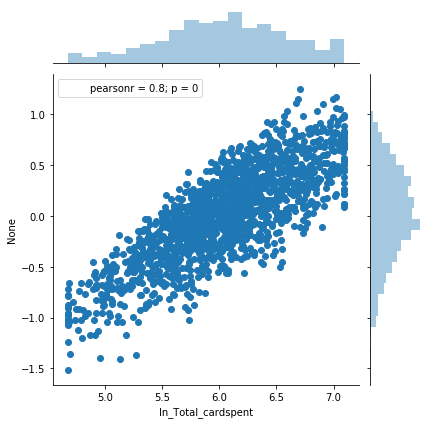

In [751]:
sns.jointplot(  test_y40, residuals40 )

C:\Users\DELL-IN\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


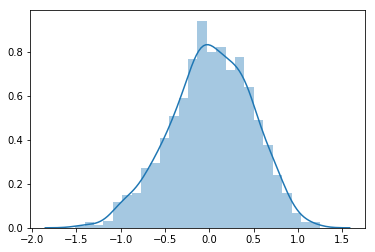

In [752]:
sns.distplot( residuals40 )

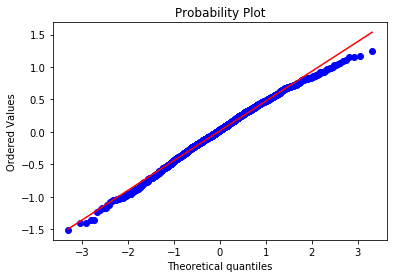

In [754]:
# To ensure residues are random i.e. normally distributed a Q-Q plot can be used
# Q-Q plot shows if the residuals are plotted along the line.
from scipy import stats
import pylab

stats.probplot( residuals40, dist="norm", plot=pylab )
pylab.show()